## Generate `IMG_DATA` for `arm_nnexamples_cifar10_inputs.h`
### [The CIFAR-10 dataset labels](https://www.cs.toronto.edu/~kriz/cifar.html)
```
0 - airplane
1 - automobile
2 - bird
3 - cat
4 - deer
5 - dog
6 - frog
7 - horse
8 - ship
9 - truck
```
The image should be Height-Width-Channel, i.e., RGB of the first pixel, followed by RGB of the second pixel, etc. The network is trained using the setup in Caffe where input data is raw RGB image minus data set mean image (i.e., mean.binaryproto).

In [1]:
import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image, ImageOps
import numpy as np
import os

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Loading CIFAR10 data by Keras is very convenient.
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
def showImage(a):
    '''
    Show a 32 x 32 color image in HWC form numpy array.
    a: Numpy array with shape (3072,)
    which contains a 32 x 32 RGB color 
    image stored in HWC format.
    '''
    a = a.reshape((32, 32, 3))
    img = image.array_to_img(a, scale=False)
    plt.figure()
    plt.imshow(img)
    plt.show()

def saveImg2File(a, headerfile, label=None):
    '''
    Save a image in HWC form to header file for 
    CMSIS-NN cifar10 demo.
    '''
    # saturate and make sure it is of type int8
    input_image = np.clip(a, 0, 255)
    input_image = input_image.astype(int)

    # generate header file
    out_f = open(headerfile, 'w')
    out_f.write("#define IMG_DATA {")
    input_image.tofile(out_f, sep=",", format="%d")
    out_f.write("}\n\n")
    if label:
        out_f.write("#define TEST_LABEL "+str(label)+"\n\n");
    out_f.close()
    print('IMG_DATA saved to', headerfile,".")

def resizeImage(srcfile, new_width=32, new_height=32):
    '''
    Resize and crop a image to desired resolution and return the 
    data as HWC format numpy array.
    srcfile: the source image file path.
    new_width: new desired width.
    new_height: new desired height.
    '''
    pil_image = Image.open(srcfile)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert('RGB')
    return np.asarray(pil_image_rgb).flatten()

def newImg2File(srcfile, headerfile=None, show=False):
    '''
    Generate a header file contains the definition of
          #define IMG_DATA {....} of a 32 x 32 RGB image.
    srcfile: the source image file path.
    headerfile: generated header file path.
    show: whether to show the 32 x 32 color image
    '''
    sample = resizeImage(srcfile)
    if not headerfile:
        headerfile = srcfile + '.h'
    if show is True:
        showImage(sample)
    saveImg2File(sample, headerfile)

## Show those 2 input images in CMSIS-NN demo
`arm_nnexamples_cifar10_inputs.h`

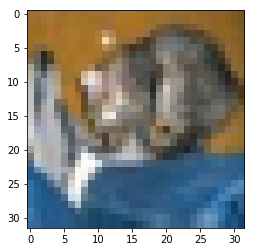

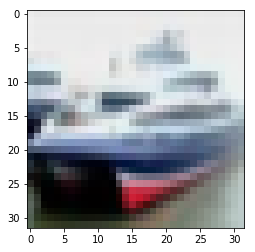

In [4]:

input_example1 = np.array([158,112,49,159,111,47,165,116,51,166,118,53,160,112,46,156,109,41,162,115,47,159,113,45,158,111,44,159,113,41,161,116,41,160,111,52,161,111,49,166,117,41,169,117,45,170,119,44,167,117,40,162,113,38,160,111,39,160,112,43,156,109,44,149,107,45,150,107,45,148,106,43,149,107,44,143,101,39,140,98,43,141,97,41,143,97,38,137,95,36,126,91,36,116,85,33,152,112,51,151,110,40,159,114,45,166,116,56,162,112,49,160,113,43,164,117,47,162,114,45,163,116,46,156,110,38,155,111,41,159,110,54,163,113,52,170,119,41,171,117,40,171,115,33,169,115,30,160,111,33,154,112,41,151,115,50,145,110,53,139,104,55,140,102,52,141,100,48,149,105,50,147,102,46,145,102,45,142,97,38,143,98,34,136,95,31,125,91,32,119,88,34,151,110,47,151,109,33,158,111,36,167,111,48,160,106,42,163,115,44,165,117,45,165,117,45,163,115,43,162,115,43,158,114,48,157,109,57,161,111,51,166,115,38,167,114,37,169,113,35,170,116,39,159,114,47,145,111,54,121,96,49,110,90,52,98,78,50,101,77,47,114,85,50,120,86,48,134,96,55,143,103,51,140,99,39,142,99,35,139,98,34,130,95,34,120,89,33,155,107,40,155,110,32,160,109,31,174,112,44,167,110,43,167,117,46,169,120,48,169,119,48,165,115,44,165,117,45,167,123,57,191,146,95,177,130,75,157,111,41,162,115,47,164,114,54,158,112,58,149,111,67,104,80,47,103,87,65,98,90,76,92,90,84,80,75,66,74,63,50,86,70,52,83,62,39,113,85,45,132,98,46,140,102,43,140,101,39,136,99,39,127,94,36,155,107,41,156,114,48,161,115,49,170,114,47,169,114,43,163,113,40,169,120,47,166,116,44,164,113,41,164,116,42,173,128,59,246,214,164,195,156,107,151,114,56,146,111,60,142,108,71,111,80,50,78,53,31,85,69,56,113,103,98,112,110,111,106,114,118,97,102,105,93,94,93,74,72,67,84,78,70,85,73,47,105,83,45,128,96,48,138,101,46,133,94,36,129,93,36,148,109,54,133,104,64,130,100,57,147,112,53,161,115,44,165,113,39,167,116,41,167,115,41,163,111,37,165,116,39,163,118,42,180,138,85,157,122,78,128,102,58,97,75,43,66,50,31,69,58,43,66,56,45,89,83,76,118,113,110,122,121,120,119,122,122,114,116,116,94,96,96,99,100,97,91,91,86,58,58,47,67,58,37,108,84,49,140,105,58,138,98,44,134,95,40,127,100,57,109,95,80,47,37,17,88,74,28,153,117,48,170,118,43,168,115,40,170,118,43,169,117,42,166,116,37,164,120,39,147,107,52,129,98,59,127,108,75,100,87,70,68,67,57,78,83,72,72,75,64,83,84,74,132,130,121,146,142,132,124,118,108,105,99,90,107,102,94,115,111,103,85,83,77,63,71,69,46,47,39,79,61,36,132,98,58,141,99,48,134,93,39,131,115,90,99,96,92,42,43,38,70,64,41,143,111,56,167,117,42,165,114,36,168,116,39,171,119,49,161,113,51,140,109,51,120,94,49,130,110,77,144,131,107,116,106,93,88,87,79,91,95,88,85,88,82,77,77,69,124,118,107,163,153,140,136,124,112,102,93,81,106,98,88,100,93,84,85,81,74,54,60,58,49,53,49,57,47,32,107,83,50,138,103,51,136,97,39,170,161,144,103,105,105,54,58,59,124,121,113,153,124,82,161,113,43,163,117,41,166,122,50,165,121,66,174,135,95,113,89,59,125,105,78,157,141,121,156,143,128,121,111,101,86,80,74,82,81,77,84,85,82,80,78,73,81,71,61,138,125,112,146,135,123,113,103,93,87,79,70,83,77,69,86,82,76,71,73,67,56,57,53,40,35,27,74,59,35,133,106,59,137,103,45,180,176,163,134,139,143,94,100,105,154,154,149,174,149,112,158,116,51,156,116,47,153,118,60,207,180,146,237,214,198,207,180,166,156,131,119,174,153,145,148,131,125,125,110,107,93,85,79,86,84,79,74,74,71,59,57,53,76,68,58,137,125,112,143,133,122,133,124,114,106,98,89,86,81,74,87,85,78,84,85,78,75,76,71,50,49,43,40,30,15,95,75,44,132,103,57,183,183,175,108,116,122,142,151,158,165,169,168,177,156,122,155,112,50,159,118,51,122,89,47,213,197,179,237,224,226,220,191,188,164,135,131,183,159,155,156,137,132,125,108,104,120,111,104,78,76,69,80,80,77,45,44,40,91,85,77,175,165,154,157,147,137,155,147,138,107,100,92,87,83,77,103,102,96,88,88,79,78,79,73,59,59,59,41,36,33,59,46,31,104,81,46,188,191,189,100,108,116,135,144,153,170,175,178,187,167,136,166,120,59,173,123,55,134,93,44,117,95,80,194,182,188,199,171,164,170,142,133,185,161,151,189,171,159,134,119,106,117,107,95,102,98,89,84,84,79,38,38,34,125,121,113,210,201,192,160,152,142,146,139,130,93,89,82,83,80,75,94,93,88,104,104,94,85,87,81,73,75,78,55,53,55,62,55,48,76,56,26,189,194,194,90,96,105,127,134,144,175,180,185,174,156,133,166,123,68,178,123,53,159,109,47,97,68,44,168,154,152,168,144,126,137,114,94,186,166,148,216,202,183,160,149,129,123,113,98,120,114,105,115,114,109,50,50,47,150,147,140,194,187,178,155,149,140,123,118,111,91,88,83,84,83,79,84,84,80,95,95,85,86,87,81,84,87,89,73,73,73,79,74,64,73,55,24,189,192,193,93,95,103,152,154,163,185,188,192,119,110,98,136,106,66,173,124,58,167,116,50,103,72,39,147,132,120,145,125,103,167,149,127,189,174,155,226,216,200,180,172,157,141,131,117,126,117,107,117,114,109,71,71,68,154,152,147,186,181,174,149,144,136,114,110,104,87,85,80,80,80,76,72,73,70,80,80,72,99,100,94,100,101,99,90,88,81,97,89,69,94,73,34,194,196,196,108,107,112,168,167,172,186,186,188,105,109,109,99,89,67,156,119,62,167,122,55,100,74,34,115,106,88,138,123,103,198,185,169,190,180,169,172,165,159,145,140,140,154,143,134,146,136,125,103,100,95,71,71,70,152,152,149,179,175,170,137,133,127,130,128,122,110,109,105,85,86,83,91,93,91,95,96,90,109,110,104,115,116,111,100,96,80,97,85,53,117,95,47,197,197,197,132,129,136,172,167,174,184,178,181,130,137,142,78,83,77,140,120,88,155,125,77,115,94,52,130,120,93,143,131,116,230,221,211,242,236,230,145,138,137,135,130,130,131,121,112,121,112,101,108,104,95,95,88,75,144,134,118,168,159,146,152,147,138,112,108,101,87,85,80,71,72,68,87,88,87,105,104,99,112,109,99,120,110,93,103,86,54,121,96,48,136,104,48,203,203,204,146,146,160,168,164,178,191,182,188,168,170,172,78,86,90,126,125,126,138,126,113,138,121,82,96,80,37,154,143,133,173,163,155,162,152,141,140,132,117,113,106,88,113,106,90,101,101,92,105,101,87,112,90,58,171,143,104,156,138,109,148,141,126,135,130,118,109,105,97,78,76,72,79,79,77,94,93,94,101,91,82,107,83,55,125,88,45,151,108,55,144,104,46,214,215,215,163,166,180,164,167,184,183,184,194,176,182,186,94,102,105,96,96,102,156,149,145,148,137,111,106,93,61,129,116,105,118,105,95,114,102,89,116,105,89,102,91,73,115,110,98,86,91,88,101,103,95,144,128,102,118,96,64,68,56,32,128,120,105,133,126,115,75,69,61,60,56,51,58,56,53,71,70,65,102,93,78,116,94,64,143,112,68,150,116,64,140,110,54,212,211,205,178,184,192,167,175,189,173,181,193,176,184,188,124,131,133,86,88,96,141,139,143,153,148,141,135,128,111,104,90,80,77,64,55,134,121,108,124,111,96,129,117,100,147,143,133,85,92,93,92,96,93,150,139,120,132,117,93,117,109,92,107,99,86,75,68,58,64,59,52,44,41,39,65,62,60,86,69,40,133,105,59,155,119,62,160,120,54,154,115,45,151,111,46,199,192,180,187,189,187,171,176,181,174,179,185,177,182,184,144,149,152,86,90,99,119,121,132,122,124,130,137,136,135,144,134,126,70,59,51,129,118,108,108,97,86,145,134,123,184,176,168,116,118,118,73,75,73,131,119,103,137,124,105,134,129,118,89,86,78,51,49,44,52,51,50,47,49,52,90,90,93,121,91,60,163,118,68,171,121,64,164,113,52,158,111,50,149,107,46,165,156,146,195,193,187,179,178,175,177,173,172,181,181,180,152,157,160,99,103,111,131,135,146,171,175,185,103,105,111,93,90,87,80,77,73,93,90,86,122,118,116,178,173,173,191,182,177,150,148,148,100,100,101,89,78,66,87,77,63,60,61,57,46,52,54,38,46,51,24,33,41,46,57,69,60,71,83,108,100,75,144,125,82,144,123,76,128,109,61,127,113,69,120,105,63,117,120,124,195,200,200,177,178,176,178,169,168,181,179,179,138,144,147,83,87,91,150,153,159,245,247,250,219,222,225,133,140,144,134,141,147,149,156,164,176,182,192,190,196,208,194,192,197,168,172,181,125,133,143,110,109,109,61,62,62,35,49,58,34,54,68,49,70,87,58,81,102,61,85,110,58,84,111,69,99,122,72,101,119,78,104,120,69,96,112,59,92,112,55,90,115,79,105,133,175,197,213,174,183,192,176,172,177,177,177,182,140,146,150,109,112,113,211,211,209,253,252,247,252,253,252,208,224,232,124,143,157,114,132,149,124,141,162,116,133,156,122,133,152,104,124,148,68,93,119,68,87,104,60,82,101,52,84,111,50,84,110,51,85,115,56,93,125,56,94,131,51,91,130,43,96,135,51,104,141,59,108,142,48,97,132,43,97,137,42,95,132,41,89,135,96,137,168,144,168,188,168,174,188,178,182,192,165,170,174,165,166,164,246,245,237,253,251,241,227,231,228,110,136,153,60,88,111,53,80,105,49,76,105,49,75,107,48,72,101,45,79,115,42,81,120,46,81,113,42,82,116,38,86,125,46,90,125,46,89,126,43,87,128,42,89,132,46,93,139,46,94,137,50,96,137,55,96,135,53,94,134,51,95,139,45,90,133,29,91,141,29,87,130,59,102,134,131,153,176,166,179,191,132,136,137,194,189,181,254,250,242,241,245,245,141,159,175,61,94,127,50,84,118,50,84,119,51,85,121,49,83,120,50,84,116,47,86,117,42,84,117,39,82,115,34,79,113,35,83,120,39,86,125,38,85,125,42,89,130,45,92,134,56,103,145,62,103,142,59,101,142,56,102,146,50,99,144,46,94,140,51,103,149,48,111,162,30,94,140,34,85,124,73,106,136,128,148,167,128,136,143,215,213,209,255,253,249,187,198,205,66,93,118,54,91,128,50,88,125,52,90,127,52,90,127,46,83,121,45,82,115,43,82,113,41,81,112,36,80,113,39,83,117,40,86,123,40,89,131,43,92,134,46,95,138,59,108,150,62,110,152,64,109,147,59,108,149,54,108,154,50,105,152,70,123,167,83,137,182,52,114,165,35,99,147,31,86,130,41,83,122,66,95,126,128,145,164,224,229,234,240,245,247,124,143,153,58,92,114,49,87,123,56,94,131,54,92,129,44,82,119,44,82,119,47,83,119,46,84,119,43,83,119,43,86,123,44,88,127,44,90,131,45,97,141,54,106,150,58,110,154,54,105,150,46,97,141,43,95,140,36,91,138,51,108,158,73,130,178,85,138,182,76,125,169,50,110,162,35,98,149,29,89,138,35,86,133,44,83,126,78,106,138,202,219,233,211,228,234,97,126,140,65,104,126,54,94,129,48,87,124,58,97,133,48,87,123,40,80,116,45,82,119,47,84,122,48,87,126,47,89,130,46,89,132,51,97,140,39,92,138,39,93,139,48,102,148,47,101,147,39,93,139,28,85,133,40,101,153,67,129,182,67,126,176,46,98,142,51,96,139,50,108,161,35,97,147,32,92,143,33,88,141,41,88,138,46,84,125,104,133,159,170,197,211,64,100,119,54,97,121,52,94,128,53,95,130,61,103,139,58,100,135,54,96,131,45,83,120,42,79,118,41,80,120,46,88,130,49,92,135,46,92,136,42,95,139,40,93,138,39,92,136,37,90,135,40,93,138,44,102,151,63,125,178,47,110,164,31,90,140,15,60,103,51,93,136,68,124,177,42,100,148,31,88,137,38,91,146,37,87,139,43,89,132,42,79,113,71,107,133,49,89,114,31,77,105,27,71,105,38,82,117,49,93,128,56,100,135,58,102,137,53,92,128,56,94,131,60,99,137,57,99,139,53,97,138,50,95,137,45,94,136,39,88,131,33,83,125,42,91,133,62,112,154,79,132,179,73,131,181,56,116,168,38,97,146,13,64,108,40,85,127,61,116,168,49,102,148,35,85,132,43,91,143,39,90,139,42,92,134,44,88,125,40,81,112,42,85,115,27,72,104,23,67,102,30,74,109,27,71,106,29,73,108,36,80,115,47,86,120,56,95,128,62,101,135,66,109,144,75,119,156,69,113,152,49,95,134,43,88,127,43,88,127,60,105,144,85,130,170,109,156,197,93,145,190,60,115,164,26,82,130,29,82,126,20,64,107,54,107,160,56,105,149,45,89,132,43,86,134,40,89,134,40,92,132,40,87,123,38,81,115,36,79,114,26,69,105,22,66,101,29,73,108,25,69,104,29,73,108,19,63,98,18,58,89,32,70,100,47,87,118,61,104,137,74,119,152,66,111,145,53,96,131,52,95,130,45,87,123,67,109,145,89,131,167,105,146,182,89,135,175,48,99,145,24,77,124,34,84,129,21,67,110])
input_example2 = np.array([235,235,235,231,231,231,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,232,233,233,231,233,232,231,233,231,233,233,230,233,232,232,232,234,232,231,234,232,232,232,233,233,230,232,233,231,233,233,233,232,232,232,232,232,232,232,232,232,233,233,233,233,233,233,232,232,232,238,238,238,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,237,234,233,236,234,233,236,236,234,234,236,234,234,235,237,234,234,238,235,236,237,236,236,235,236,236,234,236,236,236,235,235,235,235,235,235,235,235,235,236,236,236,236,236,236,235,235,235,237,237,237,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,235,235,235,235,234,234,236,233,231,236,234,231,235,235,234,234,235,236,227,230,233,231,235,238,231,233,235,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,235,235,235,235,235,235,234,234,234,238,238,238,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,235,235,235,235,235,234,233,233,230,232,232,231,228,230,232,223,226,231,186,192,197,209,216,219,207,210,213,228,228,230,236,235,235,234,234,234,234,234,234,234,234,234,234,234,234,235,235,235,235,235,235,235,235,235,237,237,237,234,234,234,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,234,234,234,234,234,234,235,235,235,235,235,235,234,234,234,234,234,234,235,235,235,235,235,235,236,238,236,233,237,237,219,225,230,203,210,219,163,172,179,195,205,208,214,218,221,230,229,232,237,235,237,235,235,235,235,235,235,235,235,235,235,236,236,236,236,236,236,236,236,236,236,236,239,239,238,236,235,235,236,235,235,236,235,235,236,235,235,236,235,235,235,236,235,235,235,235,234,234,234,235,235,235,237,236,236,237,236,236,234,235,236,232,233,234,235,237,237,229,231,232,208,216,218,194,205,210,185,198,207,174,188,200,165,179,189,184,196,202,207,215,220,226,228,232,236,235,237,236,236,235,236,236,235,236,236,235,236,236,236,237,237,237,237,237,237,237,237,237,228,229,229,228,227,228,232,230,231,231,228,230,234,232,233,237,236,236,237,237,235,236,237,235,237,235,236,237,235,236,239,236,237,239,237,238,225,229,230,224,228,229,233,237,238,221,226,228,183,197,204,161,180,190,159,180,191,154,176,190,144,163,177,143,159,171,156,169,177,198,206,211,233,238,239,236,237,234,235,236,233,235,235,235,235,236,236,236,238,237,237,237,237,239,237,238,212,220,222,224,230,233,230,234,238,227,232,234,229,234,234,234,237,236,237,238,235,238,237,236,239,237,238,239,237,238,239,236,237,240,238,239,201,204,203,219,222,221,233,236,235,214,218,218,193,204,210,185,201,210,184,201,211,173,191,203,165,182,196,159,174,187,162,176,185,186,199,204,229,239,240,234,239,238,233,238,237,233,238,238,234,239,238,236,239,238,237,239,238,238,238,238,216,234,241,221,236,243,225,238,246,225,239,243,227,240,240,231,238,237,236,237,235,238,236,235,238,236,237,238,236,237,237,237,237,239,239,239,197,198,196,220,221,218,233,234,231,230,231,229,209,213,217,209,216,222,219,228,235,208,218,227,209,221,234,210,224,235,217,233,240,218,235,241,225,240,243,228,238,240,228,239,240,230,240,240,230,240,239,235,240,239,237,240,239,238,238,238,118,140,149,119,138,148,124,142,153,136,155,161,172,188,191,225,234,233,235,236,233,237,234,232,236,233,234,235,235,235,235,237,236,233,237,235,214,216,214,226,228,226,232,234,232,236,237,236,228,230,232,227,230,235,231,236,241,225,232,239,225,237,247,217,233,243,201,219,226,185,204,211,172,189,195,167,179,186,167,180,185,186,199,201,223,235,235,235,241,239,236,240,239,238,240,239,109,130,141,103,121,133,108,125,137,111,127,137,146,159,165,222,229,231,227,228,225,229,226,224,236,232,233,234,234,234,231,236,234,230,237,235,229,234,235,231,235,236,232,237,238,230,235,236,231,236,238,231,237,240,229,237,241,223,232,238,191,206,213,164,184,191,146,165,172,137,156,163,134,149,159,128,140,153,121,133,143,149,162,166,216,228,229,234,241,239,235,240,238,237,240,239,195,212,224,188,202,215,199,211,224,200,211,223,209,217,227,223,227,231,213,213,211,211,209,206,216,213,214,220,222,222,219,226,225,210,221,219,209,219,223,211,221,225,216,225,230,220,229,233,225,234,237,226,236,239,225,237,241,218,231,237,183,204,208,175,198,203,181,200,207,178,194,202,186,197,211,170,178,196,142,151,164,185,195,202,219,230,233,231,240,238,234,241,239,236,240,239,193,207,222,191,202,217,202,211,224,214,217,234,223,225,241,214,219,227,203,208,208,171,174,174,177,180,183,207,213,214,174,184,188,98,112,121,93,114,126,101,121,132,111,129,139,122,138,147,137,152,161,153,167,174,202,216,220,223,236,237,218,232,235,220,233,238,223,234,240,217,226,233,221,228,237,212,219,229,196,203,212,222,230,237,219,227,234,221,230,233,232,239,242,235,241,242,113,130,152,111,125,147,113,125,141,125,131,151,138,145,165,170,182,193,191,201,205,190,199,204,208,219,226,216,230,234,158,172,183,54,71,92,45,70,91,49,73,91,53,73,90,66,84,98,102,114,129,159,168,179,221,227,233,234,239,241,233,237,241,227,231,237,223,228,233,207,211,217,202,208,212,211,218,220,212,219,223,199,206,214,179,186,196,188,197,205,211,221,227,221,231,234,61,81,108,69,86,114,63,79,100,68,85,102,123,141,155,139,155,164,151,157,164,195,200,207,214,228,234,206,223,228,163,180,190,103,121,138,95,112,131,101,117,135,138,151,168,181,192,207,207,212,223,221,222,232,219,219,227,205,203,212,183,186,195,158,166,174,147,154,163,131,138,147,125,133,140,130,139,144,136,146,152,133,142,151,128,137,147,138,153,160,182,197,203,197,212,216,40,53,77,58,70,94,85,98,116,127,144,153,132,151,156,96,107,110,119,115,118,163,158,161,173,180,182,184,194,197,182,194,198,181,193,200,183,194,202,198,209,217,218,228,236,200,210,217,174,181,186,159,165,172,145,150,159,132,136,149,116,125,138,98,111,123,94,106,118,99,111,123,105,118,128,107,121,130,122,135,145,138,151,161,150,164,174,157,174,184,188,206,213,185,203,208,13,15,35,26,29,47,134,140,151,206,216,220,138,150,150,118,123,123,141,133,134,172,162,162,181,181,180,207,209,211,220,224,225,228,234,233,224,234,232,230,241,240,226,238,238,176,189,190,144,159,163,138,154,162,142,158,170,145,163,177,154,171,187,149,165,182,149,165,182,154,171,187,157,174,189,160,177,191,173,190,204,187,204,217,190,207,218,178,196,208,165,183,193,157,175,183,5,5,24,58,62,79,200,207,217,225,232,239,197,205,212,199,207,211,212,212,218,226,224,229,229,230,237,233,236,246,232,238,245,230,238,239,209,221,220,223,238,239,221,238,241,210,228,234,198,217,228,180,200,214,193,216,230,188,213,229,189,212,231,194,214,234,192,212,232,184,204,224,172,193,212,171,191,209,161,181,197,144,165,179,136,156,169,131,146,161,128,143,158,138,154,165,39,45,71,145,155,179,190,204,222,186,196,216,184,197,217,192,211,229,194,211,230,194,208,227,194,206,227,191,203,228,192,207,228,190,207,221,177,193,207,180,198,215,154,176,193,147,169,188,145,161,184,156,171,195,146,163,186,113,133,156,114,137,161,132,157,180,126,150,173,111,135,158,92,115,138,91,112,135,93,114,133,94,116,131,105,125,140,121,133,151,129,141,158,129,142,156,122,135,161,162,179,207,143,160,194,137,154,189,131,152,187,128,152,190,127,150,192,130,150,193,131,150,192,128,147,190,127,147,189,129,149,189,129,149,188,124,145,186,104,126,163,100,122,154,102,120,154,118,134,170,112,128,163,94,109,145,94,112,148,94,117,153,87,112,144,83,103,136,80,97,130,83,103,134,93,111,139,101,117,141,108,121,144,115,125,146,121,133,148,130,144,156,73,87,109,76,90,113,77,90,122,80,93,127,84,98,134,87,102,142,87,102,147,90,105,150,94,111,152,102,119,160,107,124,165,113,131,172,115,137,181,118,136,186,118,132,180,120,133,175,115,136,172,110,133,168,106,127,163,100,119,155,95,109,148,85,101,139,79,97,132,80,92,127,80,94,129,77,100,133,80,100,129,82,98,122,92,104,126,113,119,138,125,135,146,136,149,156,13,25,41,3,11,25,9,16,35,18,26,48,18,26,52,21,25,56,20,25,58,22,30,61,26,36,62,34,43,70,42,51,77,48,59,87,52,69,106,60,75,121,66,77,126,70,79,126,71,87,127,72,88,126,67,81,120,60,72,112,55,67,106,53,68,104,53,69,103,57,69,102,57,71,105,57,78,110,72,89,115,87,100,119,104,113,128,120,124,136,130,136,141,137,146,149,36,46,55,11,16,20,8,13,19,32,44,53,36,45,58,22,25,41,8,11,30,3,8,24,1,4,17,0,2,15,0,2,15,0,4,20,6,13,42,5,18,56,1,19,60,3,23,62,13,29,71,24,38,81,21,33,77,21,31,76,21,38,78,22,44,79,30,50,83,39,58,90,57,70,101,85,90,118,113,115,138,123,123,138,116,115,125,122,123,128,134,139,137,153,160,158,35,41,45,26,27,26,13,19,18,27,41,41,71,81,84,70,70,76,49,50,57,27,31,37,15,15,21,5,5,11,2,2,7,0,0,7,17,17,35,57,64,91,31,50,78,10,36,62,4,30,60,4,30,62,7,30,63,14,35,69,25,43,74,41,55,83,62,71,99,86,97,123,122,124,146,144,131,149,132,120,135,114,105,114,117,111,116,132,134,133,146,152,146,172,179,175,16,15,17,13,10,9,4,10,8,3,12,11,45,44,46,65,52,57,54,43,47,36,33,35,18,18,20,4,4,7,2,2,4,0,1,3,7,8,15,118,117,134,161,158,179,131,128,148,112,112,131,105,105,125,105,103,124,109,105,127,118,107,126,138,115,133,154,126,144,151,126,141,127,106,116,105,86,91,106,94,97,120,116,116,129,130,129,142,147,144,164,172,165,184,194,190,40,40,35,12,10,7,0,3,3,0,4,4,12,6,7,30,12,17,32,12,17,21,10,12,7,6,7,2,1,3,2,1,2,3,2,3,0,0,2,68,58,64,182,128,146,205,130,148,196,127,144,194,123,141,195,119,137,187,113,129,172,110,122,150,96,106,123,75,83,103,66,69,95,71,70,104,93,88,122,118,113,129,132,126,132,141,135,152,162,158,171,182,176,185,197,194,69,77,64,26,29,21,1,1,1,1,1,2,4,1,0,12,2,5,18,3,9,12,2,5,4,1,2,2,0,0,2,0,0,4,0,1,1,1,1,32,12,11,153,45,59,203,47,68,195,46,67,191,48,69,179,50,67,155,49,59,119,42,49,91,38,42,81,48,46,94,77,71,117,110,102,125,126,116,125,128,120,129,135,128,144,153,147,162,176,171,173,187,183,184,198,196,83,94,82,47,52,43,1,1,1,2,1,2,2,0,0,5,1,2,7,1,5,4,0,2,1,0,0,1,0,0,1,0,0,3,0,0,1,2,0,27,3,2,142,25,38,205,32,54,198,25,46,169,25,43,121,25,36,85,29,34,74,41,39,85,66,56,102,92,82,121,113,105,128,124,115,122,126,115,121,127,118,132,139,131,147,157,150,165,179,174,176,191,187,186,201,199,92,102,93,54,60,50,6,7,3,3,2,1,2,2,0,1,3,1,1,3,3,1,2,2,1,1,1,1,0,0,1,0,0,1,1,1,0,3,2,15,1,0,102,19,28,157,31,47,117,17,23,74,13,12,56,27,22,74,58,55,99,90,81,115,115,99,122,126,111,124,124,112,123,123,113,125,130,119,128,135,126,136,145,137,148,159,151,162,176,171,177,192,188,188,202,201,87,99,89,43,51,37,19,23,11,11,12,4,8,10,2,5,11,4,2,10,4,2,7,2,3,4,1,3,4,1,3,4,1,2,3,2,0,6,6,4,5,2,42,13,13,71,21,24,53,27,25,57,50,41,80,77,62,113,98,82,132,113,101,134,126,113,123,126,112,116,125,111,120,128,115,131,138,126,139,148,137,143,154,145,156,168,161,169,184,179,182,197,193,188,202,201,82,96,82,46,57,36,36,44,22,31,35,17,27,30,15,22,28,15,17,26,13,16,23,12,18,21,12,19,21,13,20,22,14,19,23,15,19,27,20,23,31,21,37,40,27,64,55,45,87,70,67,104,88,81,116,102,85,128,112,88,139,121,105,131,122,110,117,122,107,115,127,112,123,133,119,131,139,127,139,149,138,148,160,151,159,172,164,174,189,183,185,200,196,187,202,200,85,101,83,62,75,48,58,67,38,55,61,37,51,56,35,47,53,33,46,53,34,48,55,38,49,55,40,51,56,41,53,58,44,55,62,46,59,67,45,68,71,48,81,84,59,104,96,74,116,103,83,127,109,92,133,116,97,127,121,97,127,127,107,118,124,106,114,125,108,122,131,117,129,136,123,136,145,133,141,152,141,149,162,153,158,171,163,168,183,178,180,195,191,186,200,199])
showImage(input_example1) # cat
showImage(input_example2) # ship

In [5]:
labels = {
    'airplane':0,
    'automobile':1,
    'bird':2,
    'cat':3,
    'deer':4,
    'dog':5,
    'frog':6,
    'horse':7,
    'ship':8,
    'truck':9
}

### Load images from cifar10 test set
Confirm the CMSIS-NN demo `IMG_DATA`s are the same from cifar10 test set.

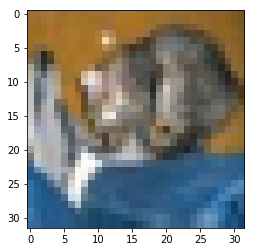

Same: True


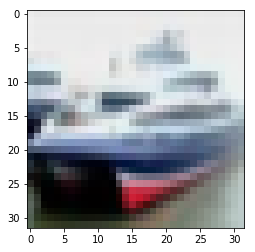

Same: True


In [6]:
# First cat in test set
x_test_labeled = x_test[y_test.flatten() == labels['cat']]
sample = x_test_labeled[0]
showImage(sample)
# Compare two arrays have the same shape and elements
print('Same:', np.array_equal(sample.flatten(), input_example1))

# First ship in test set

x_test_labeled = x_test[y_test.flatten() == labels['ship']]

sample = x_test_labeled[0]
showImage(sample)
# Compare two arrays have the same shape and elements
print('Same:', np.array_equal(sample.flatten(), input_example2))


### Create new `IMG_DATA`

This will create a `dog.h` file in current directory.
Just take `IMG_DATA` from this file and replace the one in `arm_nnexamples_cifar10_inputs.h`

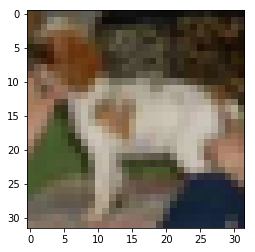

IMG_DATA saved to dog.h .


In [7]:
label = 'dog'
x_test_labeled = x_test[y_test.flatten() == labels[label]]

# Take the first image from the chooen label test set
sample = x_test_labeled[0]
showImage(sample)
saveImg2File(sample, label+'.h', labels[label])

## Generate `IMG_DATA` with new custom image

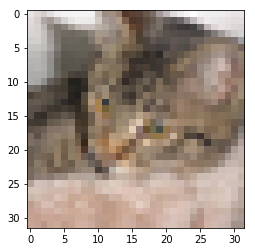

IMG_DATA saved to cat.jpg.h .


In [8]:
srcfile = 'cat.jpg'
newImg2File(srcfile, show=True)

## Keras model

Same [model](https://github.com/BVLC/caffe/blob/master/examples/cifar10/cifar10_quick.prototxt) in Caffe.

In [9]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=x_train.shape[1:], activation='relu'
                 , name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2), name='max_pooling1'))
# model.add(Dropout(0.25))

model.add(Conv2D(16, (5, 5), padding='same', activation='relu', name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='max_pooling2'))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (5, 5), padding='same', activation='relu', name='conv3'))
model.add(MaxPooling2D(pool_size=(2, 2), name='max_pooling3'))
# model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.5))
model.add(Dense(num_classes, name='fully_connected1', activation='softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

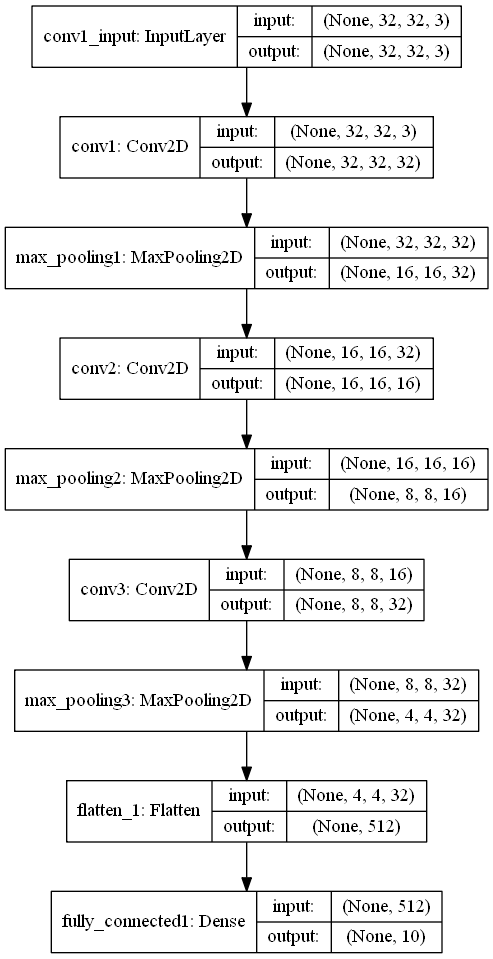

In [12]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png') 

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 16)        12816     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 8, 8, 16)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling3 (MaxPooling2D)  (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [14]:
conv1W=np.array([-9,-1,2,6,-4,6,4,-11,8,-9,-11,10,-12,5,15,11,-1,-1,33,-25,-18,47,-35,-23,25,-27,-5,0,-4,9,2,-5,0,34,-25,-21,55,-40,-33,34,-32,-16,5,-7,2,-21,16,14,-4,5,3,14,-10,-7,3,-10,-2,-8,5,8,-29,23,12,-25,15,8,-15,4,7,-16,5,8,-13,17,12,2,-4,-1,-1,-10,9,6,-4,21,11,0,12,-10,-9,-4,13,10,12,19,11,27,0,-5,11,-21,-26,-28,-7,3,-15,16,14,26,-22,-25,-8,-29,-24,-23,0,6,-13,13,25,0,-21,-18,-3,-21,-19,-13,11,14,4,13,18,-4,6,16,-1,-10,-14,-7,12,9,5,13,8,-4,9,10,-9,-4,7,-3,7,7,-12,7,3,0,-1,-7,2,-8,-5,9,-3,6,-4,7,-10,-25,7,-7,-7,10,2,14,-4,2,17,-9,5,-3,7,-10,-25,4,-10,-8,0,0,16,-7,11,25,-14,13,4,7,-12,-23,5,-16,-17,8,0,11,2,13,21,-11,9,-3,2,-9,-9,-3,-14,-11,1,-1,6,-6,6,14,-1,16,11,7,3,-14,21,6,-6,17,13,4,1,7,-3,-6,2,2,27,13,-5,18,0,-7,-6,-4,2,-24,-11,0,-18,-8,6,24,8,-14,11,-6,-8,-8,0,12,-22,-2,13,-15,-3,7,29,6,-16,10,-6,-4,-12,-7,11,-26,-14,3,-10,-8,0,16,5,-8,-5,-5,3,-15,-2,23,-17,-5,17,1,1,12,10,3,-5,-7,-18,-7,-3,-4,2,3,6,4,4,2,-7,17,20,12,-23,-27,-15,-3,3,6,5,15,6,-2,2,-5,22,22,11,-26,-30,-19,-6,-5,3,10,12,6,2,1,-3,20,14,4,-15,-26,-18,0,-9,1,14,8,6,1,-7,-9,8,11,6,-10,-13,-11,-4,-4,8,2,5,17,-9,0,11,-9,-11,21,6,13,39,-7,1,30,2,12,36,-11,-1,28,-2,-25,-6,6,-16,-6,-9,-34,-24,3,-17,-15,2,-20,-11,0,-13,-11,25,13,6,0,-15,-20,16,7,-11,7,-3,-10,-5,-2,-6,14,22,12,-16,-5,-12,7,23,7,-10,5,-2,-10,-1,-9,7,21,8,-19,-2,-13,2,21,3,-15,9,-2,-4,-2,-2,-12,2,13,-19,1,6,0,16,-1,5,8,-28,11,-2,-4,-10,-1,21,-30,-4,22,-8,14,9,11,14,-21,20,-9,-23,0,-4,19,-28,-9,31,-30,-1,12,3,14,-11,30,3,-24,3,-8,6,-22,-9,31,-29,2,26,-5,11,8,24,2,-36,24,3,-9,-6,-17,4,-8,-8,12,1,-1,5,3,-12,15,-6,-2,-1,0,15,-11,-18,6,-18,-10,6,3,6,-3,3,-12,13,-14,-1,43,-23,-3,52,-16,-11,28,-8,4,-6,5,-11,16,-6,-20,32,-28,-24,38,-31,-22,20,-16,5,-13,7,-2,5,3,-6,17,-10,-8,22,-13,-5,13,0,11,-16,14,-3,-14,6,3,-4,4,4,-2,2,-3,-9,5,2,1,-2,-10,-6,-3,-17,-2,1,-19,2,1,-14,8,11,14,3,7,1,-13,-13,2,-1,-3,-9,0,-5,-18,4,0,18,3,9,15,-10,-8,10,-12,-18,5,-3,-16,-10,0,-14,5,4,14,14,-1,10,16,-6,-2,14,-1,-12,8,2,-18,-13,-1,17,-2,2,24,-4,-3,17,8,-1,12,9,-6,-3,-2,-9,3,-2,-13,-1,-5,-17,-5,-7,-16,-7,-8,-14,-9,3,-9,-1,0,-13,-7,4,-9,-7,3,-6,-8,-2,-4,-7,5,-7,-4,1,-8,-11,10,6,-3,14,12,-1,6,10,-2,0,-12,-16,-3,-9,-19,0,1,-12,9,12,-2,1,10,-1,10,4,-8,6,3,-11,11,14,1,12,19,8,3,16,9,-7,-1,4,-11,-1,3,1,12,8,7,15,13,-5,-2,4,-7,-5,1,-8,-3,2,1,10,9,-1,8,9,-11,-9,-2,0,-1,6,-14,-13,-6,1,3,10,3,4,11,-1,-5,5,7,4,10,-14,-17,-10,-12,-13,-6,-11,-14,-6,1,-6,1,2,-1,1,-5,-7,-3,-2,-4,1,-11,-13,-9,-12,-16,-12,-2,-1,-2,-9,-5,-4,-7,-3,3,-1,-3,8,9,-2,1,8,11,13,5,14,17,1,10,17,-1,3,18,0,-6,0,-1,0,3,4,13,16,-1,8,14,-4,2,14,-16,-20,-14,-3,-3,0,13,21,25,5,11,14,-5,-2,9,1,-5,2,-6,-9,-14,-7,-4,-8,-10,-9,-13,-10,-12,-12,7,-1,-2,-5,2,-14,-5,3,-6,1,9,3,-8,3,-1,-9,2,0,-12,-4,-21,6,17,8,17,28,22,-5,6,2,-15,-8,-7,8,21,-3,2,20,-5,-1,16,-8,7,17,3,0,6,1,11,26,0,-22,-4,-33,-36,-16,-40,-2,14,1,2,10,5,1,17,-10,-16,3,-22,-22,-1,-14,-9,10,6,-7,7,7,10,-8,5,-3,-4,-1,-7,-7,-7,1,0,-2,-7,11,9,5,-2,2,12,14,16,12,7,2,0,-9,-23,-14,-8,-23,-1,-11,-14,-7,-9,-7,14,11,7,44,35,19,34,38,12,1,3,9,-6,-4,8,-32,-28,-19,-41,-45,-37,-14,-17,-17,-7,4,-3,-5,8,8,3,16,21,8,14,24,-3,-5,6,-11,-15,-18,-8,-12,-12,-6,-14,-8,9,-6,1,16,3,11,3,3,-8,-5,0,-6,-13,-13,-13,-6,-15,-15,6,-5,-4,9,16,5,1,14,5,-4,7,-1,-12,-11,-18,0,-6,-12,5,14,0,-1,13,2,2,18,6,-9,-4,-16,0,-3,-17,4,12,0,-1,13,2,0,16,6,-6,1,-9,-5,-8,-19,18,-1,-4,16,-2,-6,18,-1,-4,9,-4,1,-12,-13,-4,9,-3,-9,6,-4,-14,15,5,-2,-5,-5,-1,-20,-9,-3,16,2,-5,12,3,-7,15,7,1,-12,-7,-2,-15,-2,2,18,7,-1,10,2,-5,-1,-8,-8,-18,-15,-7,-2,7,9,-15,-15,-17,-7,-6,-7,-12,-12,-6,-17,-12,-6,9,14,12,13,7,6,3,-3,2,-6,-7,1,-7,-4,3,-11,-12,-6,12,11,6,-4,-3,-2,-15,-12,-4,-7,-4,3,-9,-9,-4,15,17,12,-3,1,2,-18,-13,-6,4,5,10,6,1,5,9,14,8,-6,1,3,-21,-15,-7,-2,-1,5,4,-1,2,4,17,14,-4,4,9,-24,-20,-11,-7,-7,3,-2,-6,1,5,9,-10,6,9,-12,12,11,-7,4,1,-15,11,9,-6,25,15,5,21,13,5,23,14,7,13,2,-3,17,10,6,-1,-10,-2,-20,-21,-14,-11,-11,-2,-11,-12,-3,-16,-15,-3,-4,-14,6,-16,-19,-1,-3,-2,13,-1,-3,12,-6,-10,8,0,-5,10,-11,-10,4,-4,-1,8,-11,-5,3,-6,-1,8,-8,-15,0,-3,0,9,4,11,14,-3,3,4,-15,-9,-6,-12,-14,-1,-18,-8,-1,-26,-12,-8,-28,-12,-9,-30,-13,-8,10,-1,-6,15,17,5,11,22,8,15,24,8,17,25,12,10,-5,-9,4,4,-5,1,10,1,2,4,-8,6,7,-7,5,-10,-6,-1,-5,-3,3,8,10,1,4,-2,-1,0,-8,2,-8,3,0,-6,9,1,-2,-8,6,1,-3,1,-10,6,5,-6,7,-8,-12,0,11,17,-4,-7,-1,-12,1,-2,9,11,2,17,-35,-32,-21,38,52,20,-27,-17,-30,4,2,17,18,10,19,-44,-34,-34,43,59,28,-25,-17,-31,6,0,16,10,4,18,-31,-27,-22,27,31,16,-10,-9,-16,3,-6,6,-2,-11,15,10,0,14,-2,-8,-8,0,-7,-7,13,0,11,2,-7,3,10,4,3,0,-2,-14,-1,-1,-16,-1,3,-6,8,-4,3,12,4,2,4,1,-17,7,10,-8,0,10,-2,-3,-15,0,10,4,8,-10,-13,-24,-7,-2,-16,0,8,-3,-6,-6,7,7,11,13,2,9,-6,-4,11,-15,2,22,0,2,-4,-2,-10,-12,-5,24,15,25,-1,-4,-2,-11,-1,-3,7,11,5,-16,-17,-23,-29,-35,-30,53,45,54,-11,-9,-12,-3,5,4,44,39,36,-45,-51,-51,-19,-28,-16,25,24,28,-15,0,-12,7,1,2,44,42,40,-36,-41,-41,5,0,3,-1,18,5,-17,-15,-15,7,8,14,11,3,4,1,-11,-8,10,-1,-2,-5,-10,-3,6,6,10,5,9,9,-6,3,0,-14,-21,-16,-40,-39,-26,0,4,16,15,20,24,-14,-7,-5,3,-5,1,-13,-12,0,-16,-11,6,4,7,20,-11,-9,-1,11,-4,7,14,7,22,-14,-14,5,-7,-6,12,-4,-9,4,18,-6,5,14,-4,12,-2,-11,6,3,-5,11,4,-10,1,2,-1,-14,4,-6,-23,26,11,-15,12,-7,-33,6,-10,-15,13,6,-20,14,0,-25,2,-14,-34,1,-4,-11,3,9,23,1,6,-5,-6,-2,-8,-7,6,17,-5,18,42,-19,10,42,-3,-1,-2,-2,1,8,4,11,29,-18,-12,7,-16,-7,2,1,-1,9,-9,-9,15,-7,-5,18,-1,-4,6,1,2,-6,-10,7,-2,1,4,-2,-2,-4,6,5,-7,4,3,-7,-2,-11,17,0,-15,-18,-24,40,25,30,-9,-20,-18,1,4,1,-32,-12,-22,54,43,41,0,-19,-9,-29,-29,-25,5,16,20,20,6,8,29,5,16,-60,-74,-65,37,39,43,-5,-2,-2,21,-7,9,-21,-38,-19,6,22,14,2,25,17,-22,4,-11,3,6,-15,-5,2,-13,-2,12,-8,0,13,5,-4,1,5,-8,19,4,-5,28,29,-18,18,19,-20,1,-2,-9,-2,-10,-30,1,8,-57,-26,-3,-47,-28,-10,4,1,3,15,4,-1,-4,-8,4,12,-3,10,48,16,25,38,1,-1,15,-7,-4,23,-2,2,31,-7,-15,23,-17,-19,6,-20,-21,-2,-1,4,4,-4,3,9,0,8,10,-6,-3,17,-2,-11,14,-2,-20,-12,-8,18,-15,-9,20,-4,-1,23,7,6,20,-2,-3,-5,-12,-3,26,-27,-15,17,-22,-10,19,-10,-3,16,-10,-3,0,-7,-1,19,-16,-6,16,-12,-5,16,-7,-5,6,-6,-4,-9,-5,-4,8,-6,-2,9,1,-1,4,7,0,-6,9,5,-13,12,6,4,8,15,10,-22,-12,-15,-34,-20,-19,-14,-2,-3,9,0,7,13,18,21,3,21,22,-31,-11,-6,-24,-5,0,8,-10,-1,-12,-20,-13,8,13,13,16,28,24,5,21,22,3,-11,-5,1,-15,-11,18,6,0,3,1,-8,-1,2,6,-1,-5,-8,8,-5,-8,22,7,-6,6,-4,-13,-4,-12,-6,-12,-9,-10,-9,-9,-11,-6,-6,-9,-6,-7,-10,-6,-9,-10,-11,-8,-8,-9,-7,-7,-5,-3,-4,-5,-4,-4,-6,-5,-3,1,4,4,-1,3,3,1,4,4,-2,1,2,-2,1,5,-3,3,6,-5,1,4,-5,1,3,-4,0,3,-3,2,6,-9,-2,2,-6,1,3,-5,1,1,-5,0,2,-5,1,4,0,-4,-1,20,6,2,20,-2,-17,7,-1,-15,-10,4,-3,-12,-1,16,-1,-4,6,23,1,-7,22,0,-13,10,2,-2,-32,-10,14,-25,-13,11,16,3,6,25,0,-13,19,-1,-10,-27,-2,11,-41,-18,8,-1,0,11,17,-3,-12,26,0,-13,-6,10,10,-22,-1,16,-16,0,17,-3,-3,7,3,-11,-8,-19,14,-3,-12,13,2,-5,1,9,4,-1,-4,10,0,2,-20,18,2,-15,11,14,0,-6,11,20,-11,-17,17,-12,-13,-27,23,10,-18,15,25,4,-14,5,30,-16,-29,26,-13,-21,-33,21,14,-20,13,32,4,-19,2,32,-19,-29,22,-11,-18,-24,19,8,-11,12,22,5,-16,-3,25,-11,-16,7,-7,-11,-6,-3,-14,8,11,2,4,5,-2,9,-1,-1,17,-4,2,-10,-1,-9,-9,3,-4,-26,-13,-19,11,11,14,16,4,12,-11,2,-1,-19,-1,-5,-32,-12,-17,19,23,23,8,0,4,-16,-4,-5,-17,1,-3,-13,4,0,17,19,15,1,-8,-7,-16,-5,-5,-2,14,11,-3,10,6,10,7,3,-2,-11,-13])
conv1B=np.array([-49,-18,-7,-20,-12,-15,7,2,-10,-84,-72,-65,-53,-6,-87,-63,-64,-28,-28,-4,-3,-10,-52,-15,-5,-7,-31,-44,-102,-19,-5,-65])

conv2W=np.array([-3,-9,-16,-14,8,-17,-10,-9,-20,37,-11,-5,-21,9,-22,-10,-11,18,4,12,8,22,11,6,-14,-6,14,15,8,-15,-6,-10,-23,-32,-11,-11,34,29,-5,-14,-13,14,-31,-17,-12,8,-19,-9,11,12,-8,31,35,24,-35,7,16,-16,-6,20,3,0,9,-28,-36,-21,-12,-35,-6,-2,-10,23,10,-2,8,7,-16,26,-13,-15,-11,17,-3,16,15,-2,-23,-9,-23,-13,6,-21,7,-4,-40,-38,-24,-20,-3,-47,19,26,-3,4,21,-4,-4,9,1,24,14,-17,-26,-1,-12,38,19,13,-7,-18,49,1,1,-11,8,-7,-26,-8,-30,14,-28,-49,11,-15,-16,-8,39,1,6,-16,-23,35,4,-8,-7,-15,-15,33,14,8,-9,-2,42,27,4,15,0,-25,-13,-22,14,-10,-44,-35,-10,3,-16,14,-10,15,8,14,6,26,0,10,19,23,15,5,-8,12,-23,7,-18,14,8,19,-4,-9,4,-5,18,-31,-44,-35,9,7,-23,7,13,0,-15,-17,-2,25,-6,13,9,24,-12,26,16,35,-34,-14,19,10,-8,8,-8,16,14,-17,5,-21,4,-17,-20,6,7,43,26,-4,-2,-10,-1,30,-17,-9,-16,6,9,24,15,-21,-41,16,-4,34,11,-8,-6,-4,-39,-19,-3,-39,-21,-9,-5,-1,8,27,10,-21,-7,-3,-5,-10,-11,-11,-36,5,-14,12,6,25,-21,0,2,43,12,-13,3,-14,-36,-11,-10,-35,-37,-49,-7,-13,4,24,22,-16,-4,-16,-17,-18,-8,-13,-22,7,-30,34,6,23,-15,-22,26,3,-7,-5,-3,-20,-8,-22,21,-44,-34,3,-18,11,-27,15,15,4,25,12,-5,33,-4,-3,-5,26,-4,-8,-17,-1,-43,7,-17,13,2,-23,-23,-13,-21,-9,26,-46,-47,-5,-5,8,-34,2,28,-4,33,-23,-24,41,-15,-9,-15,5,-12,-17,6,-21,-20,-22,-6,8,-8,-22,-26,8,-1,-17,25,-28,6,-6,-35,15,-21,48,30,-5,24,-12,-48,70,-13,-12,-1,11,13,3,17,-4,-25,-9,-33,1,13,-18,-16,-15,4,-24,37,-26,11,-39,-17,8,-4,22,23,-7,21,-1,-31,44,-7,2,-37,-5,13,-16,1,2,-37,-20,-3,3,5,-14,-5,-32,-26,-2,10,16,20,-51,-9,12,4,13,9,-24,-19,13,-15,50,9,6,-16,-27,19,23,14,35,-12,-30,39,-18,2,2,-10,8,-17,29,9,-15,-12,14,-19,23,-7,-28,8,6,3,-15,-12,-26,20,-3,13,35,23,-25,-59,-32,10,36,-40,12,8,-8,15,-22,-20,1,-2,-54,-32,-14,-16,10,-30,-54,-3,0,-2,-10,-22,-10,5,-15,-5,26,23,-40,-60,-6,-12,9,-28,-21,4,-29,11,4,-28,8,4,-26,-17,-25,-44,30,-4,-24,18,4,13,-5,-23,15,22,-7,3,33,48,-28,-22,-20,-22,-3,-58,-2,32,5,22,2,-10,-20,-5,-23,15,-36,-28,42,-1,-41,12,1,18,6,-35,-4,14,1,-27,44,35,-36,-21,3,-21,-11,-50,-7,14,7,21,34,-24,1,-2,-12,3,-27,-8,54,1,-10,16,-24,-13,-27,-35,-10,7,-12,-5,21,-19,6,12,4,9,-42,-6,-16,7,-20,4,35,-9,63,-7,7,35,16,-10,49,13,-26,55,-28,17,-35,16,-40,17,4,19,32,-2,-20,-51,-21,5,38,-8,26,-2,-17,25,-6,0,21,-11,-20,8,-1,0,27,8,-38,14,-28,11,-44,3,-32,-19,-8,-25,15,-9,-16,-47,1,7,-10,-8,7,-4,1,20,-9,-34,16,-9,-26,22,-3,-15,49,11,5,21,-27,28,-31,15,54,10,-16,-21,-1,8,-2,-10,19,3,-1,-24,4,15,10,24,17,7,-13,-25,-27,26,-12,-3,9,-2,-5,34,-12,15,-23,-16,26,-2,-10,-1,-11,6,23,-21,15,6,20,-19,17,-2,-20,11,34,-8,16,-19,-3,38,-2,9,28,-9,11,21,-8,-22,-48,-15,-15,-13,-7,24,-7,-3,35,-9,18,-8,13,-1,27,-21,6,-10,36,41,32,11,12,-3,22,-10,13,-2,-16,7,-16,25,31,14,-11,6,7,6,7,-5,35,-22,3,37,18,54,-9,2,-17,-5,-6,2,-7,-1,2,21,8,5,14,8,-48,-18,-3,-3,7,-17,-11,7,23,-6,-21,-25,22,-26,21,-19,13,77,7,-29,-2,-12,1,23,-18,-4,-18,34,-1,2,19,53,6,3,9,5,4,-7,36,5,-6,-11,-18,-5,49,-15,9,15,-5,17,2,-14,12,8,42,59,-40,39,-9,7,-13,-3,-22,47,-9,-7,8,32,2,-27,0,-33,14,-10,-27,0,39,-15,23,-3,0,10,22,-7,-23,5,17,1,17,26,26,37,15,3,18,21,-20,3,-4,23,29,-7,-21,-32,34,-6,-2,42,22,-7,34,11,2,30,34,-4,-14,-7,10,14,4,6,-9,-9,37,-39,0,2,-14,21,-45,-5,28,-2,-6,8,0,16,37,-8,3,-25,30,57,15,-16,-28,-8,-17,4,-2,-45,1,-8,10,-18,1,19,-17,-11,-39,3,-27,-6,14,-19,-14,12,16,-25,-24,-41,-26,-11,57,20,-12,16,-3,-17,-1,-9,-3,-1,-5,-38,43,4,16,1,-14,38,-3,17,-5,-2,16,-16,17,26,-2,4,-17,-16,0,-10,47,25,9,22,13,-15,-16,14,13,-1,-17,-5,32,-13,5,5,-33,4,-34,9,12,10,18,-1,-27,-21,-1,1,7,11,-21,-13,4,6,12,46,24,-25,-4,-1,9,-25,18,-1,43,12,17,-15,0,-11,-22,-2,-3,-4,17,-30,3,-22,7,-12,22,34,-48,-22,-8,2,2,-6,18,-14,15,-5,16,-2,1,14,-22,-14,4,-42,-19,-30,11,16,10,-28,10,22,-7,5,-30,-14,46,29,-53,1,-37,29,2,-74,12,13,20,0,21,-40,-2,20,-10,-60,-16,-38,-4,-24,-13,0,-6,-12,-14,-1,-16,5,-20,-42,4,30,-110,-3,-6,5,-6,-85,-1,6,8,-12,-2,-49,1,-14,24,-17,11,-50,21,18,25,38,-22,-3,-16,-1,-15,24,-19,3,-16,39,-52,3,-24,3,27,-64,37,18,26,8,-4,-43,2,2,-14,-70,-15,-58,-6,-23,2,2,-8,-2,-4,15,-18,3,-27,-20,-21,3,-115,3,-33,31,14,-50,28,-13,20,8,-55,-51,34,19,-16,-42,17,-62,-9,-24,11,5,5,22,1,12,34,16,-19,-19,23,18,-103,-13,-34,29,12,-57,-2,3,17,0,-17,-25,8,9,-22,-36,-20,-34,15,-9,12,32,31,-18,17,-3,-23,-8,-8,-1,31,15,-37,-3,-29,24,1,-34,24,28,-7,11,21,-18,-21,18,-54,-68,-35,-63,-1,-19,-1,-16,8,-19,0,-19,-18,-2,-17,-39,16,3,-68,-21,-75,-17,-3,-80,-12,24,-46,4,-7,-45,-6,5,-26,4,-1,-44,39,20,18,4,-8,-2,12,-5,-16,12,-5,-17,15,6,-17,1,-75,-25,3,-51,12,46,24,19,-3,-31,1,23,-11,-58,-23,-88,8,-5,-24,-6,18,8,7,1,-27,21,-2,-32,11,-18,-88,2,-74,-6,-15,-52,-7,24,6,11,-36,-48,19,19,41,-13,3,-67,6,20,-13,31,33,5,-7,-4,4,20,11,-2,23,17,-43,-6,-49,-12,-15,24,19,34,42,8,-9,-27,-5,20,39,12,-17,-18,20,6,3,31,-11,-5,-26,26,16,-7,-5,-2,23,29,47,11,28,13,8,35,21,-7,21,3,50,1,-23,2,3,-10,-8,-36,-9,-25,-4,28,-23,-25,-17,-11,-1,2,-11,-2,-7,32,-5,1,-16,4,8,-12,-12,-5,3,1,-4,-19,-6,-28,5,17,-1,-2,19,9,32,17,-17,-18,13,-17,10,8,-5,1,-23,8,27,34,-42,-25,-8,-4,16,10,18,23,9,29,-5,3,6,-46,-26,-50,-37,-13,6,-27,6,1,-8,15,0,-7,5,-10,-18,4,-9,28,-14,-30,6,36,19,1,6,15,-35,-17,10,26,21,-1,15,6,-25,39,4,4,10,22,-26,23,-1,-1,13,16,9,-9,-2,21,7,2,22,56,25,28,36,19,4,26,9,-7,3,15,-6,-21,5,-14,28,-4,-44,8,-16,16,8,14,-18,25,-21,-5,13,-12,5,-2,4,-5,-13,27,-11,13,-13,-10,11,4,20,50,-10,11,12,1,42,-7,-5,-12,14,4,-4,3,-28,24,-14,14,0,-14,9,-1,-22,2,13,15,-17,21,3,-16,9,31,43,-36,12,8,-4,15,40,-6,29,12,14,-4,-5,-2,-37,38,-14,-5,-1,-23,-5,12,-21,-8,35,15,-4,21,-13,20,22,12,-22,-26,-13,-7,7,-26,17,-26,-11,3,-15,8,17,0,-15,-5,-16,4,-31,-3,-68,0,-22,-38,16,-3,2,21,-26,-45,10,15,-3,-25,-25,30,20,-20,15,22,-13,-5,10,-6,20,4,5,1,-12,-13,-12,-4,-2,19,-37,-17,0,17,11,15,-3,3,29,-7,-22,19,9,-11,5,19,24,-17,-51,23,-31,-19,22,4,-17,14,-30,-22,-20,-15,14,22,-23,5,-17,25,11,11,-2,-17,-6,3,4,32,14,3,13,19,12,-33,0,31,-13,0,3,-20,-30,0,16,11,-19,-33,-18,6,8,25,-2,13,-1,5,-18,-18,10,27,44,-11,22,2,-22,26,11,4,38,22,-9,11,-7,-31,-16,14,46,-2,-38,-24,-19,-3,30,24,59,-15,-20,-2,-29,43,2,0,-31,-21,-50,-27,-21,2,16,-5,-4,25,-12,-5,-15,-10,-10,-14,6,13,-55,-18,13,17,8,-43,31,-28,0,0,5,-37,-8,25,-25,-22,-61,-10,-14,25,18,38,-17,9,12,9,24,-21,-15,0,1,4,-15,-9,-18,34,-21,-8,14,-15,16,-18,25,-1,15,-15,-16,-14,5,18,-37,24,23,-17,-20,9,-22,-15,33,2,13,18,-7,-32,-2,-15,-14,3,-26,-3,1,10,-8,-24,12,37,-28,-12,52,-19,11,-6,-2,18,2,-6,14,0,-11,-4,-27,-10,18,7,33,10,-13,3,-22,7,-13,35,32,-5,-29,-18,-18,54,-16,-13,66,11,26,-9,4,14,-40,1,36,-16,14,-20,-58,-20,9,-17,26,2,-25,-10,-16,-16,14,24,74,-26,-11,-9,-27,99,13,-24,-29,-1,2,-4,-18,8,-11,21,-2,-3,6,-13,-6,18,-13,-14,-1,25,-49,0,12,-10,1,0,23,-19,-5,-17,-7,20,-13,-10,1,43,-12,-5,0,36,9,44,24,-1,29,10,30,-6,-3,-12,33,9,-14,9,30,17,-38,-12,23,-29,22,-33,5,12,-1,-27,17,-9,-9,5,-5,2,12,-5,14,9,-32,10,33,15,36,-2,23,-5,-19,-8,-18,-3,24,-14,7,25,3,-15,33,27,6,-32,13,13,7,-14,-2,-25,-40,4,7,-5,-17,-11,-30,27,17,21,18,-18,-12,4,-20,-4,10,-40,0,0,-53,-10,26,58,-13,-42,5,34,23,20,-3,-58,-98,-17,25,-17,1,-30,-74,-5,19,4,-19,-48,12,15,-22,-17,1,23,-43,-13,-32,-7,10,74,-7,-53,15,22,12,10,8,-87,-83,-1,9,-23,2,-40,-21,5,-12,19,-31,-12,-7,24,-20,-42,-23,-13,-65,-21,2,-10,-22,1,-34,-24,9,34,-10,-9,24,-70,-60,25,14,-7,7,-21,14,0,12,-25,7,-16,1,25,20,4,-18,-24,-51,-30,2,-14,6,6,-12,5,15,-9,-12,-26,31,-2,2,-7,-23,14,-30,25,-10,16,56,-6,2,9,10,-5,24,7,-16,20,41,18,-5,-8,9,1,10,-15,7,0,13,-32,-8,-23,-37,-7,-19,-7,-9,-3,-30,4,32,14,-12,-17,10,-2,2,11,-35,-4,7,2,-37,-5,4,30,-14,-52,25,41,1,11,-41,-48,-70,6,1,-31,-24,-35,-22,-22,0,8,-20,-24,22,25,23,-6,-15,33,-45,-11,-17,-1,7,27,10,-60,26,25,0,27,-34,-63,-63,4,-10,-17,-34,-35,6,-5,-14,20,7,-20,6,37,9,-25,-16,28,-32,-28,-15,-5,3,4,-48,-30,12,8,3,8,-24,-58,-65,1,-4,-9,-36,-8,3,2,67,-35,32,-13,10,36,38,6,-28,50,-25,-44,-9,-12,0,-11,-35,28,18,-7,-13,7,28,18,-13,6,6,7,0,-26,7,59,18,-2,22,6,-2,-80,33,6,-11,4,-5,-9,33,-2,-16,-20,-19,16,12,1,-36,-6,22,45,-3,-28,32,17,-7,-55,6,1,-5,12,-11,-15,21,-37,23,-14,-5,-4,2,-8,8,4,36,37,-53,-16,3,1,-11,-1,48,13,25,-22,23,0,-23,-49,17,-22,16,4,-8,1,4,-14,-23,4,16,-26,18,-21,12,1,7,-6,24,-6,30,-44,-25,-50,-11,-35,22,-37,-21,-6,8,-8,16,14,13,-9,-9,23,-50,-20,-55,7,1,-50,16,19,12,3,-16,-36,5,18,-4,7,15,1,17,1,17,-33,-16,-11,16,1,-16,20,3,-12,-23,11,-2,-17,33,13,3,-15,18,15,48,-6,-12,-27,10,-35,33,6,-7,5,10,14,-26,3,-15,23,-10,-27,-2,22,20,20,6,21,46,-44,8,-10,-14,38,-26,-34,22,-35,-14,-6,-33,-18,19,35,-1,42,14,46,-19,-1,22,10,-25,-37,16,-21,-2,23,-18,33,39,-9,58,-29,23,61,50,-24,11,-25,14,30,-47,-37,-6,-3,-19,18,9,2,10,-5,-20,5,-20,-18,17,-15,3,-3,0,27,23,25,13,1,34,8,40,-19,-15,-11,26,-15,-24,-15,-6,-54,-33,-41,-3,-36,-2,-25,-30,0,-3,-7,-1,-16,5,-7,17,-3,-49,-5,-65,14,-8,-49,14,25,-14,-4,-2,-52,-2,-4,-37,-22,14,-6,11,-21,14,-8,-21,6,3,-25,-1,-12,26,-5,12,-22,-9,5,-45,5,-7,-46,19,26,14,-17,-9,-48,3,-51,33,25,-8,52,-32,21,2,5,0,5,-4,-8,-7,-17,-14,-13,-14,29,28,-25,39,8,-16,30,11,-11,-23,6,8,18,5,-17,22,25,3,47,18,30,18,-8,-12,-6,-28,1,8,-22,-7,-22,6,33,9,22,48,-17,30,74,9,-20,-38,5,3,46,-2,-14,-24,-25,-7,8,-2,-13,31,-22,-33,-3,-12,-3,-32,-10,9,-17,6,38,8,28,-7,26,8,-10,-9,-28,-43,21,28,-4,-22,18,-26,-58,-29,-35,-7,-36,-4,-21,-17,-12,-2,12,25,-10,-1,-8,11,19,-46,17,-60,10,-29,-67,-33,16,-20,19,-14,-56,-6,28,-43,-18,11,-19,7,-20,-3,-16,-33,0,-9,22,36,-4,25,-2,11,27,-24,27,-43,-14,-27,-31,-3,11,-8,8,-16,-47,-2,-26,-17,-4,-22,-9,-17,16,-3,2,5,-15,-19,3,-24,-34,-21,-30,-28,25,-17,-35,-14,2,11,-3,22,7,-8,15,-38,-22,14,-7,-12,-8,-12,6,15,38,14,26,-5,-16,-15,14,-2,-39,-12,-25,-10,13,-48,12,-17,-1,3,22,-18,5,5,12,-34,0,-2,0,-21,-33,15,-6,-29,-6,14,2,-7,-13,-6,0,5,-17,-6,4,1,11,-11,20,-28,25,7,-36,3,5,-4,14,2,-27,-9,35,-16,-52,-24,-25,-16,-42,-20,-5,6,-10,-14,15,-2,-12,-3,0,-7,7,-31,-3,-47,13,-18,-51,-3,31,-15,13,-13,-49,1,38,-20,-20,-22,-22,14,-36,-2,-5,-6,5,-40,25,16,-9,1,6,1,18,-33,22,-29,-8,-19,-38,6,18,-4,11,-9,-57,13,-5,10,26,10,-5,-48,-13,-11,26,23,-34,-16,7,-2,-28,-22,17,13,-16,36,-10,13,-2,-22,48,29,10,-24,-25,-31,-26,-7,-11,6,11,35,28,-15,-1,19,48,17,-9,-21,31,3,-40,-19,11,11,-4,9,20,-21,-8,-5,23,16,6,4,-16,-22,-4,-2,-14,-30,-46,24,11,-23,-29,11,36,7,4,-9,-4,13,-29,-14,6,8,24,27,1,-9,17,10,-12,25,9,-3,-4,6,-26,16,15,-3,-41,-15,-11,-21,-32,-5,-2,19,1,-6,3,16,-16,-13,-4,9,6,-17,-3,-40,-4,10,-25,-27,37,-9,8,13,-53,3,18,-22,-9,-42,-26,-11,-28,21,-16,6,2,-26,14,5,-14,-18,-8,-6,7,-35,18,-21,-15,13,-30,-3,23,2,4,-3,-56,26,-29,-17,-2,13,10,-55,-25,-44,-63,21,9,5,24,-32,-46,-23,-24,-24,-7,-41,2,-26,8,-23,6,17,-8,17,7,15,14,30,-9,-27,-15,43,31,7,-7,-30,-1,3,1,-14,-6,-12,-28,-26,5,4,1,20,25,-41,5,-5,-21,2,-12,8,7,-21,38,10,-1,-17,-6,47,22,-2,16,-27,14,-36,10,-13,-6,10,-2,-27,24,42,-9,20,2,-23,14,7,-16,31,-11,0,15,4,46,26,19,-10,-15,21,-21,-7,17,-32,1,8,-1,-29,2,-14,-30,-10,28,25,-10,8,-24,-34,5,3,-15,11,-25,11,10,9,-13,-1,1,-9,5,10,13,26,58,-14,23,-13,-13,-13,-26,-26,-6,-30,24,-12,-1,23,-29,4,7,-12,23,14,-20,41,5,27,-12,15,-10,6,0,-2,16,-24,-21,3,-21,9,-14,-38,9,-11,-3,-3,-12,0,23,0,-4,4,20,15,18,15,-26,21,3,-10,-8,40,19,-23,-1,10,21,7,4,-18,6,-2,-27,-32,-19,-9,-16,8,2,-32,16,34,20,5,17,10,14,-18,-40,15,-5,-15,45,-11,25,3,26,27,41,21,6,-22,23,-32,0,31,-22,2,15,-16,1,-30,-6,23,13,-2,28,18,17,19,-15,8,4,-9,64,48,64,-10,-16,13,-5,-7,-12,-10,-6,5,-9,20,-32,-32,15,-25,26,-15,-18,14,-13,-26,24,-5,25,4,-14,18,3,9,26,17,38,19,-25,38,-17,-23,-2,0,-15,-18,-2,-20,-14,-6,-11,-27,20,-11,-6,11,-41,-21,-4,-8,25,-2,-17,-42,-13,-1,-15,7,5,19,8,13,39,40,-10,17,-33,2,-10,-10,0,1,22,-16,31,52,1,-7,-9,41,2,19,5,-23,-8,-19,17,5,15,36,55,9,2,-4,12,25,14,-3,-14,14,-16,-8,1,48,4,7,7,18,12,4,19,23,-51,17,18,15,-25,30,9,-10,44,-14,60,-2,5,3,22,43,16,9,-13,15,32,20,-24,11,3,-2,-27,8,6,-18,20,-4,-23,-1,27,47,3,20,6,-15,53,50,75,-9,15,-14,0,31,2,10,-13,23,15,18,-22,-19,4,9,8,18,-14,9,-1,-28,-3,-19,-13,20,23,32,2,-7,-12,20,10,32,-10,48,-8,-6,6,18,-34,17,22,16,23,-17,-20,12,7,18,-12,9,-45,-11,-30,2,13,2,22,10,0,-29,-31,28,-7,-13,-25,9,9,53,13,17,-38,17,-26,-17,-26,23,27,-9,14,12,-23,-28,-3,24,-9,-20,-11,0,2,17,-2,-13,7,31,25,-9,-42,-37,-27,7,14,17,-27,28,-27,-13,-2,7,-2,-20,3,-19,-3,-17,6,-62,-44,-8,-40,14,-12,-3,-9,-20,-1,-36,58,-3,-29,-17,-33,4,-25,23,-36,37,-1,18,10,18,-3,-7,-22,-11,-27,-50,15,-60,-10,25,-37,17,8,4,2,-29,-9,-10,57,13,-21,-12,-40,17,-13,11,-49,2,-9,-1,6,-6,-6,8,6,14,-33,-28,-14,-61,9,11,-18,18,36,-25,-1,-28,-32,-28,-10,42,-13,36,-8,26,-14,33,-62,-24,-12,-22,8,3,-22,13,11,19,-55,15,-30,-75,-11,7,43,-17,34,16,-10,-21,14,8,-8,10,-14,-12,-24,60,-1,5,11,-7,-4,17,16,46,30,0,-15,49,32,-9,-27,5,-21,17,-9,19,-23,28,-5,35,-5,-1,24,-27,-53,10,-21,41,13,8,-16,-3,-22,31,9,25,34,-10,-8,36,15,12,-9,-29,-20,9,-33,14,-31,-9,0,-19,-8,-9,30,15,-16,-10,-34,21,-51,19,-48,22,-1,23,20,5,24,-6,12,29,2,-24,4,-50,-26,0,-9,34,-15,1,-2,-12,-45,-15,26,20,24,-6,-44,34,-4,14,-71,28,17,10,17,6,2,6,24,12,5,-12,-25,-39,-4,21,-1,10,19,-11,-4,-7,-21,-6,-15,25,26,34,32,57,3,17,-54,6,11,13,4,-10,-12,24,19,-5,-5,39,-37,-59,4,35,-10,-21,34,-11,-7,-48,45,17,-17,27,10,-19,-17,-10,-19,-11,-1,-37,21,-24,-15,6,4,32,-14,-6,-14,4,-18,10,27,5,-18,14,22,6,-13,-12,-41,-1,-27,18,33,-25,10,10,-1,3,-16,-24,12,-3,-7,-7,-6,11,-27,-22,-8,-4,-3,-8,-5,13,-10,18,-9,-2,-20,11,-11,19,-6,20,54,-10,13,32,1,-21,-10,-8,17,-26,-4,-12,35,7,-14,-23,-10,11,-13,1,-8,-15,12,-3,-7,-3,-3,24,21,14,9,-21,12,2,37,-31,-3,3,4,2,-7,-20,23,-16,49,2,-9,-8,-16,3,-26,14,-14,-21,-18,-17,-17,26,8,14,0,-4,30,-8,22,13,-2,-24,-16,-6,3,10,-9,-23,-3,-23,27,3,-19,-6,-41,-9,-4,-13,-17,-25,-40,-45,-16,-1,17,6,-22,15,-25,37,12,-3,-5,25,-11,-1,23,0,42,-8,0,4,-1,43,-6,46,16,-21,-1,-7,17,8,21,39,-5,0,0,20,-42,10,-26,13,20,-19,-13,22,9,20,6,3,13,-1,-14,-20,-7,10,-13,19,9,-18,2,-5,-27,-3,-15,14,1,10,-20,37,-31,18,-3,6,58,7,-12,19,6,-2,-26,27,18,1,-7,-21,6,32,-5,-13,-8,4,-15,-1,-32,8,27,-41,11,-9,-18,32,-11,-37,6,-8,9,36,11,-30,4,-1,-4,-3,-21,-13,-6,-7,-20,-17,3,-13,2,-11,-18,-16,2,32,-4,-38,-2,-11,-1,-5,-8,-24,14,0,-9,21,-9,-13,-8,8,5,11,-50,-21,-19,-19,-25,-36,-11,-16,-1,-19,5,-40,-8,3,-9,-51,-8,-24,8,-26,-13,3,-13,36,-14,18,-5,36,-52,1,45,15,0,-30,32,-21,24,13,-2,10,12,-52,19,-40,6,-51,-46,44,-47,-19,33,23,-37,7,-11,34,30,11,-17,19,-35,11,6,31,-14,-23,17,-21,10,16,12,-16,-28,-24,17,-32,-11,-30,-12,22,-28,-16,17,28,-17,7,3,-11,108,32,1,18,3,-6,-43,30,-1,7,0,-10,-22,33,6,2,-24,-7,-10,-44,-18,37,21,-26,4,12,7,7,-31,-17,-3,17,34,27,-17,-21,3,-2,-35,1,4,13,11,7,-49,-11,5,13,12,-17,-30,-34,8,22,19,-31,6,12,-10,-29,14,3,-6,15,22,33,-15,-14,0,14,-15,-6,-12,15,-39,36,-52,-35,0,-13,47,-38,3,-26,-29,47,28,4,0,8,-24,-17,9,9,-3,17,-28,10,-29,-11,-49,13,24,22,-16,-10,33,-11,0,-8,-28,-17,16,-51,18,-45,-18,-7,-34,16,-30,-25,47,-26,-27,-2,-10,24,18,41,-12,-38,-27,10,-20,33,-1,-23,29,-22,-6,-1,5,-9,-24,-25,0,-44,-20,29,42,1,-18,-29,28,-12,-9,-11,-6,-17,49,45,2,-23,25,-18,-41,-2,14,0,0,-12,-31,21,11,-11,-42,-26,-36,-36,-3,46,15,-8,-8,-24,18,-26,-5,-20,-5,-27,23,27,-17,-21,16,-20,-25,-26,28,-3,13,-9,-37,-10,8,6,-11,-10,-41,5,15,36,38,-21,18,-3,-21,-22,19,48,4,0,-4,7,-9,17,25,4,-27,-18,28,12,-22,49,-30,-19,15,6,7,-25,13,0,0,1,18,6,35,-10,-40,8,26,42,-21,-8,-18,50,-23,1,-37,35,14,6,-29,13,22,-30,8,-13,-5,-8,2,-9,-9,-14,-23,36,-4,25,-36,-15,21,-34,-30,-11,-28,7,9,78,-15,-22,-7,3,-9,-1,-6,-8,16,-15,3,-7,51,4,0,-13,-34,-35,5,32,24,-7,-21,-16,6,-9,-5,-22,-4,4,6,42,-9,-30,29,-39,-9,-7,14,-23,-42,-6,-20,-15,25,-5,-19,-19,-33,-21,-32,8,0,8,-13,-10,5,-25,26,-51,19,8,-5,-12,-14,-25,26,-33,-12,-33,24,-35,-29,8,-22,-34,-9,0,-16,-22,-25,1,33,0,34,16,4,-10,-2,1,32,33,23,-16,14,32,0,25,42,18,0,-14,32,4,-10,33,-14,-15,12,-14,25,10,30,-6,35,11,36,27,17,4,-8,3,40,44,14,-3,-8,36,-16,-3,-2,-11,11,36,-5,2,7,-39,-27,-28,8,-26,-14,4,-8,-22,-26,-6,-21,15,-2,0,-5,49,-2,31,10,-50,-4,-2,24,9,2,6,-11,12,-12,-16,22,-35,-16,-26,22,-20,-20,25,13,-5,25,-20,-45,-25,13,17,-15,33,-11,20,7,-59,5,-17,17,6,-11,1,-8,2,-25,-10,26,-27,-7,-14,-5,-10,-15,-11,-2,-41,8,-13,-55,-38,28,44,-23,12,-28,-8,13,-14,-27,6,-19,3,-14,-9,-18,28,-26,-16,23,-24,-31,-9,-10,-6,-16,-26,4,-45,10,-12,-38,-31,19,4,-26,-1,-9,5,-8,16,-4,37,20,21,10,-7,-14,27,-27,-32,37,-30,0,23,-24,-16,2,15,9,16,1,-17,-16,-4,4,26,-29,13,23,32,16,-5,-10,27,-5,-17,-12,-2,22,16,-3,21,30,1,0,-18,4,-5,-23,-13,8,-22,-15,-35,8,-25,5,8,7,27,-28,9,22,-16,-34,25,3,11,7,0,30,25,7,1,27,2,-17,6,1,10,-12,-20,18,-40,12,-21,-37,-20,12,8,1,21,-20,-12,-1,-47,-59,-23,-6,32,-2,-11,15,4,-15,0,-16,-11,4,6,-9,11,-7,-5,4,-95,10,4,-77,-6,4,16,-8,-15,-50,-28,1,-6,-61,-17,-40,8,-13,-14,-18,12,-2,-4,-28,-13,-16,-6,-12,-6,4,-28,0,-91,4,18,-65,-13,6,-8,-5,-2,-43,-10,0,-2,-20,28,6,11,-11,3,-13,-10,-8,1,-5,-2,11,69,-13,-1,10,6,9,-23,10,8,-23,13,4,-1,-1,17,9,29,8,38,5,-20,2,-18,-32,-12,6,-7,6,3,-31,-27,1,-14,10,-46,3,-6,-6,34,6,-2,2,3,-16,6,7,13,11,30,-1,-5,7,2,32,20,-10,-15,14,-11,28,-30,0,23,-9,-2,11,1,11,-1,16,24,0,-22,14,-7,-18,-8,13,4,47,8,1,-11,-14,-29,-21,34,2,-28,7,-37,40,2,6,58,-9,8,-31,11,26,-37,-2,-24,-7,7,-31,31,-13,-10,7,-21,-19,-17,-14,2,-24,-44,-28,0,-17,-32,0,11,33,-2,-32,24,-13,-2,-16,9,5,-8,-7,-55,-12,18,-10,33,-13,-24,13,0,-21,-11,21,39,10,16,10,1,28,-11,-6,0,0,2,-16,-26,20,60,-18,13,23,8,-11,3,-2,-4,48,29,-9,-12,14,6,36,-17,-11,2,-3,-1,-11,-26,-7,18,-23,-7,9,-21,11,-28,36,16,-3,7,-13,-1,-19,-20,-9,36,34,-18,-21,-7,-5,-4,28,14,-17,24,-9,21,13,-6,19,34,23,19,8,-44,9,23,8,-4,6,33,9,52,8,13,14,35,26,-31,-25,0,19,-8,33,-19,-13,-7,-9,13,23,50,26,42,11,14,46,8,18,37,0,-6,9,65,42,10,31,-24,-10,49,-7,25,1,46,10,1,-11,-9,-7,13,-35,-30,2,39,9,27,25,18,21,5,-18,-10,35,-27,-15,60,39,17,6,11,-36,34,-43,24,4,1,18,2,-16,15,33,15,40,16,33,23,37,18,28,7,7,5,8,-21,37,20,2,22,19,62,0,40,-22,1,15,-3,-14,-14,11,3,36,-18,-8,7,-57,9,36,-11,-22,-17,-16,38,-19,-10,5,-32,16,-1,3,-13,-53,36,-19,-5,0,8,54,-13,-34,-38,8,-34,-7,40,-30,-36,-19,-23,7,13,10,-2,-27,25,4,5,-34,17,-4,-14,5,-13,-4,44,-9,-22,4,26,15,-20,-23,-30,10,-22,11,-11,-23,-10,-13,3,50,41,-1,8,-1,-4,28,19,0,21,-14,10,44,-6,12,33,26,-34,-13,36,36,9,-2,-3,-4,3,-27,-27,-19,9,-30,-41,-9,29,-5,-7,10,-5,6,15,-32,18,-14,-2,-3,16,-13,1,5,-29,9,28,-24,2,14,-26,1,16,-62,6,-15,-5,7,-56,24,40,25,16,2,-20,-25,4,-7,1,-8,4,-16,17,-20,44,1,64,-35,2,-3,5,0,-26,-9,-12,1,-2,18,-15,8,9,-24,15,11,10,-27,3,14,-9,8,-25,-16,4,6,-4,23,-19,-11,-6,11,-18,-6,16,36,-15,-10,-3,11,-3,5,1,-2,3,-9,32,18,21,-6,11,-6,0,17,-27,30,-21,5,-11,-7,2,-3,11,-22,-2,27,-13,28,37,-17,-20,-10,2,9,0,-17,17,-4,3,-25,1,-13,3,-8,4,20,-53,16,17,-7,1,-9,17,-33,7,23,-9,10,-18,11,5,-10,-2,2,0,15,13,11,5,0,-22,-23,-17,-9,-8,-1,-10,-11,-32,-8,25,-4,10,-23,-5,-9,-5,27,-6,28,7,-2,-40,-8,-10,9,-1,-4,6,44,20,-10,-20,-4,7,9,39,30,-17,-16,-15,-11,27,-17,0,27,-17,-11,-22,7,10,21,14,-1,10,10,7,34,-15,-11,-5,0,-10,2,-26,8,14,-16,3,1,25,11,-25,-9,16,5,-20,31,16,9,29,1,14,-5,-46,25,-33,-2,-18,-1,-6,1,-18,-13,32,3,-9,3,51,-18,4,-8,1,-5,-46,-13,-8,21,-9,-2,30,-1,-44,-22,-5,-40,-19,8,-16,-3,6,-10,29,-1,2,-31,15,-2,-25,-26,6,-31,-11,6,-14,-1,-37,-4,25,-10,-9,-27,11,-18,-21,15,6,45,4,-6,-38,-12,-16,7,-19,-15,31,-22,-12,13,-30,-10,-28,-6,-12,5,-36,-45,-12,6,28,-42,-8,-11,11,3,-24,5,19,99,29,-22,-13,-8,2,-6,-24,-3,15,17,-9,-2,-2,-12,15,16,19,-7,-15,-14,-18,11,21,-31,-10,12,-6,17,28,4,-14,34,4,-8,5,-3,-5,-12,-11,-13,-25,5,-9,16,-7,-2,17,2,21,14,27,-12,38,-40,17,-16,-1,12,9,-4,57,21,-6,-30,-5,27,-6,1,3,11,-24,-33,22,-33,-2,20,-10,-2,46,5,2,33,22,-1,-43,-21,-20,-11,7,-12,9,-1,-19,45,26,-1,5,11,-15,-6,-9,22,-10,-15,52,34,12,16,-7,-47,-34,-6,-10,4,-4,-22,-60,14,-5,-27,10,-31,6,-7,-28,32,26,127,55,-12,-9,-17,-13,30,-35,-13,70,47,9,-1,0,-22,-48,-9,18,-11,-14,-51,-14,19,9,-36,2,-2,8,6,-55,-1,-2,110,17,-28,-30,-14,-6,-8,-13,-1,16,11,25,23,9,-15,4,4,24,2,22,-22,5,10,29,-1,-7,-8,17,14,-16,2,-4,20,-7,9,-9,5,-5,-13,-11,-22,-11,-20,-6,6,-19,-19,-48,10,34,4,11,13,35,-34,16,4,-15,22,-23,-26,65,5,-6,24,-19,7,-26,17,-18,33,-8,-26,18,13,-16,-6,1,-29,-49,0,12,8,-22,-26,-5,2,-8,-28,4,-2,-2,-19,1,6,0,25,25,-8,-33,-3,-18,-2,-29,-35,72,53,47,-17,-8,-35,-68,-8,-15,-31,-21,-32,-38,3,-14,-12,4,-29,-28,4,-56,24,7,95,19,-36,-57,3,-27,8,-8,-20,68,-4,59,-25,-19,-22,-16,-26,-24,-20,13,-13,-14,1,-4,9,-33,-27,-26,8,-94,-29,-30,23,11,-7,-45,5,-27,-2,-13,6,26,-16,12,-9,-20,-6,37,-60,20,6,7,9,-39,-16,-4,2,9,-21,-5,-12,-52,-31,-37,-18,2,20,-31,0,-22,-15,-23,-50,33,25,41,0,-32,-33,-93,-11,1,-33,0,-34,-12,3,6,2,14,-21,-42,-41,9,-1,33,21,19,22,-24,11,-8,3,10,-33,-7,34,35,4,17,-13,-58,-16,-23,9,0,-30,4,17,15,5,-27,-20,-4,0,-7,-24,37,18,-12,7,-63,9,6,-1,-46,-41,-5,35,-3,14,2,-5,14,-11,-4,21,28,26,12,-2,4,17,-38,-23,-12,-11,19,-18,-1,-9,-11,-23,2,0,3,-35,1,-33,-2,-9,15,-46,15,2,48,12,6,5,19,32,19,-11,-19,25,4,-21,-14,9,17,-27,-5,-11,24,-4,4,-16,11,2,24,-4,24,-3,3,-9,3,25,61,12,33,42,-13,8,-14,-6,-7,10,11,9,-20,-9,-18,-4,-8,-8,54,23,12,-8,-16,-23,-6,-32,31,4,-30,-38,-11,-38,3,-21,-16,6,24,0,0,20,2,-17,-13,-52,0,2,2,-14,-19,-6,-29,0,-13,-5,-16,29,16,-11,-10,-9,-16,-40,-11,-16,17,0,-7,19,-15,1,17,14,-23,-35,-4,-56,-6,9,60,-18,-26,-32,-27,-14,10,-4,-6,2,1,-4,-31,19,-7,-2,-6,7,28,57,19,16,-7,22,31,11,-15,21,-21,3,9,28,76,-40,8,-44,-22,-37,21,0,26,-20,-22,1,-17,53,-15,6,-19,29,21,31,15,2,6,4,-21,8,-7,-25,-19,6,-3,21,16,-18,3,-13,-21,-27,-24,19,43,4,-13,3,-20,23,-5,21,-14,8,-2,16,-12,-19,-11,0,-24,18,-18,-23,-7,-5,-14,20,25,-20,1,21,1,1,-15,7,2,20,-15,-36,31,-13,-29,-14,21,-40,-10,-34,12,-16,-23,7,-26,7,-1,-24,0,-43,2,17,33,-7,-10,11,6,7,18,10,-26,-17,9,-31,16,-19,-47,-31,11,-26,-2,-8,13,-25,-17,-8,-8,19,-24,-35,-16,-8,-10,1,16,-27,-17,-4,14,1,24,0,-21,-46,-11,-30,-29,5,-31,-7,37,10,33,11,-3,-10,10,-27,34,4,-17,1,-23,-12,-22,-4,55,-14,-12,23,-14,-18,-16,-2,-2,-51,3,-29,-29,30,-14,-12,-16,0,29,-3,-2,-8,-16,-6,29,5,5,-17,-19,-19,-7,-8,31,-14,-13,40,-21,-19,-33,4,20,-18,11,-18,30,18,-18,12,-13,0,9,8,-14,-29,-25,-14,-15,35,-16,-31,-23,-18,-2,14,12,-9,-18,31,-18,-4,10,0,21,24,-16,-38,16,-45,-30,-49,-19,-16,-35,-36,16,-2,-3,-3,-28,-23,3,-27,-7,-9,-11,-15,14,6,54,-2,15,39,3,7,-30,-17,-15,-40,24,-23,-28,-44,-28,-18,-20,-34,17,-21,-3,-16,-28,-29,-4,-26,6,-6,-40,-18,12,-29,24,-5,15,47,33,0,-31,-53,-33,-53,31,-17,-28,-26,-9,9,0,-17,4,-21,18,-46,21,-22,-2,0,11,8,-29,-17,21,-30,37,-5,20,56,54,-2,-19,-14,-10,-45,5,-2,-29,-32,-19,16,23,-22,-35,-29,-1,-6,31,-5,-3,2,-6,-11,-24,-32,39,-11,25,29,43,46,4,-6,23,12,24,-34,39,15,9,15,-6,0,14,2,-13,-23,-10,6,31,5,1,-7,-5,-28,-6,-22,-23,4,-6,42,28,5,13,-12,-30,-4,-18,-29,53,-36,-2,-34,0,-24,-31,-36,27,-8,11,-17,-17,-18,23,-17,-36,-21,-23,-12,26,-5,-7,21,18,28,-11,7,-48,-23,-21,-28,51,-15,-12,-36,3,-24,-5,-28,27,5,-3,-6,-3,-20,9,-9,-6,-13,-32,-23,-7,-24,24,3,37,34,-17,4,-47,-24,-24,-34,28,-28,9,-38,17,-12,10,-26,9,6,-24,-27,16,-33,7,14,9,-2,12,-13,-15,-34,24,42,24,40,-18,9,-37,2,-21,-11,31,-14,9,-34,-8,-16,22,-36,7,3,-17,-4,12,-8,-10,-8,-7,-9,10,8,10,-5,14,21,40,28,-1,1,-28,18,-10,1,-5,14,40,-5,7,-14,27,-37,11,6,-2,-5,-14,-2,8,-3,-23,4,-12,-6,13,-41,13,28,0,-19,-6,-18,-33,-19,-24,-27,71,-11,23,-43,16,-9,-28,-54,33,-17,26,-11,-10,-21,0,1,-14,-20,8,-14,-20,-36,50,49,0,31,-1,3,-22,20,6,-21,26,-24,18,-49,11,-13,-4,-53,-6,-5,13,-21,19,-7,-15,-2,-25,-21,-19,-17,-21,-26,62,26,-10,40,-32,-6,-49,23,-22,-34,16,-15,25,-35,21,-7,11,-24,-3,-10,-4,-26,61,-16,-8,-19,-18,13,13,-13,-24,-35,59,21,40,53,-25,-5,-54,0,-4,-7,-14,-31,39,-18,-3,-13,18,3,23,12,-16,-9,31,12,22,-25,6,2,4,10,-11,-32,50,53,54,42,-49,-7,-39,26,-12,-2,6,-8,49,-14,-6,-8,20,-1,28,31,-9,11,2,5,55,-4,20,11,1,-1,-50,-24,71,3,36,4,-55,-6,-9,-7,-24,11,23,0,25,24,-16,-67,2,-27,-2,3,-58,21,-33,6,28,-47,-26,-2,-13,-21,-20,-22,-8,3,-19,-20,31,-32,-13,16,4,-9,10,28,-43,19,21,-47,-33,-40,-14,12,-27,10,2,-8,-6,-35,54,8,-21,-8,5,28,-6,61,44,-16,-46,18,9,27,10,-3,11,-28,-6,-32,-9,-66,-13,-25,-21,2,-28,-10,14,4,18,-11,32,14,-35,5,23,2,-5,-12,-13,-21,-1,21,-38,-26,-2,-10,20,-24,8,-1,-10,-63,3,19,-10,-19,-13,-17,42,10,10,-25,7,-37,0,40,57,-16,-18,-24,-5,-28,40,9,-26,-8,-10,-19,27,-3,12,13,-38,-42,20,9,24,-30,-13,15,-24,6,36,-20,-5,-24,-5,-25,-7,1,-31,-2,17,-25,20,4,10,-22,-23,26,-15,-23,15,7,5,-12,28,-29,-13,-33,10,-13,-17,30,16,21,-83,-4,11,-1,-12,-6,10,6,-34,12,50,-17,0,12,-17,-10,-11,-35,58,7,22,42,-42,-43,-3,9,21,15,27,-42,-2,5,25,-1,2,-5,-1,24,32,70,60,10,-26,28,6,37,-6,-10,-13,-2,22,-8,5,26,-38,-34,-12,-15,-38,66,70,-32,-19,2,83,5,-26,-21,2,16,15,6,30,2,9,26,60,-9,2,-10,7,41,-20,-21,12,13,9,52,12,-9,-21,-24,-9,-3,-5,23,11,-22,3,1,92,1,-8,-25,28,-11,31,5,49,-16,-4,-22,-1,36,-17,0,-13,13,37,30,29,-11,7,-29,-20,11,1,8,-41,-11,-15,-14,-16,-17,-7,-11,-25,0,-25,4,4,12,-5,30,13,-20,-21,21,-23,-21,34,-15,20,-64,2,19,-12,20,17,13,-77,-17,-27,-13,-5,22,-20,-32,-42,11,-18,-17,-2,3,6,-13,-21,-7,48,-8,6,23,-44,16,-15,-19,-5,1,10,-22,-14,-15,-1,-1,18,-18,15,1,11,0,11,-21,15,18,2,25,24,-46,40,-2,33,54,-2,25,-71,22,-38,-34,15,-18,60,-16,-9,-30,58,-16,8,-14,53,8,-20,56,88,-30,-3,11,94,7,-6,-34,24,22,-21,15,-19,10,-18,4,-23,-4,-9,-38,31,-15,-16,-1,-2,-2,11,-9,27,22,-27,23,82,-40,18,-8,73,-22,-34,-16,-1,44,-20,-6,-24,-4,39,7,14,-17,-6,-9,-11,41,-13,12,-68,-26,-1,-1,0,-21,-41,14,-14,-11,-39,-8,-3,-6,-6,14,-24,-5,-17,-11,-24,9,22,-10,16,-1,8,30,-15,7,22,21,-55,-12,-34,-9,15,-2,-27,-49,-24,24,-9,-25,14,-7,24,-8,2,15,30,11,-11,21,-29,12,-21,21,-11,22,13,2,-6,-5,-23,-1,-19,-13,37,-33,-30,-27,-21,7,18,7,32,-10,-21,-24,4,10,4,20,19,-2,-53,49,-30,-10,-14,14,-12,-28,17,-10,13,-32,-44,-1,26,-6,35,22,0,-3,-1,10,28,23,-37,-31,43,-3,14,20,16,17,-18,16,-6,0,-22,-36,5,9,22,18,-6,6,-15,-1,-27,6,6,24,-4,-13,-27,-13,17,1,-28,-28,19,-16,-9,-22,-16,10,13,-2,-8,-15,-29,30,-27,21,-9,16,-46,5,-20,0,-18,-13,8,-3,6,-3,12,-3,-1,-33,12,2,-9,27,7,-16,-19,-27,10,-17,14,14,-10,-28,-63,20,-24,10,-13,-20,1,-10,32,21,-2,-43,-22,15,15,-18,6,4,35,-7,-27,30,-3,4,-30,11,-11,3,-13,59,-26,-24,-6,6,-22,18,-1,-5,-9,-32,35,30,18,-35,-18,21,-10,7,21,8,8,-8,16,19,-26,-43,-9,-8,-19,29,7,13,-34,-22,15,6,16,-30,20,16,-30,-36,-17,41,16,-20,-14,6,-17,6,27,21,-23,-10,34,15,26,5,18,9,-18,11,17,-9,-40,9,-17,-3,20,6,2,34,-13,4,4,-5,22,5,13,10,-35,0,-4,13,18,-21,31,-36,14,-5,-6,6,12,5,-4,-19,-25,34,-36,17,-19,29,-42,-14,-16,-2,-1,-6,9,4,-8,-2,-13,10,-16,25,-4,-10,10,2,10,21,-13,-5,-1,15,28,23,-21,-6,-36,-13,11,19,-20,10,-13,-36,-12,26,19,14,22,-11,60,-3,26,-7,7,17,32,-12,-30,-26,32,-11,39,-3,42,1,-18,22,1,-6,-28,-6,-3,2,-25,-2,1,5,5,1,12,-1,21,14,-30,1,-15,34,2,-7,-6,-46,-24,16,3,-3,4,16,-38,37,1,35,2,-35,26,-7,-24,-38,19,25,-8,-13,5,7,34,14,-17,4,-31,49,-27,16,-6,3,0,21,24,9,21,5,-16,-1,-13,2,11,9,-14,-3,6,-37,19,10,2,1,-11,10,25,-8,8,11,-29,35,-9,4,-3,12,10,15,35,1,2,3,-3,11,20,-18,-18,19,-48,4,21,-22,11,4,-4,3,1,18,-32,-13,-4,6,-21,1,7,-42,-9,-18,9,-32,-16,-42,-26,20,-28,-18,-31,-18,9,14,-16,25,-19,-16,-42,-3,-28,36,11,28,14,-17,-5,0,4,23,20,-12,-1,-19,-10,-32,12,-13,-22,34,40,22,-5,-16,-12,-12,-8,2,-22,0,15,-11,10,44,-12,22,-20,-1,12,-9,-14,3,1,0,39,-46,-19,-7,8,-22,-39,32,26,29,-43,11,1,-33,6,-18,-9,-22,27,33,-11,-21,-24,34,-17,-8,57,5,0,9,-7,24,-13,-14,-4,4,21,-53,-14,17,-29,8,-39,0,-3,10,-37,5,5,-9,11,-13,-3,2,-24,34,-22,-23,-11,-17,-5,42,1,16,19,21,8,6,21,-39,-12,-17,-30,13,38,18,-8,0,-24,11,-21,-34,24,-22,23,-13,-1,27,28,-12,12,38,-14,-9,9,-48,6,-4,14,-4,-26,-20,-4,-16,5,-60,-16,-17,39,-2,14,-6,29,-7,-21,-18,13,33,-10,7,-11,-7,6,0,7,-16,40,14,7,40,17,4,8,-8,-21,-42,26,5,-2,1,3,-9,-1,-53,50,-2,38,23,8,85,-15,1,-16,2,-5,12,-49,14,-8,11,35,18,-13,42,37,-5,-23,1,21,1,16,45,-39,-32,2,-1,39,-14,60,81,-47,-17,-39,15,39,-2,38,10,-16,31,-31,22,-1,33,-21,19,55,-10,-6,13,-2,3,-19,20,2,-3,-21,38,42,19,-15,7,31,-21,-20,-1,-21,-9,38,-13,-9,42,-7,-25,16,-9,21,1,9,-35,-17,-4,-7,13,18,1,18,-6,-14,45,-9,-6,-33,-2,26,-12,63,27,6,4,-41,12,6,-27,20,9,-32,-7,6,-35,-56,-10,50,1,24,-34,22,5,32,-18,-24,-10,43,-9,-6,4,-16,-2,-15,-12,-59,-5,18,-23,-15,-26,-12,43,23,50,-1,11,-52,-13,7,-65,-5,-22,-60,-7,6,-10,-55,-46,20,-11,-6,16,-12,18,-32,-39,-85,-19,-18,21,-27,-7,-14,-5,2,26,-38,49,7,7,-16,-17,-44,-48,3,90,-21,-17,-24,-45,35,-14,20,12,-45,-7,-65,-11,-33,-16,11,44,-17,14,-29,7,9,13,-16,12,30,-15,-11,17,9,-7,40,19,-11,-3,-16,-22,50,28,-31,-20,-8,-30,-11,-16,6,5,20,-8,-10,19,10,-11,23,-25,13,-20,-4,-40,-7,-2,8,14,23,-21,33,21,37,16,-17,-4,-38,-2,-3,-30,38,11,14,0,-25,-13,-7,-28,-4,19,-11,45,5,-47,-43,-14,12,6,0,-45,21,30,25,10,-6,18,-1,-5,46,4,-17,3,29,-30,-1,9,3,-12,-24,-24,-12,86,45,27,-36,-5,-34,-16,-22,-50,-44,-46,-17,15,-15,12,-37,-6,-1,7,14,26,-14,21,-11,-43,-75,-41,-32,16,-1,-17,27,55,10,22,-26,13,3,-14,-36,15,-50,-29,-3,20,-20,29,-52,-7,9,15,-10,-50,-43,60,-8,-22,2,-33,24,68,-14,44,-5,16,-17,17,20,-2,39,-2,8,65,-7,5,31,-3,-12,-8,-13,21,-2,30,-30,-6,-14,-25,-9,-11,38,12,37,-8,-26,45,-37,-24,-12,-29,18,-7,-18,-34,29,23,20,5,44,-5,20,13,52,47,-34,-18,-24,0,13,-34,36,17,37,28,0,-32,0,-16,2,-14,8,-7,-8,-13,4,19,28,-22,-2,-16,-20,-20,-31,5,-25,-11,-29,7,11,-17,23,-21,-16,6,4,-4,-21,12,6,-22,10,-39,8,-5,-13,-24,6,8,8,-1,-12,25,10,-33,6,25,-49,-20,-13,39,11,-10,20,18,-10,10,-18,-1,3,17,12,-26,1,-13,31,12,-33,-7,-27,35,-7,1,-24,-13,2,-21,9,17,-37,-20,18,6,-5,-34,-14,10,-31,3,26,11,11,46,-4,-4,16,-13,28,23,-18,-3,-14,42,3,28,0,-2,10,-44,-1,-19,-19,-22,18,-6,31,-18,-30,6,-6,0,30,3,-23,-3,19,-7,11,-3,3,-22,-17,27,-17,7,-3,12,-11,-14,-11,18,16,34,-23,-19,-22,-16,13,0,-42,-14,-17,17,-3,-9,-25,1,-29,-10,-7,-14,3,-37,-22,-4,-10,0,5,-30,11,-11,-41,-11,-35,-6,-13,-17,-26,-4,-38,-31,10,-44,-33,-13,-8,-7,-22,6,8,-6,-17,15,10,6,11,14,7,24,7,-24,0,11,-27,15,-7,23,-19,23,3,24,5,-30,13,-13,-31,-15,9,-4,11,23,4,-6,-20,-14,35,-23,-9,-14,-5,84,-5,5,-32,-11,-17,13,-17,-37,-27,-16,8,-17,55,-32,26,-57,-48,-18,3,-8,21,52,8,16,-31,-20,15,-26,-6,-18,19,77,18,41,-36,-18,22,4,-4,-5,12,-20,-17,-1,61,-24,-4,-30,-40,-11,0,-12,21,58,15,12,21,-7,12,-25,46,10,28,36,30,68,-17,-13,57,8,35,23,46,2,-54,-7,5,-27,-44,-9,-14,-8,32,-15,14,8,-16,-8,7,-8,12,-15,-30,4,-25,-16,-12,-8,9,-4,-4,-11,-8,-4,-17,-14,-25,-12,16,-1,-11,-26,21,-6,-6,-10,-13,-16,15,-2,1,31,11,3,-27,5,-5,4,3,-8,28,-10,-17,-13,-35,14,-26,-36,-27,-5,-26,-16,10,-8,-25,10,21,-7,15,-12,-18,-8,4,-12,19,-7,-40,-3,-22,32,6,-2,29,0,-10,22,-14,-38,-38,-49,-5,-43,-3,5,13,-24,-26,19,-2,-9,0,33,11,-16,38,-58,-1,-30,-23,-3,7,84,-2,4,-21,-3,12,17,18,-9,-2,-24,-30,9,41,-23,-35,-11,-17,11,-30,15,34,33,12,-14,12,-28,6,22,43,-26,24,45,26,24,-47,-5,33,30,24,-22,-1,-5,-22,6,21,-21,-5,-33,-1,-30,-9,5,33,22,9,19,-1,-9,6,17,16,-16,-24,-11,-31,-11,11,-13,-10,-5,-18,-6,-4,-10,-39,-1,12,17,5,18,12,-6,-8,-13,-10,6,13,10,-28,30,37,-14,17,-15,-11,12,-15,-9,3,-16,-9,-22,-17,9,5,-23,-37,0,-9,-9,-14,-28,-3,13,20,-11,-17,-8,5,-7,32,7,21,8,20,-11,-20,-10,-16,-7,28,26,2,-8,30,-9,13,-22,-25,-31,-21,4,-27,21,10,21,-15,1,-1,-19,13,-27,49,-21,-21,-11,-2,11,-1,33,2,-9,-18,18,-9,-6,19,-18,5,-11,-29,3,-21,17,-29,42,8,19,-13,30,-3,-19,20,-28,14,-31,-14,13,-12,-4,17,31,17,5,-31,26,39,12,-5,-37,-5,6,16,-5,-17,-8,-13,34,-4,-7,-30,35,4,-21,2,15,5,16,2,16,17,-2,-12,-9,-31,1,11,-10,4,2,3,-9,10,7,-30,-4,-6,14,-13,-12,-5,-2,1,1,-5,20,19,27,-4,12,5,-1,2,10,-12,23,-18,1,-8,17,19,-28,7,32,13,4,6,8,-33,-27,-14,9,6,6,5,-8,-16,28,8,16,-6,11,13,6,-8,-2,-11,1,-14,1,27,28,10,-18,12,28,6,-6,9,-20,-2,-4,1,10,-1,9,-4,-1,-6,-18,19,-10,16,31,-24,2,-20,10,-2,-18,-10,-9,16,6,12,6,2,-8,-2,-11,11,16,13,22,8,-8,-31,18,-6,23,-17,-21,20,-20,-11,16,-21,2,-34,-3,25,-2,0,-24,-33,-13,-13,0,-25,1,4,-8,13,-4,11,-2,0,-4,-21,-3,19,41,-16,-35,-1,-24,20,-5,-14,-13,-18,-10,-33,-19,-14,-21,-14,-14,-17,-22,-3,24,-4,-5,-24,-3,-23,2,-7,11,19,3,-6,19,-9,8,-2,-18,-12,0,-1,2,2,3,-20,-17,14,2,2,6,-9,-20,19,2,-16,14,-19,8,9,30,10,-17,12,13,13,8,-1,-11,6,-20,-1,22,-25,15,-10,-2,-6,-15,19,1,31,-1,-13,-7,12,-23,-18,-15,-6,14,16,3,30,-31,-6,1,16,-10,5,-9,11,-20,-11,12,7,-5,-18,-15,3,-8,11,-13,30,-5,4,-5,2,3,-19,15,-23,18,5,-6,18,-31,-26,-13,19,-10,12,-15,6,-31,-6,13,5,-29,10,-23,-20,8,6,-18,-6,7,28,-4,-3,-20,-21,-21,-14,15,48,-4,-8,-33,-16,6,10,-12,18,19,-7,0,25,-3,9,-6,-23,3,-21,5,-1,2,4,16,-20,-5,16,23,9,10,-10,-13,-48,7,12,-18,-3,14,-12,3,5,20,2,-11,-6,16,27,-12,8,-3,-20,-9,1,10,9,17,18,0,25,-4,6,13,-50,9,-11,17,16,-57,-7,14,23,10,16,-10,1,-9,-30,32,7,5,12,-9,-20,-22,3,-8,39,-3,12,19,27,-11,-14,10,-15,19,-20,-14,8,-39,-13,0,-7,3,32,4,-34,-21,-3,23,5,12,8,-22,1,-10,-2,-23,31,-13,-19,11,7,18,-45,3,-15,7,-31,-35,-17,-43,-51,-18,22,-4,21,22,-7,-32,-28,8,3,-15,2,-17,-9,-8,-16,-24,-3,23,11,-3,4,7,-38,-3,-30,22,19,-9,-24,37,-48,-5,-1,-11,-5,16,5,29,-8,1,40,14,-35,-9,-25,2,12,-18,1,-7,-3,-23,-2,9,3,2,-65,-5,-16,16,2,-47,1,3,19,-11,-19,23,-24,7,30,8,-5,-34,-15,-15,-30,-31,-5,-10,-1,-28,48,-17,11,-15,5,14,-61,-14,-23,4,-9,22,27,-7,19,0,12,-6,-30,-7,16,12,0,-24,-4,1,-22,-17,-30,-15,16,-45,63,-5,36,0,-23,11,-32,-13,32,-6,-2,8,62,-11,-8,1,9,0,-18,-7,-37,-1,26,-3,-27,4,-7,9,-34,-2,11,-36,20,8,24,-5,-54,-4,-22,0,-4,17,-10,-24,32,-21,-4,-5,22,13,0,-16,-2,33,28,-10,-8,12,8,7,-23,5,-2,-9,3,16,30,17,-25,-11,-28,25,16,-13,-19,22,-44,-28,3,-19,14,33,24,19,40,-6,3,14,-16,3,-43,32,14,10,-15,-12,18,-8,3,16,-9,12,-32,-4,6,5,38,29,19,-10,14,0,-30,19,-12,-6,68,36,-31,-11,2,-12,-25,-13,20,8,-24,-51,-18,-22,8,-22,-30,69,-25,-5,-44,-1,98,76,58,-26,8,0,4,-1,-10,-16,59,14,-9,-40,5,-10,-27,12,4,-15,2,-32,-2,11,30,18,-32,24,-47,-38,6,-11,38,1,32,-32,24,3,-5,13,-16,10,-8,-19,13,-26,-37,2,-36,5,-31,4,2,-28,14,38,32,7,-44,-13,-31,-15,30,8,-6,-56,-15,-32,14,6,-22,43,-23,9,-29,36,17,-9,-46,5,-10,13,-27,18,-37,-28,-12,23,25,9,-21,-28,-14,-3,52,7,-2,-36,-29,-30,26,1,7,27,7,13,38,16,-9,2,17,29,-34,18,-6,22,-23,9,14,28,-15,24,9,-5,-12,-26,-18,7,16,19,0,12,3,5,5,5,-16,-7,23,36,-35,18,27,15,-22,-10,-10,-14,-31,-9,-22,-6,-17,-25,-6,35,-6,-21,-40,15,45,3,-7,3,-28,17,11,-8,-7,-7,-25,20,15,-12,23,18,-31,-31,-7,-29,1,-7,2,-8,-15,21,7,10,-28,-31,-12,23,9,-44,-30,-8,-17,16,-27,30,1,13,-18,39,3,-14,12,5,-41,-11,-10,-5,1,3,4,36,2,20,3,12,-25,-6,46,-9,-25,7,-30,2,13,12,-22,24,-9,21,-27,62,-9,7,-16,-1,-7,26,6,9,-21,1,8,52,1,14,-16,21,-22,-12,61,50,-11,-30,-34,-5,34,16,-18,-3,3,12,-40,-22,-12,-48,17,-40,-19,-1,31,-4,-8,-7,-17,-2,-24,-5,-29,-9,-42,5,29,-25,-32,13,0,4,20,-8,-3,-32,12,18,-34,3,-12,-20,3,15,-1,27,-9,17,-1,-9,21,5,-27,-29,-6,-41,-50,-28,25,3,-23,-55,-4,1,53,-2,24,-21,-21,4,-81,4,-54,-16,10,38,16,11,-11,28,-32,-10,15,-5,-32,0,-3,-46,-29,-40,53,2,-41,-68,-44,-9,47,4,53,-37,-33,19,-51,10,-31,-24,0,36,53,22,-1,7,7,-14,39,-12,-21,5,-13,-38,-14,-23,15,29,-37,-43,-18,-14,48,2,43,-18,-13,4,-2,9,3,-9,25,34,63,20,-3,4,-1,-10,6,-9,-14,1,-24,-15,0,-7,58,30,3,-28,-16,-11,33,8,30,18,20,19,18,13,34,6,-12,-46,-4,22,22,21,5,55,23,-3,4,16,8,13,0,32,4,-37,0,34,-9,8,9,-11,-4,-7,20,17,2,-20,-6,-24,-16,-8,-38,19,2,14,6,6,7,34,-9,-27,1,-13,10,-11,24,-6,-29,-12,-13,10,-5,-12,34,-3,-22,24,-30,15,-26,12,9,65,-34,13,-13,16,0,-10,6,18,-7,-4,-18,1,-7,-25,90,16,-50,-67,-61,6,13,3,16,-13,-19,31,-49,16,-21,-7,-9,62,18,20,-11,29,-8,-9,21,-19,-13,16,-18,1,-38,-18,56,-7,-58,-22,-63,-10,8,-2,45,-31,-51,13,-29,19,-14,-23,-9,24,34,39,-15,9,19,-61,41,-15,-32,-15,6,26,-25,-41,5,-8,2,-45,-43,-6,38,5,47,-29,-28,2,41,5,31,-6,0,-27,14,-12,14,-5,29,34,1,-13,4,-5,-3,-8,0,20,42,-3,34,34,12,1,13,-10,-17,5,33,7,46,-30,-8,-20,2,-8,2,-26,8,5,-2,5,25,26,-9,-29,-5,-2,-1,9,5,-33,-3,4,-13,17,-1,-4,4,11,-2,-2,-6,8,-18,-12,10,23,-29,38,-23,-4,-13,9,6,7,-11,-8,-18,-14,0,-6,47,-14,-40,16,-40,7,-30,-3,20,12,8,5,-36,14,-31,-22,-26,20,-23,46,-19,-18,-14,-21,4,24,-8,17,-49,-19,-46,-24,75,-15,-58,-37,-43,-13,-10,-15,38,8,-21,12,-15,31,-36,-19,-21,26,-8,29,-3,13,22,0,72,-3,-14,-26,6,4,-17,-43,70,25,-37,-25,-17,-3,15,-6,39,-4,-28,-15,-5,-21,16,-13,-29,-23,22,17,2,21,2,2,-10,15,9,-21,21,-9,-22,17,19,21,11,-11,-7,6,5,9,-12,-15,10,0,9,-45,-12,-17,-20,-26,16,12,13,19,-1,13,13,17,-3,-40,5,2,10,9,-9,-15,-7,14,-17,17,-27,4,18,14,13,-26,-2,12,-18,7,-5,2,2,5,0,-8,-6,-28,-12,47,-5,-20,-15,-13,-3,-2,-9,-30,-37,4,-30,14,-6,-19,17,-7,51,-24,-22,-38,-18,-17,-38,-15,-24,15,-4,-12,-2,-3,-2,24,10,7,-36,-28,-29,-4,29,-6,-59,-26,-31,-1,-25,-11,12,1,20,-20,-16,22,1,-1,5,3,-50,31,12,3,8,0,-22,11,33,-17,-26,16,-22,-32,29,2,-31,-14,-29,14,-18,-5,27,-12,12,-2,-2,-24,-15,15,-39,-28,46,12,10,-18,1,58,-30,21,16,-12,13,-19,-28,6,26,-5,-3,25,10,19,-9,4,-12,-13,9,-3,11,-19,-3,6,-42,-20,17,16,-10,-7,-13,19,-15,3,1,-20,-5,-25,27,29,-15,-17,4,-10,3,22,0,2,-3,24,-4,-21,-6,-16,0,22,-6,9,16,16,5,-31,-3,-12,2,3,-2,22,-13,-31,34,9,2,-13,7,33,10,10,-13,-13,-5,12,53,-36,-3,-20,17,-16,-40,-36,0,0,-8,-9,-4,15,-2,-14,40,33,-13,-27,33,17,36,-25,-4,52,-7,-8,9,-9,4,27,10,-32,8,11,-3,-4,-6,-14,-39,4,3,12,40,19,-22,-26,36,6,-25,0,17,13,50,-9,5,41,-8,1,-5,9,3,14,33,5,-9,-10,4,-15,47,-49,-21,-15,-26,-15,33,-7,-10,-6,-32,13,-11,5,-1,-2,-62,22,-20,-31,-13,7,-14,-5,-24,5,37,23,-12,-27,22,10,34,-60,-12,7,-27,-14,16,18,-25,16,-19,-5,1,-3,-10,-5,-15,-23,-16,-27,-31,0,-9,-10,-4,-10,16,21,-3,0,11,15,-1,13,-25,-15,-14,12,-20,13,-80,13,1,20,-2,-16,6,1,-8,-24,-25,-5,-16,4,23,-8,9,31,21,-10,27,25,0,37,9,23,-32,31,19,13,-19,-30,-50,-6,41,39,-33,-16,37,-10,3,-16,3,1,-55,-26,-9,-4,16,46,-4,-36,9,33,45,8,62,2,40,-3,41,21,6,-25,49,8,38,-47,24,13,26,19,27,3,-19,20,-26,19,-22,11,4,-5,-1,13,-42,-11,17,9,-11,-25,-25,0,-10,-10,28,-24,41,-14,-35,9,-10,26,-16,-11,-21,25,15,8,23,6,16,-7,-38,4,14,23,-32,-14,-8,-10,-13,-40,-17,4,-5,-39,20,-2,-5,17,-30,-28,2,1,-12,-14,-13,7,-11,-14,4,7,-2,-17,5,-23,8,15,-50,-9,10,10,-44,11,-36,0,-23,-7,-5,-28,-57,-1,-10,7,-10,-36,-3,-37,-54,9,-54,-23,-33,10,2,-20,5,14,-1,-22,-26,21,6,4,-34,21,-28,-17,6,-19,-24,-47,-81,-28,-6,37,-35,-46,47,-13,-61,-35,-16,-26,-68,-27,-27,7,24,37,-32,-20,44,24,43,26,7,-2,30,5,8,16,-9,-15,21,-33,5,-14,-16,31,31,6,-11,-7,-16,-5,-56,12,30,36,-20,-3,-4,29,-6,-19,24,1,3,-4,13,34,7,19,-12,-14,56,-17,0,31,37,37,-10,24,3,7,12,20,54,-14,16,-4,1,-9,-5,26,3,30,-5,-19,15,22,22,-10,7,-14,-7,3,-7,30,-6,10,43,36,-29,12,-6,-5,-10,27,35,13,-11,-4,21,-15,-2,9,-43,10,-12,18,-4,26,1,3,-27,16,-29,-13,-39,19,16,19,-9,-16,10,0,4,36,-79,1,13,12,-12,-7,28,30,11,-39,-35,33,16,35,-9,36,-15,1,4,-6,-41,-22,-55,-34,14,29,-50,-58,50,26,-23,-13,-28,-32,-31,-34,-50,5,18,26,7,-28,-10,60,43,55,-8,9,25,8,-29,9,-25,-12,-9,-7,-6,9,-44,31,17,40,-13,-24,-35,-5,-21,-14,5,6,-8,5,-15,9,3,-29,-12,0,-5,-3,14,-15,-5,5,-25,2,4,-11,-19,16,22,-1,3,16,-10,-13,17,-13,27,-8,20,17,-21,-18,-25,10,-4,26,-1,-7,-4,17,16,-16,-2,-20,-21,-2,-17,11,-5,26,-2,-25,-39,-11,-19,-2,-11,0,0,6,-16,23,22,-10,12,18,-31,6,7,17,-15,2,-3,7,9,10,-45,22,-33,11,1,12,-48,-51,-1,2,-9,6,-41,-30,-24,5,-30,13,17,3,25,-22,-45,46,27,-9,-40,19,-24,4,13,6,-14,-6,-47,-9,15,-5,-43,-63,34,16,-14,-15,-12,-39,-34,-39,-49,12,12,23,-12,-1,-18,25,39,18,-24,30,-3,41,-1,5,-3,-24,-7,5,3,2,-49,13,-19,31,-15,-1,-26,-21,-19,-16,-36,-4,42,15,-21,-9,-2,-11,3,-15,2,31,11,-11,-15,5,-2,-22,45,18,-28,6,7,1,22,15,-23,-27,36,-6,15,4,-19,14,15,5,-14,4,-4,6,1,-23,5,11,2,-25,-13,-8,25,0,21,7,-10,26,-28,1,-1,-11,-30,20,17,-4,31,17,-19,0,55,-11,22,21,-1,-19,12,21,-10,27,-1,-1,8,4,4,12,-11,-21,-7,16,-52,-14,-4,-2,14,-1,-13,-14,15,12,-35,-12,16,-16,28,-1,-6,27,3,2,-9,-4,20,-16,12,14,-1,25,-6,-23,9,-23,-46,-42,29,9,-7,15,2,-20,-17,-13,-27,-11,0,20,9,8,38,5,11,-12,-5,16,18,0,33,-3,-4,12,46,2,25,-3,-29,18,-31,-9,36,0,-16,-3,-17,-3,4,-3,20,18,-15,-6,21,14,26,14,-20,-18,13,-35,7,-14,-4,46,-61,7,-16,-3,-26,-28,-10,-6,-26,26,29,24,8,-10,-35,-20,9,30,7,-7,10,-19,35,7,-22,-20,-20,-53,25,-6,1,20,-61,-32,-3,-12,6,-23,-45,-9,-66,26,55,44,12,-13,-1,-16,-13,-20,48,-25,33,26,21,9,-29,-18,-16,-28,12,-7,-1,-2,-49,3,8,1,20,-4,-37,12,-9,41,64,2,-17,5,12,-7,-24,26,57,-29,1,47,2,22,-28,-20,4,-7,9,16,-7,18,-19,11,-9,23,-1,-19,-40,25,8,6,17,-15,-48,16,12,-1,-32,1,18,-8,-25,1,-19,-29,-58,6,11,16,4,24,1,20,-22,49,-8,2,-22,-16,-6,18,-18,17,-9,-30,-49,5,10,14,-39,-16,-13,-12,15,22,40,15,-10,10,19,-8,5,-10,-29,20,-63,23,-1,-27,-10,-11,6,-15,22,-8,-1,3,30,6,-10,-14,2,31,-1,-1,10,-50,23,-31,-5,-23,-4,-46,3,-3,-18,-13,-57,-5,-12,6,9,-10,-32,13,-43,15,17,-15,-20,-11,-41,-11,-34,-15,13,-13,-33,-16,17,-23,-22,-21,-16,-55,-10,-1,-26,4,-40,-9,4,9,16,-32,-35,-3,-31,18,-5,-1,-48,15,-15,-9,-22,-4,-5,-13,-9,27,-9,-20,-27,-35,-7,-37,-4,4,-32,1,-29,7,-5,13,19,-22,-29,17,19,-16,-33,-23,-47,16,7,-1,-18,-17,0,-3,1,20,-18,-20,-24,-6,4,13,12,13,-12,26,-42,26,-9,-7,-11,-2,-2,31,18,8,-29,-23,-28,15,25,2,-14,-19,-5,10,-62,88,23,23,-16,67,4,26,26,-13,-4,21,0,8,-7,-34,-15,14,39,-28,88,-9,38,3,-4,-1,42,-17,36,17,-22,11,-46,3,3,-4,-17,30,-5,17,-8,15,5,17,-10,-5,-13,6,16,19,-4,-1,22,-3,4,-23,-49,-4,23,3,17,-13,-15,-7,-13,-23,3,-40,-33,4,-24,-30,5,15,18,-12,-21,-2,-5,-2,-17,9,-36,-5,-61,11,10,-68,-30,20,20,9,20,-12,-16,-5,-1,0,5,-28,-29,-41,-28,-28,20,-11,20,4,-30,-2,-17,-8,-9,26,-15,10,-14,-27,36,6,-19,7,-13,12,-2,-28,-2,0,3,9,18,-4,-11,-14,-27,-3,20,-4,27,55,-52,33,-15,30,-30,37,-15,29,10,-1,41,40,14,-9,-18,4,1,-19,31,27,-3,42,-9,17,-29,70,-8,35,-25,4,-14,6,7,26,-19,-29,-15,-26,6,1,38,1,-21,1,8,18,14,2,35,7,-2,31,-39,11,-9,15,-12,55,-6,53,-2,4,-28,-14,6,22,-22,2,-3,-1,-20,4,47,23,-64,-34,4,13,44,10,31,-6,5,11,-6,-18,-30,-23,-5,20,-12,12,4,22,3,9,10,27,-8,-21,-26,22,13,-13,12,11,-19,-28,7,25,7,18,14,-13,-25,-9,19,-10,12,-27,-12,-32,-16,-23,16,-7,27,11,-7,-16,1,-16,-22,20,-6,5,-61,10,32,6,16,13,-24,6,-3,-18,10,-10,2,-12,26,11,-17,-25,-29,-26,3,-6,20,21,-3,10,25,32,-23,-2,-13,26,14,22,3,24,7,-12,-29,-3,-10,19,31,33,-13,-21,-20,-24,-33,20,-3,21,-4,-5,29,35,25,3,-3,-23,19,-16,-5,1,19,5,-4,31,31,29,14,23,3,-12,-15,14,5,32,-21,16,-5,50,10,30,-3,-33,-17,-11,10,7,-3,-18,1,4,10,-6,29,29,-4,5,16,11,35,17,20,-9,15,2,0,5,-27,2,-1,40,4,29,14,-6,-21,-7,12,15,3,-12,-8,6,17,-19,1,-3,-15,20,11,3,28,26,6,16,-34,1,1,-5,8,3,-14,-35,5,0,29,0,0,-7,-16,13,-2,-14,-14,9,16,-9,-25,-18,11,8,-14,-25,-5,6,22,-13,-14,-7,-25,-21,43,-5,-38,-20,-13,-4,13,10,37,6,11,-10,8,7,-9,-11,3,-2,-10,17,2,1,-14,-26,42,-11,-6,9,11])
conv2B=np.array([55,50,34,43,-37,35,-21,10,35,-53,-76,7,14,-1,92,20])

conv3W=np.array([15,10,3,1,-20,-11,5,-18,-9,-1,-4,-11,-5,-19,-26,-15,13,5,1,7,6,16,1,-20,3,35,0,-2,8,12,-41,-5,-20,4,6,3,-3,0,-28,-13,6,16,-4,-4,1,8,17,2,-4,-10,-9,-11,3,-2,-4,-9,-21,-10,-18,2,-6,-18,27,5,2,5,-5,-3,-4,-2,-16,17,1,-17,-13,-12,-1,-18,10,6,7,-4,-1,7,1,-4,7,-8,0,4,12,-4,-5,-13,8,-17,0,-22,-2,5,12,20,3,-6,4,10,16,4,-3,-7,0,-15,-17,-1,14,25,2,3,-15,-11,1,-4,-2,-14,-2,5,12,-2,5,-13,8,-1,-4,0,-6,12,-3,-22,-20,7,3,11,8,6,6,2,10,7,-5,-6,-6,18,-2,-23,2,1,-12,-9,-3,-2,0,-3,-9,4,-16,-3,-7,-23,-10,-8,-1,-26,-3,9,30,-16,-11,-13,-9,-11,-14,5,5,-9,-16,1,10,-5,-18,-14,31,-6,-1,1,5,-7,1,2,-17,3,8,1,2,-3,-4,3,-6,7,23,-10,-6,-3,-9,-9,-38,14,-3,9,-10,-3,17,13,-6,12,22,8,8,-6,9,9,-6,13,-1,-11,12,-2,-4,-3,-2,17,2,-8,-15,-2,-9,-10,-9,-19,2,-11,6,-5,-5,8,28,2,-23,12,-19,-12,-33,2,-8,-17,-3,-15,-1,23,-18,9,23,2,-9,18,-17,-29,17,9,21,6,13,3,13,32,-4,0,-7,10,-2,-2,-10,-5,-4,-5,8,-1,-1,-9,-20,11,1,4,-10,1,-1,-6,-24,-1,-6,-2,11,6,7,-9,2,8,-6,-8,-19,11,6,-10,5,-5,0,-14,18,-11,13,5,3,-7,0,6,-21,4,2,12,-14,3,-14,0,-10,-6,10,0,-21,17,3,19,-19,-2,13,21,-10,-11,-5,-18,-10,6,25,1,-19,0,2,-11,-36,-13,11,-24,4,-16,-3,-28,0,1,-9,-6,-3,-1,6,-11,-19,3,5,-6,-7,16,-22,-19,-11,-20,6,-2,-1,-12,24,3,-27,-2,-15,-18,-2,-3,5,-12,-8,-4,-23,1,5,19,-30,12,-5,-4,-1,10,-1,13,2,-4,-12,6,-3,2,13,5,-18,-3,2,1,4,20,13,8,22,-6,-3,8,-12,-10,-28,12,-12,-5,5,-12,-6,13,1,-17,-32,-11,20,-14,-9,-6,-11,-1,-8,-2,-13,-10,-1,31,-12,21,-32,-2,-14,-1,0,11,-1,-1,-13,16,-10,-8,-10,20,-2,1,3,-7,-17,-1,-12,-4,-14,-16,-20,-1,-2,-4,-3,11,16,6,-12,-11,3,0,2,-1,-2,-18,-21,-4,5,-9,12,16,7,21,9,13,-4,2,4,0,-21,-17,-3,2,-10,-24,-10,7,3,-15,3,-11,1,1,5,-8,0,-7,3,0,-3,2,0,31,-5,7,0,6,-13,-7,11,-15,-1,-13,2,13,-2,8,25,-6,-1,-16,-3,7,3,-21,10,0,-14,13,17,7,0,-7,14,10,-1,-6,-8,-14,-6,-16,4,-26,-11,-5,-1,-14,15,10,26,-1,-27,-22,6,23,-16,-14,-1,-12,-26,-21,-3,-5,1,-9,-13,-9,-9,-12,0,-6,-3,-6,-9,-2,-10,-3,-13,5,-4,4,-2,1,-3,1,-3,-13,6,-5,3,-18,-11,-6,-19,-2,-13,12,4,-10,23,-8,-23,15,10,-3,18,4,-5,2,5,10,1,-16,15,-14,2,33,-5,-4,5,-11,-19,-4,6,5,16,-14,20,12,6,-14,-24,-29,-11,1,16,-6,11,-8,-25,7,-9,-6,7,20,-19,-3,-7,-19,2,-8,15,-7,-5,2,-11,-11,-6,-4,4,-7,-1,-4,15,-2,-3,-2,7,-9,-16,-6,-4,-19,5,-6,6,12,14,-2,-3,-1,17,3,-11,-5,25,4,15,-7,8,7,1,-19,9,-32,19,17,6,4,8,2,-5,29,28,-9,14,14,-13,-3,5,-9,-20,-17,4,-12,0,-4,-2,14,9,5,9,-28,-15,8,-8,11,-16,-34,8,-3,-2,4,8,-20,-1,-11,-19,-14,-1,-14,-5,-3,25,-16,12,13,14,22,6,-4,1,-12,3,-15,3,-14,-12,-5,23,4,-13,3,-22,19,8,-3,-29,9,-12,-21,-12,-18,-15,-9,8,-6,1,-5,-21,7,-2,1,3,-9,-16,27,-11,-19,8,0,0,-1,-2,-9,-28,-25,-24,2,-7,-5,-20,1,-27,-15,2,8,-13,-1,-1,3,-21,-6,-10,9,4,15,-15,12,-12,-10,-6,-15,2,0,5,0,-2,-18,4,-8,-3,4,1,-9,-1,16,-8,20,11,7,12,-4,-34,11,-21,-6,-9,-12,-18,-39,7,14,-14,-1,-11,4,4,-5,-21,2,-7,9,-5,-9,20,31,17,-18,-14,-1,-6,1,-6,-14,-21,-11,-6,3,8,-4,5,26,2,-18,0,19,0,4,3,-8,2,-10,-6,13,7,-3,3,16,-7,-11,9,-11,19,-9,-6,-5,2,-1,-1,-8,-10,13,7,-9,-12,-2,0,24,10,-7,13,13,14,19,-6,0,-19,-14,10,-21,15,-1,-11,-3,21,0,1,23,-37,1,3,-9,0,13,10,13,31,-29,-3,-1,9,-2,-8,-11,-11,-6,-5,-17,15,-20,0,11,7,12,6,13,0,-12,-8,-13,-2,-3,-5,-1,-10,-6,4,6,0,8,-8,-7,10,-5,-6,-2,-23,-4,-4,-13,3,16,-1,16,5,-3,-12,9,-5,-2,11,-16,13,15,7,-12,0,-4,-18,-9,-7,4,-25,-6,-6,6,-19,-5,13,9,-1,-5,3,4,-7,16,5,-8,-6,3,5,1,-6,4,14,-4,14,2,2,-10,13,23,7,3,5,11,3,-13,-4,9,12,-6,-7,-2,-11,-3,0,-6,2,-2,23,8,-4,-13,-1,-7,4,-9,4,9,-8,-3,-8,5,-12,-14,-15,-13,-1,3,14,1,-9,4,-2,-8,-2,18,-5,-5,10,-4,-2,-8,12,30,-10,17,1,-10,-1,-15,-17,17,6,-3,-4,0,1,-13,0,2,-14,3,-4,-18,6,-12,9,12,-12,3,13,5,-6,-4,-7,2,-17,11,-7,3,-7,-2,12,0,-9,21,1,9,24,13,11,-2,-18,2,-3,-1,-14,-13,-14,2,-1,0,-2,19,-8,-3,-9,6,-20,-9,-5,-5,-4,-9,-17,-4,-4,3,-3,14,11,3,1,6,-20,12,-9,-16,-12,1,4,-6,-7,6,3,-5,0,-14,-2,20,-12,-2,-29,-15,-10,6,14,-17,1,-23,4,-2,-5,0,3,5,4,12,-20,1,6,-2,-1,1,-7,2,-2,-23,0,0,3,8,0,1,-20,17,-16,-7,-12,-2,5,1,-6,-15,6,-8,3,5,-14,-11,-2,3,-1,7,-2,13,-13,4,6,21,-18,-1,9,-7,-12,2,-12,-9,-6,1,10,5,-12,-5,5,-1,-18,-15,-13,19,1,10,-21,1,-8,8,-2,-5,-13,-8,9,0,-17,-11,-9,0,6,13,-4,10,0,-19,0,15,-15,-3,15,-7,-9,-8,-3,-5,2,5,-8,17,-5,1,-11,3,-10,10,8,4,11,-1,4,-12,-10,-11,9,-1,2,-6,-3,16,2,14,-15,2,0,0,8,-3,-20,-16,13,-1,-14,2,8,4,13,5,2,14,7,-26,11,2,-1,-13,-5,2,-9,1,-9,-3,-6,-2,19,-2,-26,0,8,-19,14,2,-8,2,-13,-16,-1,2,-12,-8,32,9,-23,-3,15,19,-22,2,25,-4,-1,-16,10,8,-18,4,23,8,4,8,-9,-12,-7,2,21,-4,3,-13,-13,-10,-12,-2,-13,-20,11,5,-8,8,-2,14,13,-5,8,-2,-10,-16,-4,-2,7,-7,12,-13,-5,10,11,18,10,6,12,-9,-12,17,15,3,13,7,-26,-13,16,-8,18,-9,1,8,-7,-3,4,6,11,-19,10,6,-4,-10,13,5,-16,-2,32,-2,-11,-2,-4,15,-30,-5,13,17,-14,9,-4,10,-30,-14,16,-17,0,-11,-8,-37,-5,9,-36,-6,-8,11,3,18,-11,-6,-1,-8,5,-10,0,-9,-7,4,-20,-7,-1,16,-5,-8,-3,-10,-7,-5,9,-2,-15,-11,2,8,-9,-18,16,7,-13,-1,0,10,-12,-12,13,21,-20,7,8,-17,-6,-9,15,9,11,-7,-17,-4,-11,-34,-5,0,-19,9,-15,-28,-10,0,-13,13,19,-7,-10,-10,-4,-8,4,-7,-15,18,18,10,-27,-9,-14,3,7,20,-5,1,-10,10,-3,-16,-1,2,14,-18,-2,-3,-2,5,8,12,-7,7,-9,14,1,-12,2,7,-12,4,-6,-7,-21,-3,15,0,-14,-9,-11,-11,3,-7,0,-4,-22,-15,2,-8,-25,11,15,6,8,2,4,-7,5,-2,-4,-13,-13,-17,-3,9,-9,-5,3,-5,-4,-1,-9,-7,3,-29,-1,0,-9,6,9,6,-13,-2,-5,10,0,4,-9,-3,12,-17,-3,-5,2,-3,13,2,-5,-6,-2,7,-8,9,5,5,-2,-15,-6,0,-9,-21,9,13,-13,-19,2,4,-2,-9,2,-12,4,-21,15,2,-12,0,-2,-17,-1,11,-7,2,27,-16,16,0,22,-18,-2,-8,-19,-16,-6,23,-12,-20,5,-24,-15,-3,-8,7,-1,-6,-1,-28,-6,0,11,-20,-1,-14,8,-8,-3,11,-4,-8,2,-15,-8,7,3,8,18,-20,-6,-17,3,-25,-6,-11,-15,-7,-12,20,3,0,-9,-31,20,-11,-16,-14,5,-5,-19,-10,-20,-11,-10,17,4,-18,-4,-5,-12,-6,-13,-11,-4,-8,1,-28,7,7,-7,16,1,-7,2,3,1,19,25,-10,12,-13,16,2,11,7,1,-2,5,8,-9,-7,0,3,27,-2,-11,-3,2,8,23,4,-7,-7,-3,-5,6,1,3,-1,12,8,3,-15,-2,0,-7,1,8,9,18,26,10,13,1,-7,17,2,-13,-2,17,-19,-7,-7,0,-4,6,-3,-5,-9,-12,-13,7,-11,-2,-11,5,-1,15,-12,-24,7,-13,0,-1,24,4,-21,-4,27,16,-9,-2,5,-7,-11,-19,-6,-7,33,2,6,9,-15,15,11,-16,-3,-26,13,-7,5,-15,-12,13,-9,-7,-1,3,-10,8,18,-2,-14,0,0,-5,-2,15,6,-4,15,-18,23,-2,-9,20,8,-21,-16,0,-8,11,-28,11,-8,2,-2,-11,6,-18,-11,-1,4,-16,-7,2,11,-15,-26,11,3,-20,-1,-14,14,-6,-8,-4,-16,3,6,13,-4,9,9,3,-14,-13,-11,13,5,0,-4,9,4,-13,10,-1,-19,-1,-5,-6,-12,-14,-23,-1,-19,-2,2,19,38,-8,-18,11,-2,-7,-12,14,-7,-18,-1,6,3,4,-12,-5,-20,3,8,4,4,-22,-5,-20,-2,10,-1,-3,-7,3,-2,9,-23,3,13,20,-3,19,-18,-29,-12,-4,-6,7,-2,-18,-8,2,-13,4,3,10,0,-1,15,5,-8,-5,2,14,18,4,-1,5,4,13,2,-1,-11,-2,20,16,12,3,-5,-16,1,10,3,9,13,3,-14,18,8,7,-1,8,-3,-22,7,-28,-7,8,19,-19,-12,2,3,-9,-1,13,2,9,-9,-4,-18,-19,0,-6,-1,0,-14,5,16,-14,-23,-14,-29,-12,-2,17,-11,-1,28,21,6,1,-2,5,1,-10,6,17,8,-2,-16,-11,0,-6,-1,-2,-18,6,1,0,-5,-3,5,-3,1,9,-16,-12,-13,-13,-7,-11,-11,4,26,5,-5,-4,1,-6,2,13,2,-21,-9,-12,-7,-24,-26,5,28,-8,-15,10,-23,-7,8,20,35,-4,-12,-19,-16,-21,-16,-4,-7,-16,10,9,9,-24,0,-4,8,-1,-5,1,15,8,-26,-23,0,2,1,-17,3,7,16,-14,1,-9,-7,-10,-22,8,-4,-6,-18,-14,-7,-19,3,-10,4,13,-4,-2,-2,-10,-24,-1,-18,3,-16,-7,2,-2,7,-12,1,-3,-32,-6,2,1,-31,-6,-24,-2,15,-13,-6,11,-6,9,2,26,14,1,9,-17,-22,-11,-16,5,-6,4,3,15,32,0,17,2,0,3,32,5,-8,-16,13,-1,-13,7,0,-8,-12,-18,-2,-22,-11,8,-11,-5,-17,-2,7,-9,-22,-4,-10,-6,-8,-4,1,8,4,25,-6,13,-3,-8,1,-10,-25,-5,-5,-10,-13,-2,19,-11,-7,10,9,-13,-19,-4,4,1,-6,5,1,-8,-7,8,4,-11,2,3,14,-3,-15,-18,14,-6,-4,24,-11,-4,1,-13,-8,-7,13,2,2,30,1,-18,32,-18,-15,24,6,5,-2,-24,2,-21,-1,8,-23,-3,21,-5,-5,-8,-9,7,-9,-13,-12,-17,-13,-2,5,21,6,5,10,-12,-16,-1,29,21,3,-7,-31,4,-25,-6,18,-8,10,-7,-2,-14,-19,3,26,33,10,0,-10,5,-11,-20,-4,-9,-14,10,-16,-12,6,21,3,10,-14,-20,4,-29,12,-8,9,1,29,-13,-4,9,-12,-20,-10,-1,-6,18,7,-16,-1,-25,14,-10,1,-22,6,8,-10,-27,-13,-8,-11,2,-1,1,13,-15,-1,15,-5,8,3,-8,3,-3,7,6,2,-3,-18,17,-15,-9,-21,0,0,18,-16,-22,-9,-9,-9,9,-16,-12,-17,25,-11,-15,-9,11,-21,21,-14,-9,7,-12,-24,-7,-5,-2,0,11,27,-12,0,25,17,2,8,23,-6,13,0,-10,8,-12,3,-25,10,12,2,-29,5,-6,-18,16,6,-9,2,-1,17,-9,-1,0,14,-2,-1,-2,-10,0,-16,-19,-15,6,18,-12,19,5,-10,43,-1,4,6,-8,-6,18,-11,6,-12,6,5,17,-34,-17,-3,-6,-17,-4,4,-1,3,12,5,41,10,-16,-16,-15,8,-6,-8,-27,6,-14,-14,-11,-13,-10,22,11,2,4,-5,-7,-2,-11,-10,-19,0,14,-8,-10,-1,-1,-7,10,6,-20,-11,-8,13,-2,-17,2,-11,-8,4,1,5,-10,-18,3,-9,-1,-10,-13,-4,15,2,11,8,-11,4,0,-17,19,0,3,-18,16,-10,1,-14,-5,-3,-10,7,-11,0,-9,5,-4,-1,16,4,-2,-24,6,9,-18,-22,-5,-9,1,-9,-3,-14,-7,-3,-16,18,37,-7,1,0,-3,-4,-1,2,12,-7,-3,-11,4,1,11,-9,-1,16,5,24,10,6,-5,1,-1,6,-10,-11,-7,-1,6,3,12,-1,2,5,-17,-1,6,13,8,-4,-11,-24,0,-2,0,1,16,10,17,6,-6,-4,8,-1,16,-8,-10,-6,-5,-9,14,1,-22,-13,6,1,-11,-18,1,4,10,-1,0,-1,-25,-4,-6,-8,-2,5,-2,20,9,1,-18,22,-9,-8,11,-25,1,5,5,-12,7,5,-15,15,-4,15,1,3,0,-17,1,-21,-11,-4,4,6,-4,4,-2,-12,-18,-3,-9,3,-10,-23,-8,-14,-1,-14,14,-7,4,-7,-4,4,-19,-14,-13,-9,-2,0,1,-2,-11,-5,8,1,15,-6,-2,-1,-13,-12,-9,18,-2,-8,-1,0,8,12,-4,-8,-23,-8,0,6,-4,-8,-4,32,-28,-3,1,-9,6,-24,-8,-11,12,22,7,1,6,-4,1,11,3,-6,-6,-22,14,1,14,-3,1,6,-11,-1,-8,-9,-1,0,-2,-14,-13,-7,9,-4,9,-15,12,13,-22,6,-1,-21,-2,-25,9,-7,-13,-11,16,9,4,20,12,-8,-25,12,0,-6,-12,14,6,1,9,-4,1,4,-3,-2,-21,-7,13,-1,-13,3,5,-1,-11,2,-16,-15,-6,-35,3,-11,0,11,47,-1,-13,3,7,-15,-2,-1,-9,-25,6,-12,-10,-15,-6,6,19,-1,-4,-15,7,-13,0,-4,2,1,4,15,-24,-23,18,22,-3,0,8,-1,5,-19,22,1,15,8,12,10,-1,-5,-5,14,-31,18,-8,10,-19,-17,1,2,-3,23,-6,-8,7,-3,-3,-2,1,-14,-16,12,-3,-14,0,0,-7,27,-6,-15,-8,13,-1,-23,47,-19,-15,13,3,-5,4,-4,-2,3,9,-34,-2,1,7,-22,20,-14,0,-2,26,-5,-17,-4,-5,-5,-7,10,-16,-28,13,-7,8,-13,-12,11,0,1,-14,-13,4,20,-9,2,3,-14,-5,-4,-10,1,-5,32,-26,12,-13,-9,-23,6,-1,-10,5,-2,-4,3,-25,-5,-2,-6,-5,17,23,0,-6,22,-9,29,-8,7,-14,-5,-9,1,-8,-13,28,1,6,-5,6,-1,-6,-20,15,-4,-2,-5,-25,-6,-19,-14,31,-10,-17,4,-6,-7,12,-2,-8,-7,-5,-7,-12,-13,-9,5,1,4,-4,-13,17,6,2,-1,3,3,-23,12,-8,19,-5,-7,-9,17,-8,-4,-2,3,-1,-13,-30,25,-17,-25,9,1,-1,2,-31,6,-5,-21,-15,2,1,-11,4,20,-10,-17,5,-3,-2,6,3,12,0,-11,13,12,0,-9,-1,-13,11,0,-2,-17,5,0,-15,8,5,-6,-5,-3,4,7,13,15,5,-10,0,-14,-10,-7,-9,-9,7,-4,-15,-11,12,-7,-2,13,-28,-7,-14,-2,-8,16,-9,-3,-8,16,-4,14,1,-12,1,-10,1,-7,-16,-7,0,7,-25,13,5,-17,-10,-2,-11,27,3,11,-2,-2,2,10,4,-11,-9,-6,3,-18,22,15,-4,-2,-9,-7,-2,1,-5,-15,-3,11,-20,2,6,-2,4,-6,4,1,-2,13,-9,2,-5,-13,6,1,0,-3,16,12,-13,0,10,-18,6,-12,-14,0,6,18,30,-3,-19,-16,0,21,-15,-1,-4,-4,8,-10,18,5,-2,-20,-6,-8,8,-8,21,0,-16,-19,6,17,-4,-22,24,-13,4,-8,4,-27,14,8,5,-11,0,-10,4,1,21,16,1,0,6,-23,-5,-10,-25,-17,16,-12,15,-11,9,-2,29,13,3,21,2,-34,-1,-11,1,-14,13,-1,-19,-7,-3,-9,-14,-14,-5,17,22,-24,17,12,-12,-23,0,-3,-8,-3,-3,5,-9,-24,-16,7,-19,5,-7,5,-2,-11,-8,1,-10,17,18,4,6,-6,7,9,-12,20,-10,-18,6,-2,4,0,-15,-2,0,15,6,-8,-20,6,-4,-3,-7,-5,-10,0,-4,-19,-10,-22,4,-2,20,7,-4,-15,-2,-7,-1,6,8,1,-15,-8,-17,-9,-9,-1,4,-3,7,-9,8,-7,-11,2,-9,-4,-5,-17,4,15,-2,24,21,10,-1,-2,-13,9,7,-4,-24,-25,-17,6,12,21,6,13,-18,8,1,-6,-9,8,-26,-14,-9,-28,6,22,19,4,-6,13,-17,5,-11,12,-7,-21,-2,-21,-5,-7,21,-3,-17,-11,-13,1,-15,2,-6,-22,-1,-8,-7,-1,8,-6,14,-3,-17,-2,-10,18,9,-6,-15,-15,3,-5,-17,1,3,-10,10,-7,-4,27,-1,-1,22,16,4,4,9,-13,-3,3,7,-6,-13,-43,0,3,21,-10,-3,-2,13,2,-11,-12,2,-11,-19,-12,-5,-10,-18,15,11,-6,-10,-7,-4,-17,8,14,-4,-4,-16,-10,-26,-19,-11,-9,-8,15,11,-11,-5,-19,-4,9,4,8,10,8,14,-10,4,16,2,17,13,-13,-2,2,18,12,1,6,3,10,18,4,-14,8,-2,13,5,-3,-9,-20,37,-16,-19,18,2,-15,-21,5,-1,-9,3,-12,-11,-2,16,-2,1,-12,-6,-3,-3,-27,-10,-16,16,22,-13,22,16,-17,-8,-23,-1,7,-15,9,-6,5,-22,-6,15,3,-7,-1,26,9,-3,-6,-5,8,4,8,-11,-5,2,-14,7,7,15,-6,19,14,9,-5,8,9,0,2,11,-4,15,-8,-4,4,-4,-4,-8,-5,-5,-4,-20,-9,-5,-40,-40,-20,-3,60,-16,-24,-3,-25,-23,-20,-4,4,-10,-5,-1,2,-17,-18,-19,35,25,-32,4,20,-6,-25,-25,-10,2,-2,2,2,1,8,-25,-1,12,-6,-15,11,-7,-18,-5,11,10,-10,19,-8,7,-13,-6,-13,-1,-8,1,0,-23,1,5,5,3,8,6,-6,1,-7,15,-7,-8,1,-1,-2,-9,-2,-6,0,-25,-4,-7,-13,-3,-4,-13,68,-31,-6,-7,-27,-10,7,-18,12,-1,12,-11,16,-12,20,-7,-4,-9,7,14,-14,-10,3,-10,-9,4,15,-22,3,-2,-1,-25,-26,0,8,-12,-19,-15,1,7,12,3,-21,9,-3,3,6,-16,-11,-1,-8,0,-4,-2,1,-2,9,1,-2,-8,6,-12,-12,-4,-7,0,6,-10,7,-6,5,2,6,15,-6,-2,-7,-8,-7,-26,5,-23,2,11,-25,-15,5,-26,8,-8,-10,5,3,4,22,-7,-30,0,16,10,-16,5,-7,-13,-8,-8,-2,-7,17,9,14,2,-28,6,-2,0,16,8,9,5,-10,3,-7,1,9,-2,14,28,-11,-2,-6,7,19,6,-7,8,-2,14,9,-14,5,-6,-8,22,-12,5,1,-4,6,14,4,3,1,18,10,-6,-8,-24,-5,-2,-4,-5,-15,-4,-5,-1,-7,-14,-11,15,7,2,-2,-7,2,-3,13,3,-12,-11,-1,10,-9,-28,2,12,-18,-3,-12,0,-4,-17,-6,-5,14,2,-16,-1,-19,-7,2,-16,-8,6,-4,14,-8,-7,-15,-6,5,36,-8,1,-20,11,5,1,-2,9,-1,-5,6,-21,-1,-7,9,16,-5,13,1,1,-14,-17,9,23,-10,14,-6,-4,-13,-9,-16,-21,-13,15,-21,-3,-19,3,25,8,-14,9,1,-9,-12,3,8,-3,-8,23,-5,-13,-16,-11,-6,-14,-15,-10,12,-13,-3,-10,19,-9,-18,-11,-9,-8,-7,-9,-12,-3,-10,-2,-22,-6,4,3,-10,3,-4,-1,-23,6,-2,-7,14,-6,14,10,-17,-13,-13,-13,-7,-11,-4,-6,-5,8,-12,26,-22,0,-9,9,-10,-27,-13,-4,3,0,11,-11,-1,25,0,24,-2,-5,-19,27,13,-15,-11,1,38,5,-3,8,-8,5,-14,2,-19,-6,0,-8,39,-10,-13,11,2,19,-11,26,-18,-12,0,4,-20,-4,-10,-16,-10,-17,9,-6,-3,-7,-1,-4,-19,0,-1,15,4,9,8,5,-2,-2,-12,-3,-9,-14,-4,-4,0,-9,-3,4,-7,-20,-5,12,5,-13,10,-3,8,2,24,-8,-10,-6,6,-20,11,-15,-9,21,1,-27,27,-1,-12,-17,10,-1,-10,-4,16,-7,9,2,22,-3,1,18,10,24,4,-1,-8,1,15,-7,-9,-13,-4,1,10,-8,-8,-3,12,3,-9,1,-3,-11,13,0,15,2,3,-6,0,2,-1,11,22,13,-13,-25,21,-1,-7,13,3,-9,7,-15,5,-29,-4,-37,-7,-18,-2,11,-2,17,15,-13,10,-18,4,-18,-8,-6,11,-1,-2,-17,2,10,-6,-21,2,-11,1,17,-4,-12,-12,-4,5,16,-9,18,4,1,8,6,-7,-6,-7,6,7,4,-1,-1,2,1,6,20,10,-26,2,-5,-3,29,-4,12,7,11,5,17,7,0,-9,-13,2,0,-11,-10,-16,-15,-1,9,-5,13,3,16,1,13,-1,-1,8,10,4,-12,-13,6,5,9,-11,-14,8,-3,12,9,2,-12,8,3,-2,-9,-12,-11,-2,-9,18,-22,11,-10,5,1,4,-10,-20,8,-1,-13,1,-10,-4,-7,-6,-12,4,-5,-12,12,-13,-25,21,-10,-15,9,-5,20,-2,14,-19,-9,7,-12,-2,-10,-5,-39,13,2,-2,-16,7,-15,-11,-6,-4,3,0,-15,-7,-7,-10,-11,-18,-5,-9,-21,-12,2,5,-9,6,11,-8,-9,5,-11,3,-4,-10,0,6,-21,5,8,19,4,-18,27,-25,-6,15,-4,-17,-23,-14,-7,-4,-10,13,-15,4,6,-5,1,-18,-8,-7,2,-10,-1,6,10,-1,-6,-22,3,2,5,-16,-11,-4,0,1,-10,-3,23,-14,-6,7,-30,3,20,-15,3,16,-22,5,-16,-7,-8,7,9,3,-20,-8,-14,4,4,-4,-15,22,-1,-11,-5,6,-5,4,9,12,12,7,-13,22,0,5,-3,17,11,6,-14,-5,0,-3,-12,-13,1,3,24,18,8,-19,13,-8,2,1,-20,-11,-1,26,26,-16,6,1,5,-8,-7,-2,1,17,-17,-33,8,16,-30,16,89,-24,13,8,-16,-3,8,16,14,15,-24,-14,3,-16,-9,4,-6,9,-1,9,1,-13,3,-4,-5,20,-9,5,16,-9,-10,0,-1,16,5,5,-5,-19,-8,-4,-8,11,7,14,39,-9,14,-13,-14,-5,12,-1,13,-5,2,-16,6,-10,-14,23,-17,1,3,-2,-18,-13,-8,-20,18,-2,-19,16,-1,5,-12,0,0,24,-19,-26,11,0,-12,8,-3,-13,-9,0,8,-13,3,10,15,-3,12,2,-3,-2,19,3,-9,15,2,4,-4,-3,2,4,-11,4,-2,1,-5,-5,7,-6,-1,4,-1,-2,-8,-10,-14,-6,1,-8,11,-10,-9,-17,1,-3,-16,-8,0,15,4,-13,4,6,-23,8,3,9,-19,-6,-6,1,-9,1,-11,11,4,-7,-3,-3,-6,6,-14,18,-6,-1,0,-3,-4,4,4,-6,-12,8,6,-17,0,-8,-5,-3,-2,-15,-6,-8,8,4,-4,-20,6,-5,5,0,0,-15,-6,-1,-10,-7,-12,-10,15,-7,-23,-36,-5,-9,19,19,-5,-14,-13,-11,21,-15,-21,-21,-16,6,5,0,-10,2,11,16,-4,-16,-11,-1,6,-5,-10,-2,-15,-11,18,2,5,1,-3,5,-1,-6,2,9,0,-17,7,-16,6,-16,-15,6,20,2,-2,-17,-2,12,-9,1,11,-28,-4,4,-11,7,-8,-4,-2,1,-2,-7,1,11,4,0,-4,1,-14,-3,13,4,-9,-23,17,-10,-5,-23,1,4,-8,3,2,0,-2,9,16,1,20,-12,8,-11,-2,1,-3,6,-8,-8,12,-13,4,-5,5,4,3,-10,7,-4,-2,10,12,10,-4,0,34,-7,17,7,15,0,-9,16,0,-8,-12,-2,-6,-7,-7,23,-8,-25,-19,15,-33,-5,3,6,4,-9,1,-11,-5,-6,-2,11,-8,-4,-31,11,0,-16,-1,30,-7,-10,-9,-22,-15,-9,1,-2,-5,30,-23,13,1,2,15,5,-1,4,-17,-11,2,7,-9,10,-2,2,-5,-9,-11,-17,-2,-1,-2,14,-2,-7,-6,-4,-12,3,16,-1,-1,2,-1,-17,9,-24,4,-12,-22,1,-5,-28,-29,18,-12,9,-11,7,-25,3,-1,-28,-3,-13,-7,-12,1,-22,-11,-7,-15,1,-24,13,-9,-19,13,20,-18,-13,1,-22,-9,-22,-4,-32,-22,45,-9,14,-6,-3,-5,31,-4,-13,-12,-24,-1,-6,9,0,-11,-9,-1,7,-2,-3,-5,15,-1,-8,-13,-16,-3,0,-3,-6,-5,-6,-8,-8,-13,-9,31,-8,11,-8,-16,5,-11,-4,7,28,23,13,16,26,-22,11,6,-13,-1,-5,6,-8,-2,-15,-7,-8,16,10,-4,4,-24,3,15,-23,7,-9,22,-5,7,0,18,-24,-12,12,-4,7,-4,4,1,-23,3,-12,-5,-6,0,-1,31,-16,10,0,7,11,19,-18,-4,0,10,-4,-19,-2,-18,6,7,16,3,-9,-5,10,3,0,-10,18,2,8,-10,-13,-15,-6,-2,1,8,6,0,-2,-3,-10,23,6,-5,-2,-1,2,23,0,2,-15,-9,-3,-5,10,-20,4,-4,-21,5,-17,34,17,-10,-2,-5,2,-6,6,-3,2,-9,-9,1,-14,-7,-21,-7,-9,-6,4,-15,-6,10,-10,10,7,11,-26,-12,-10,9,-24,4,-20,10,7,7,13,24,8,-3,17,-14,11,-2,1,-19,9,-16,-8,-6,-9,-10,-8,-4,-1,-8,-2,8,-3,12,26,2,7,-5,-11,-3,-12,-6,-2,-14,9,-4,-1,4,-1,1,-2,0,-3,11,-9,-28,6,-10,-1,-20,3,-6,0,10,-9,-23,-20,-11,2,-11,-12,-5,-11,-26,3,17,-30,-2,-3,9,13,-23,-8,4,-9,-8,-11,-1,2,-12,0,16,-12,0,1,-12,-15,-13,-13,-28,14,9,-19,-16,0,-5,-12,2,-7,-1,-7,5,13,27,7,9,20,-27,-22,-7,-7,-23,-17,1,-2,9,5,-6,9,30,29,-10,19,-20,11,-19,-9,-4,-20,-17,27,-5,20,4,4,-5,13,-17,19,-30,-3,-23,-2,13,1,-6,3,-15,-29,5,-13,-18,30,21,34,-15,0,-12,40,12,1,-13,-11,-4,-20,-8,0,-8,-11,2,-8,-4,-10,10,-2,-6,-14,3,-9,0,-5,-4,0,-20,-29,-12,6,0,-1,10,-4,-10,-16,22,-14,3,3,-4,19,11,0,-13,34,-14,1,-4,-7,-15,-18,-8,4,-7,12,18,19,2,5,-6,11,0,-5,-13,-14,-6,-1,-4,-6,-7,-9,3,1,-4,23,-6,21,6,-1,2,10,-1,7,-9,3,6,-3,-10,13,29,-1,10,-12,8,13,-15,2,1,15,1,-3,-8,-12,-20,-15,-19,-11,8,-9,-9,19,-6,3,-4,-21,-13,8,-12,-5,-9,-6,-7,-7,15,17,-13,10,-4,-8,-22,-8,10,8,-7,13,20,16,11,2,1,-10,5,-5,-13,-14,-5,-9,-3,-5,-15,8,7,5,12,11,6,-5,-3,0,10,4,-14,6,3,3,-7,8,-7,-9,-19,-13,-13,-4,-4,-7,-4,1,-11,-8,3,22,11,-4,-3,26,-29,-18,3,-7,2,14,5,2,4,9,6,-6,3,3,4,-14,27,21,-13,4,2,6,10,-3,22,9,-5,-16,18,-1,-18,-17,22,4,-14,5,20,10,-10,-1,27,-10,-18,7,5,-7,8,2,-3,6,-7,-5,-3,10,3,-10,-13,12,5,-3,-1,3,7,6,-7,-11,-9,0,4,-8,-16,-2,5,-15,-30,-2,0,-14,2,2,-16,-23,5,3,-3,-8,-27,-13,-11,-11,-8,-6,-14,-31,6,-12,11,0,24,13,-2,-2,-7,-23,-23,9,3,-16,-20,-11,-31,-9,22,0,8,-5,6,-19,-14,-2,7,-4,-13,-8,-15,-7,-12,-17,28,-8,-8,-4,-8,-10,-15,-11,-3,4,20,-18,-4,-11,1,-9,-11,-31,0,-11,11,28,8,-5,-5,1,15,7,4,-2,21,19,-18,-22,8,9,-2,14,11,-1,5,-7,7,1,-2,-10,24,-12,-3,-19,11,21,-1,15,27,-7,-20,1,-15,-6,-13,-10,-2,-13,18,1,-5,-7,2,-5,0,-17,8,9,-8,12,1,-8,-5,-13,8,-2,2,3,-6,2,4,-12,-12,-1,7,7,-2,5,9,3,14,-9,-12,4,-12,-16,1,10,-3,10,-21,-9,-8,5,6,2,1,-10,2,2,-2,12,-20,2,6,-7,0,14,-7,-4,13,-13,2,-10,5,14,-1,-6,8,-12,-22,-11,-12,-15,-5,-17,-14,-8,18,9,-21,1,-9,-3,-13,-17,-3,-12,4,-17,5,5,19,-12,2,1,-1,-2,-7,3,-16,4,3,-8,-4,21,1,6,16,-28,7,0,-18,17,-17,-2,-2,0,-10,5,17,-16,-9,16,-9,-1,-3,-5,-4,5,3,19,5,16,11,-10,17,-8,8,-5,5,-4,-1,-14,12,-20,27,2,-6,0,-20,0,15,5,-4,-28,-18,1,10,2,-5,-12,9,-13,-3,-12,-15,9,25,-16,4,-3,-4,-12,-3,-23,-2,-12,3,-2,16,8,-7,0,-5,8,14,-7,13,-21,-2,-22,5,-5,0,-11,-15,-7,14,-30,25,6,1,25,4,-15,3,-7,-9,-5,15,-12,10,-1,6,-9,9,-2,17,7,4,-24,2,11,-11,-23,4,4,-8,-14,-13,35,-7,-15,-12,-6,3,-23,7,13,-4,-3,15,-1,-9,-7,-3,19,-12,-13,4,-9,-1,-18,5,-20,6,-1,4,3,-4,0,0,-27,-16,6,-3,-4,-7,0,2,-19,16,-1,-2,5,-5,-7,13,-15,7,10,-28,16,1,17,9,-4,-6,4,-7,-6,11,-18,-18,-13,13,10,-16,23,-11,4,2,11,-24,-8,5,-16,15,3,-22,2,-9,-10,-18,-16,-24,0,0,17,7,-12,8,-6,8,14,-7,15,14,-18,12,-19,-5,-4,4,-9,15,-15,4,14,-7,17,1,-4,11,15,8,-11,9,-12,-8,13,1,-13,9,8,3,3,-3,-25,-21,5,3,13,16,4,3,-16,28,-11,-11,5,2,-37,-13,-2,-1,42,-16,28,6,-11,-7,-1,-5,-2,-10,-15,21,2,6,-4,-4,-7,-25,-20,-41,9,-18,-9,22,7,-10,0,-2,15,-18,-8,39,-8,19,-25,17,-4,-5,-6,5,6,-12,9,-2,-28,-11,-17,11,8,-2,-13,0,-15,0,-13,7,-6,10,4,9,7,0,-7,6,-20,1,-18,2,9,2,-20,-3,-12,-16,14,-12,-16,-6,21,-7,-11,26,-16,16,-1,-10,0,-24,-7,-11,-17,-27,-6,3,-21,-15,-21,-4,-22,-34,-1,-27,-17,-13,2,0,3,-8,-11,8,7,11,8,9,-5,3,-26,13,-3,9,28,-13,8,15,-15,0,-14,-19,0,5,11,15,-3,8,-13,-9,-5,-7,-11,-11,6,-7,3,2,-4,5,-18,13,7,17,1,-16,-4,-4,5,-18,-27,16,19,9,9,9,7,2,0,9,4,-29,-15,4,-11,-14,8,1,9,-24,-2,-6,-33,-34,11,-8,6,-1,3,22,-11,-13,28,0,11,-19,16,4,1,5,-25,-8,14,14,2,-9,6,6,-2,4,-9,2,-6,5,27,6,-3,4,1,-8,14,-8,-3,-17,-10,-13,-4,-6,-14,-11,8,-20,-4,-5,29,-13,33,-3,-26,-3,-8,-14,-10,-24,12,-19,-8,1,12,1,26,16,2,-21,19,4,0,6,-7,-5,-2,2,3,5,7,-10,-23,8,-23,-3,-12,-3,5,-6,3,6,-4,16,5,1,-20,-13,-15,-27,14,-3,-1,-6,-4,1,25,21,-5,-2,-6,-3,0,19,8,0,17,4,-26,-13,-9,-11,8,-2,-7,-12,-2,-15,9,6,15,-4,23,5,-10,18,-6,2,-10,-7,-1,3,-9,-5,2,9,4,-3,-24,-9,-17,14,13,23,-15,5,3,-8,-5,-2,-1,-10,-25,-17,-18,14,-21,-17,7,-3,-6,9,-6,-9,2,-5,-4,-13,-13,-11,-3,-6,-9,-3,1,18,2,0,4,-3,-15,-12,3,-6,1,6,6,4,-19,16,-2,-4,26,7,-20,26,-20,-13,36,-4,-9,8,5,-9,13,9,38,-5,-1,17,-21,9,-6,0,-4,7,-21,9,-5,-9,-7,-6,31,-6,2,16,-2,-1,-15,-29,4,18,8,-8,2,10,0,-15,5,-18,-12,-7,-24,-11,-24,0,-13,2,10,8,7,-2,-6,2,11,13,-1,0,-11,-11,-8,-8,-17,-12,-17,40,-2,-16,-20,-3,16,-21,-16,-12,-3,11,-11,-20,-8,1,-5,-8,-25,-27,11,8,-20,-4,-17,8,19,-14,-1,9,-5,7,-13,-5,7,-8,2,-9,-10,-19,18,-1,31,-16,-5,-8,11,16,6,-22,-2,15,-14,-10,5,-7,-7,-13,-2,-5,-3,12,-11,15,17,-19,9,9,12,-27,7,-3,-15,-20,-18,-12,-7,-12,-18,-29,-21,-4,-21,-9,-13,-3,26,-12,-6,0,3,34,4,-4,-4,-12,-9,-8,2,-34,1,-14,-26,13,1,15,18,9,17,25,-23,-8,-17,-5,3,3,9,-11,-18,1,6,2,2,-1,2,3,-13,0,7,9,14,8,-4,8,5,-10,-5,-4,-1,9,9,19,5,18,9,14,17,0,3,19,-10,-7,-16,-22,-15,-2,-8,8,10,-16,-10,2,-16,-23,-10,-28,6,0,-18,-15,5,3,4,12,1,4,2,4,-13,-14,0,-7,-1,3,-15,-13,2,-11,-9,-7,1,5,-3,0,-12,15,-2,-10,14,-3,-21,-2,17,-3,-13,1,-22,2,4,14,1,-1,25,-10,-20,1,35,3,-11,2,-2,2,-4,-17,-18,-6,32,-11,-9,-13,-13,-2,24,2,-7,-1,5,15,-1,-10,-15,-18,-17,-16,19,-16,7,19,-11,-13,7,9,1,7,-2,1,6,17,-14,-9,15,-13,5,20,2,-6,-1,-7,-9,-28,-13,0,-2,10,-17,1,4,-12,15,16,-16,13,-6,-9,4,-4,4,6,-7,-3,-3,0,3,-19,-1,19,-7,16,4,0,-4,15,1,-16,3,9,13,-3,-11,-19,0,1,-15,18,-15,-9,0,3,-22,8,13,-24,-4,-10,-8,10,25,-2,9,-11,3,22,9,-9,-1,16,9,7,-7,1,-7,11,-17,-14,-14,-12,-15,-2,-1,-19,0,-17,7,-9,-23,29,4,-9,0,4,-15,-29,0,10,-17,-2,9,-12,3,-12,-9,7,34,-1,24,30,-20,-1,17,2,-18,9,-11,-14,2,11,9,8,12,6,-3,0,-28,-5,-16,-13,-3,1,-19,-5,15,-8,-4,-20,-8,7,19,11,-5,11,5,9,-7,-16,-21,11,-20,-11,-9,-29,-2,12,-8,-17,6,0,-1,-9,3,-23,-8,-19,-17,-16,4,10,7,22,-13,-26,-3,-13,-16,-11,-6,-19,16,-4,2,5,3,10,8,3,0,-2,-20,-14,4,3,-21,-6,11,5,-13,8,3,-9,-9,17,-3,-1,-5,-22,-3,-10,-3,1,-1,-8,-3,0,3,7,2,-1,20,-6,-14,11,-14,3,6,-8,-5,-7,-10,4,-14,-10,-4,-4,-18,16,-7,3,7,-8,-2,-2,-23,7,-14,-12,11,1,-6,-6,1,11,13,5,-4,6,-4,-8,-8,12,-9,1,4,-20,-21,2,15,-6,23,9,2,7,-5,-6,14,17,8,1,-10,-9,-22,3,13,-3,9,-3,-7,10,-4,-1,8,-7,-32,29,-13,-20,2,0,-4,-2,4,-15,16,9,19,6,-9,-17,4,36,-11,4,17,29,-10,-24,-4,24,6,19,4,-19,11,-4,0,-20,-17,-10,-14,3,-17,-5,-1,6,-5,22,-11,8,-5,-4,-18,-13,-12,-4,18,-13,-14,-9,-6,15,1,7,-8,25,-10,-10,1,5,7,-3,-2,-24,-2,-6,8,7,16,0,-11,5,12,-18,-33,-34,1,-13,-11,3,19,6,-4,-13,11,-5,-6,12,-5,-13,-5,-9,13,4,8,24,-8,-17,-15,1,-13,-17,-6,-19,9,-12,-3,-13,-1,4,-24,6,4,-5,1,2,-2,-34,4,-18,-3,-14,-7,-14,7,-19,-6,-3,-6,-2,12,8,-15,-14,3,-1,1,-2,-3,12,12,-6,-25,-20,-4,-4,10,-7,-21,-20,-2,-14,21,14,-3,-29,5,-11,-18,-18,5,4,-4,13,-19,-20,-18,48,-5,3,9,-11,23,0,-23,-14,-22,3,-30,4,-24,-21,-16,1,1,11,2,-4,10,5,-21,-25,18,14,-27,-3,-11,-4,-20,10,-10,19,4,-5,17,4,-2,22,11,0,-5,-4,-9,-8,-4,22,1,29,0,23,18,-2,-7,0,-11,-8,-12,1,7,-6,8,3,-15,19,-7,-11,-19,-11,-6,-23,-14,7,-15,-5,-23,-7,-22,-2,-4,12,12,-9,-14,-5,-12,-5,-9,15,-18,-8,-16,-9,-20,-15,-18,-7,5,-11,-3,-7,9,-1,8,-2,-18,-4,-16,4,11,-8,-11,-10,9,-12,-12,14,-5,5,-1,-1,8,-6,4,-13,-13,9,-2,6,15,-7,-5,3,4,-1,-6,-7,0,5,1,6,3,16,-8,27,-12,8,1,-6,0,-10,-8,10,1,2,-11,-2,2,-9,-3,6,1,15,2,-16,-15,-1,-7,7,-14,8,-6,-11,-15,-8,-12,-6,-5,4,3,-13,7,-8,21,7,-4,4,6,15,16,-14,3,1,16,-10,-10,2,-7,7,10,7,14,-3,13,4,8,-7,18,9,13,12,-2,-5,-7,-5,-2,-9,-12,8,11,-14,0,-15,6,4,-2,11,-2,-5,-3,-4,-27,-4,14,-8,5,-20,9,6,-7,-1,-1,22,-1,-11,13,-10,-23,-1,1,-11,7,-21,10,8,-11,-8,-12,24,2,-18,-10,-12,0,-9,-13,1,-21,-16,-14,4,-4,-17,-10,-7,-9,-7,-6,7,6,-3,-8,0,-5,-7,0,9,12,1,-4,8,-7,-2,-5,21,0,3,-6,15,-6,-14,-6,5,-3,17,-10,13,1,-5,11,14,5,-13,17,1,11,8,4,9,-1,-10,-7,17,-3,-19,11,6,4,-7,31,-7,-13,4,1,5,12,-10,-27,2,18,-25,0,-13,-12,-6,10,-10,-8,10,-8,17,-5,-21,-11,-13,0,-1,5,-5,20,-1,12,-8,-13,0,1,0,14,-14,9,0,1,-18,-2,6,-3,-13,7,18,-8,7,28,3,18,15,-1,-12,9,-10,8,3,12,-10,-7,-3,-12,2,-12,13,-12,5,-6,8,-10,-12,4,-18,-2,-7,3,3,-19,7,-17,-12,-23,10,-20,-19,18,23,8,-31,-15,19,-12,-27,2,-6,-22,-23,-16,-6,13,-12,-7,34,11,-25,15,15,-2,-6,5,-11,-11,-13,-9,-19,13,-1,12,12,6,-27,-3,-12,-15,-7,24,6,8,0,-11,-21,8,-6,-13,-9,-7,-16,-13,12,-14,3,-17,3,9,-13,9,-2,2,-9,-17,-6,0,-5,-16,9,-3,14,-4,9,3,-20,-7,17,-6,-22,13,-2,-6,-9,-8,21,-10,-10,-3,16,-10,-13,2,2,8,-11,-7,0,-11,-14,-2,13,-3,-7,2,14,-22,-15,4,1,5,3,6,2,-7,-10,-4,-5,-16,-16,11,-6,-5,-10,-24,1,-14,8,9,-23,9,-10,-12,-7,0,3,-8,2,13,10,-12,4,-19,-1,18,-8,9,-5,-5,-1,2,5,25,9,17,8,-11,15,-4,0,3,0,13,-1,-1,-12,-16,-11,-10,17,-2,5,11,0,12,-11,-10,-4,12,0,11,5,-1,-11,9,9,-15,1,-11,1,5,0,-15,0,14,2,4,-1,-7,-7,29,8,-15,10,0,-14,3,8,-7,12,-3,-24,3,10,0,-21,-21,-13,-17,-33,-30,22,18,-6,-7,13,-29,-33,-11,3,-6,-17,-13,-12,-18,-29,-23,33,13,-4,-16,31,17,-12,8,31,15,-9,-3,12,-17,-21,-19,4,-10,6,3,-3,20,16,10,-4,5,5,14,4,-9,6,-14,-10,-5,4,5,-29,-7,-3,-2,-17,-20,1,-13,9,-9,24,0,-7,15,1,-5,23,-1,-12,17,9,-19,-7,-1,-4,-18,-27,-7,2,9,-5,-8,2,-1,-5,18,1,-23,-1,-9,-5,-10,5,-7,5,-15,3,-20,-15,5,-14,26,-7,-9,-8,-11,-12,-15,-1,-2,9,-8,12,-11,-17,6,-12,-8,-12,5,12,7,-16,-6,-6,7,-6,6,12,22,-3,0,-17,-10,8,-9,18,2,6,7,4,-8,-15,16,-5,-2,15,14,-9,3,13,-5,2,15,-7,-10,5,-4,-8,-6,-2,-5,-7,2,19,12,5,-7,-6,3,10,-11,3,15,-16,7,-2,-1,-14,-1,-4,17,10,4,-20,-2,2,-13,-15,-11,-33,-9,-12,-13,-7,7,13,-14,-13,16,3,-9,-3,12,-3,-6,-10,6,-7,9,13,11,2,2,4,-11,-8,-16,-10,3,-8,18,-18,0,-4,14,0,-5,6,1,2,-16,-16,9,-11,-10,8,1,-3,-1,18,5,-23,8,8,2,1,-19,-4,1,9,-6,16,-4,6,-4,5,-7,0,-6,2,14,10,-2,-8,12,1,-30,14,12,-7,-11,-7,-8,-7,8,4,-23,-15,1,-10,1,-8,3,8,2,-13,8,17,7,-7,1,4,-9,1,-16,-23,-10,0,5,17,-2,-7,13,9,7,-2,-7,-3,15,4,-23,-16,-7,-6,-16,-15,14,0,-6,0,5,-11,12,-9,-2,-4,-5,-11,-3,-7,-12,0,-12,2,-12,4,15,-7,25,0,11,7,8,12,23,15,-18,2,-4,5,-16,9,-3,-13,0,-7,-14,-19,16,19,7,5,7,-3,-2,-5,4,10,-3,-3,-15,9,-8,-7,5,-4,-2,-3,8,5,-4,0,-9,-4,18,11,-2,6,5,-11,1,-8,33,2,-12,1,-5,4,-7,24,19,-14,15,-17,-1,-7,4,-15,-8,-6,-4,-16,12,1,17,5,-2,-19,0,-4,-15,-13,-1,4,-9,-8,-7,-14,26,9,-2,6,-5,-16,-1,4,-23,-15,-22,-12,-13,-2,-8,4,-13,15,4,2,-11,-5,11,16,-10,-8,-13,-12,4,-7,-21,1,-8,10,17,-2,-9,24,11,13,-4,-8,1,4,-2,11,6,-4,6,-11,-7,-10,15,6,-11,-17,-6,1,11,-12,-3,-5,-15,12,12,-18,-8,-10,-3,-25,-16,-4,-19,2,-13,3,-8,-19,-5,12,9,-13,-8,-4,-1,-8,-2,1,-14,-2,-7,2,-14,-7,-19,16,-9,0,5,-13,-4,6,7,5,-6,3,-1,0,1,-14,-7,-1,-6,-3,20,3,6,10,-7,3,-7,11,8,3,-14,4,8,-4,6,-8,-4,-14,18,5,-2,-13,-3,-5,-13,-3,-10,-2,-5,12,-9,2,2,-10,10,-27,-2,12,-20,-6,-9,3,-9,-16,3,15,4,12,-3,-12,-5,-19,-20,-4,-2,-9,-19,-1,-27,-14,-10,2,-6,27,11,-20,3,-24,-1,2,-5,-1,-16,8,-15,-13,4,-5,2,-7,14,8,8,-25,-10,-8,2,-13,-14,3,5,9,-7,25,2,-19,-3,-9,-3,-27,-12,-18,-6,-16,-18,-1,-7,-3,-7,8,6,-12,7,-15,-1,-29,-7,-10,-7,-2,-4,6,-23,-10,9,27,13,-12,-8,-6,7,-27,-37,-8,15,-1,-10,15,-19,-6,-5,5,10,-14,-1,-4,13,-10,-30,-19,39,-12,-16,8,-19,11,-5,9,5,12,8,9,0,-15,-13,15,3,-2,-7,10,15,-4,-7,2,-3,14,-1,-9,-5,4,-6,-18,-14,3,6,-7,-5,-8,2,-10,1,19,-5,-31,-17,5,-3,3,4,19,10,-8,18,-1,23,10,8,20,-11,-12,-13,18,-11,-10,10,11,17,1,5,2,-9,7,-12,7,-19,2,2,26,-13,4,35,-1,15,-2,-20,4,-25,-4,-4,8,-18,-5,-29,-16,16,-23,8,1,16,-15,-2,24,-1,-1,-2,8,-24,-3,-11,-8,-11,-12,-5,3,0,-19,-11,8,1,-22,-21,4,-18,2,-7,-20,-24,-32,21,18,3,8,2,-17,3,5,-25,-2,-11,-13,8,-19,-5,-28,4,24,-3,-1,-19,-7,-10,-14,-9,9,-10,-6,-28,-16,-10,-8,1,3,1,3,-2,5,10,2,-8,-16,-16,-6,-10,-2,17,-5,14,-19,10,17,-6,-6,-14,8,16,15,-9,-16,5,-1,-4,-9,-3,8,0,5,-2,-3,-10,-10,1,10,-14,-8,-18,-1,-12,-15,-2,20,9,-6,0,-2,-1,3,-18,-12,-11,-18,-1,-27,9,1,-17,3,-6,13,4,-10,-12,-10,-10,0,6,2,-18,-6,1,0,-13,-7,7,4,5,-2,2,15,-8,27,5,-12,-14,3,5,4,-14,-14,10,-20,4,8,2,31,-10,8,-5,-3,-1,-12,-6,-17,-1,-9,8,14,-1,3,-4,4,-1,16,-5,-5,-4,10,-15,-14,10,11,15,12,1,-3,1,-21,9,15,0,-22,14,-5,2,-1,23,-17,8,18,-7,-12,7,-1,-8,6,6,12,14,-9,5,-5,13,12,6,-8,12,3,-8,27,1,-10,15,-5,2,-4,-11,-20,-21,1,-19,7,-3,-6,8,5,14,10,-9,-15,-6,-6,-3,-22,-18,14,-6,-16,8,4,29,-12,-14,-12,-20,0,3,5,-28,-12,18,-9,-14,1,-8,-15,-11,-34,-11,-23,-9,-12,-13,13,-17,-9,26,-6,-13,1,-9,12,-3,-16,-21,-16,10,-11,5,14,-13,-15,9,-2,-18,-21,-10,4,-21,-6,6,8,13,20,20,2,8,14,-8,0,13,9,0,7,1,-21,10,3,10,-17,2,-10,9,-12,-10,32,18,-10,11,-2,9,-7,-11,10,-3,5,-4,-14,16,-14,3,-12,17,1,-3,6,-3,-8,-29,5,0,3,-7,-4,11,-13,-18,-12,19,6,-4,7,-17,-15,-15,5,26,13,-2,-2,-1,0,16,5,5,-8,4,4,-6,-1,11,-3,-11,-2,8,-10,-9,-1,1,-11,-2,-6,-7,3,-14,-7,3,19,4,14,7,-18,-11,-5,-12,10,-8,-8,1,16,0,23,-26,12,13,-23,21,-10,-13,-13,2,3,6,3,1,-16,-20,20,-12,-5,4,4,-1,-6,10,-11,16,5,-2,-10,-1,15,-23,-7,4,-13,-2,18,-22,-19,-5,-9,6,-10,4,-20,-1,38,-5,-5,7,-24,-4,15,-20,-13,19,1,21,2,4,8,6,1,-10,-13,18,4,18,15,-1,-12,-7,-5,-12,7,-7,-1,1,10,-10,-8,5,3,14,-9,-7,-3,-11,1,-7,-11,3,-19,8,-1,-6,0,-10,7,-4,-4,-13,-3,3,-3,3,3,-7,-18,1,-8,-15,-1,-4,-3,-12,4,-5,-10,0,-3,-8,-5,0,4,11,-12,20,-5,9,-18,-31,6,-15,12,6,-21,6,-11,-9,33,9,5,18,6,-15,23,9,-28,-1,23,12,-6,-10,10,-15,19,22,-16,-2,-21,2,5,29,-32,11,0,9,-2,-2,4,-14,-1,7,-9,6,-24,15,16,-1,-24,0,-2,-5,-3,-2,34,8,3,8,2,-6,-2,-1,12,-33,8,16,11,-6,-2,-8,2,-13,13,2,2,8,-5,-3,-15,-34,-8,1,-6,-17,-5,-29,-13,-9,48,8,-12,-4,4,-7,3,-10,-13,18,-14,-9,-5,-13,-11,-2,-6,-2,-1,-13,-18,-7,-14,2,-30,9,-18,6,7,7,-6,-4,-2,-1,-1,0,8,-2,-17,-10,-7,-2,2,11,1,4,12,10,2,-6,7,-12,-5,-2,3,-20,4,8,-1,10,6,0,-12,-10,10,-17,12,4,13,-25,-13,-11,-1,17,-17,-10,13,-11,-3,0,-22,-6,-14,-13,-17,0,-6,2,14,20,4,-19,-8,-16,-2,-8,-28,-20,5,-10,-7,12,27,9,-8,-4,0,0,15,7,1,-13,-20,-21,1,-7,-4,-8,18,15,-10,-11,17,10,8,-4,6,10,-6,-3,-2,-19,2,-17,6,5,8,2,7,13,4,-14,-1,10,1,-6,0,-10,26,-18,1,6,-18,-8,-10,4,-18,-5,9,0,-8,-5,4,1,-3,17,-10,15,-15,-8,-1,-1,9,1,-16,-4,-18,10,-4,-32,-3,-4,-1,5,9,14,-5,-3,-10,1,-3,-10,-14,3,-1,2,-5,-11,-7,-5,-7,-4,-1,-3,-10,15,7,8,7,7,1,-12,19,-7,-5,10,13,9,13,-21,-6,-6,-15,-1,1,20,-21,-9,-18,1,9,-5,1,4,0,15,-5,-12,7,4,5,0,3,9,-15,-10,2,3,6,8,14,-15,3,-6,-17,-11,-15,24,-5,-11,-15,-14,-1,1,1,-1,-2,-23,-18,-4,-5,-5,-23,17,1,10,-20,-23,-7,-7,-18,-23,-1,0,-3,10,-3,10,-6,28,2,-8,7,-6,6,0,33,0,1,-12,-4,-5,-8,8,-6,18,-3,9,-10,14,-23,6,-2,11,6,7,-2,6,8,-2,-17,-11,-11,12,27,-13,-9,8,12,6,-4,-12,4,2,-14,-4,-5,0,-18,3,17,-15,-1,10,24,18,9,-1,17,6,-1,-6,-13,8,-26,14,27,-11,-2,-1,-3,-21,-2,-1,7,6,-20,-5,-20,-14,-14,-7,11,-9,-4,-30,20,-5,-7,-18,14,1,-3,21,-19,3,16,7,8,-25,-15,-22,4,-8,10,-17,-15,7,0,-8,8,-3,-12,-7,0,-5,-7,-11,17,3,14,-7,-13,-4,23,-12,-2,-13,-11,16,-8,-12,-2,12,10,12,-7,-18,-1,-13,20,-23,-5,-35,-9,12,-3,-23,-1,-6,0,7,1,13,-11,3,11,1,13,-12,-24,9,-12,2,11,-27,3,-7,0,3,-10,9,12,4,-13,7,-2,-12,15,1,5,-18,3,13,-7,-2,-17,-7,-9,19,-2,-1,-13,11,-18,-16,12,-12,5,11,-9,2,-4,-12,14,15,-9,-4,-10,13,-8,-14,12,-7,28,1,-14,-11,-7,0,9,3,-22,-9,1,12,-8,-26,-6,-22,8,19,-10,-4,12,9,-1,-13,1,6,-1,-5,-2,-8,13,-16,1,3,2,16,-2,2,-9,17,4,-7,-8,5,11,-8,-3,-12,-13,-4,29,4,1,-32,0,-19,3,-7,-15,2,-1,-12,-1,-8,2,-19,-6,22,15,-10,1,13,-13,-12,-2,16,3,-16,-4,-4,13,-14,-3,-2,9,4,-5,-6,-13,-6,-5,-8,-6,-22,0,1,-5,-14,-9,-3,16,3,5,-10,2,-4,0,-6,-1,-17,2,9,11,-15,-15,-8,-5,-16,-2,0,-1,23,15,-23,7,8,-1,-28,20,-11,-2,-25,15,-17,-6,6,19,-6,-13,-8,5,-19,-1,-28,0,-11,-6,2,15,-2,-15,10,28,10,0,5,4,-6,1,4,7,11,34,-27,-12,2,-11,-15,-2,3,2,-15,-9,-27,11,19,-2,1,6,-3,-26,-12,1,5,-18,-4,-7,1,-15,-14,9,6,-10,4,-7,-13,-12,-26,-6,14,2,6,-3,-10,-21,-19,-6,9,-6,-1,-26,-17,-17,12,-14,9,0,-5,-7,-15,8,7,-9,8,-7,30,-9,5,-15,-2,6,15,-3,12,2,7,4,6,10,11,7,29,-1,-6,-17,0,-11,3,-13,7,-9,1,-25,-10,21,23,2,-4,12,2,-11,-4,-1,-1,-15,-12,1,3,-11,-11,13,-1,-6,17,2,-4,-7,-8,-22,0,-12,-7,-9,-23,1,-14,6,32,12,11,-31,2,-24,13,-17,-25,-18,-4,-7,-21,3,1,-22,31,-12,-5,-21,22,-11,-10,18,4,7,3,7,6,9,-10,-2,-19,-22,-11,-10,13,2,-5,8,1,6,6,-8,3,-10,-3,-9,-9,-8,-11,-11,-2,1,4,-7,-8,-3,11,-1,15,-6,-4,11,0,0,6,0,3,1,-1,-12,-15,-7,-10,-4,7,3,-9,11,9,-9,9,4,7,-6,12,-1,-5,-16,-7,-1,-12,2,24,-4,11,11,1,-6,-2,-3,0,15,17,-19,21,-2,11,11,-9,16,-10,-10,2,-4,4,0,3,4,-6,-2,-6,5,4,9,-13,8,2,-7,9,-18,9,-7,-1,-2,1,-2,9,1,15,9,-4,11,6,6,-3,-10,5,6,-10,-21,-24,-6,-3,1,15,0,-6,2,-2,6,-5,-14,6,-9,-7,-17,-14,-2,-5,3,-21,3,-2,-10,-1,-15,-14,-5,0,-4,-13,-8,-5,-13,6,-7,-9,8,-15,14,-20,1,4,-20,-9,-18,21,17,1,6,-2,-8,-2,9,-22,8,-8,-14,-22,4,-15,-17,41,6,-24,4,-16,-6,-14,-3,-17,-21,-11,-9,27,17,0,-21,27,-12,-39,-4,-19,-6,-27,10,2,-7,-11,5,6,2,-1,-11,-9,6,-8,3,-5,-11,-11,14,0,-14,7,-14,-11,8,-8,3,-12,1,-6,4,8,-13,-13,11,-14,9,-1,-14,4,-10,-2,-19,-5,8,10,-8,15,-11,2,6,-17,13,-7,7,-14,-12,-11,-15,6,8,-2,-3,-9,9,8,7,-13,10,-5,25,4,1,-8,34,0,-9,-6,4,-23,-2,-27,-22,-4,-3,-22,-6,17,1,-6,-23,-13,4,-13,3,-17,2,-17,-5,11,-8,0,-9,-4,-5,-14,-2,-20,8,-21,8,6,1,-9,3,-18,-12,1,4,-9,-11,2,-23,-20,24,6,2,8,-4,1,-11,5,-7,-18,-8,-1,-4,10,-7,-25,-6,15,5,16,5,21,3,-10,1,-21,33,-3,5,10,25,-6,-10,9,22,-4,-5,-1,-13,10,20,6,-16,10,17,-2,2,-2,12,-15,-15,4,0,-9,-1,3,19,20,-8,-5,15,-6,17,-16,8,-2,-14,11,4,-6,3,-5,-1,13,-4,14,9,-10,3,-8,-5,-4,-7,2,13,-15,6,-3,-10,5,2,0,9,0,-13,4,5,-4,-20,8,10,9,-12,-15,-6,-12,-15,-13,-10,6,-1,4,-1,-1,-13,1,-1,-4,-14,5,2,4,23,2,-8,16,4,9,-9,-11,-9,2,8,-7,-6,-2,12,15,26,-2,-7,-1,-1,-10,10,-9,17,5,6,-10,-6,-6,15,20,30,20,-20,-3,8,-4,-11,-11,-5,-8,11,-4,-8,3,-5,1,11,-9,-5,-8,-7,12,-3,-5,-3,9,-11,-18,-3,-10,0,-13,15,-7,-16,-18,-20,-6,-2,13,-4,-3,-14,-20,15,-19,1,-20,-1,-13,-5,6,-11,-19,-23,15,18,-11,0,33,-3,-7,6,7,8,-5,7,-19,0,-12,-18,-2,-5,-8,0,9,2,-8,-7,5,-19,-15,-6,7,-3,19,-1,-14,-18,1,-7,-3,9,-2,-15,-10,-27,6,-5,19,22,23,8,-12,-9,-8,-4,-16,-10,-6,21,-6,-14,4,-8,4,28,1,2,-13,-11,-21,-16,-16,-22,-21,-6,-18,-19,-4,-1,-12,-5,-14,-11,18,7,-27,-16,0,-9,-2,-5,20,-10,-13,-7,2,-2,-17,8,-7,-12,-17,-6,-3,-5,-5,-10,7,-12,-14,-21,22,-29,28,28,0,0,-5,-6,-15,1,19,-4,-5,-21,7,-13,6,0,8,12,10,-4,-14,-8,-14,-16,-10,23,0,-11,1,-31,-9,-8,-1,-3,-4,-25,-12,7,-12,-15,-16,-12,19,-10,-15,-24,20,-2,-8,-21,-15,-4,6,-22,-18,-2,-10,9,16,16,-20,5,40,6,3,17,19,-12,5,-1,-7,-30,-35,5,-10,-7,-2,-1,1,-1,-28,14,19,-14,3,28,2,-14,-23,0,14,-9,-14,18,-8,-8,-18,-16,0,-5,12,8,-8,8,-8,0,33,3,-5,-14,-8,-32,-14,0,-13,-14,3,1,4,-2,-7,16,11,3,-2,-6,5,7,27,-8,-16,-17,-4,-3,12,-5,12,4,-20,5,8,6,0,-18,6,24,15,7,-2,-11,-13,1,2,13,-27,3,40,1,-14,-10,-19,-3,19,30,1,4,17,1,-12,3,2,-1,14,-6,4,-11,-9,0,-17,10,-8,19,10,3,2,-5,-7,4,1,11,0,-9,18,15,-6,15,-6,14,8,13,2,13,11,5,2,4,-5,-2,4,7,-2,-5,10,6,12,4,-8,-16,-10,-6,-3,15,-6,0,-16,-5,3,5,16,2,-10,21,-4,-2,14,-4,10,8,-8,0,-5,-19,9,11,-4,-4,3,16,-8,-6,18,-1,6,-5,0,11,-5,-4,-9,-5,2,10,-8,5,-18,-14,13,-5,24,0,2,5,-9,-1,-23,-7,-3,-12,-10,-10,4,8,12,12,7,-14,11,-20,-10,1,8,-11,1,19,4,-17,1,2,-11,-3,-11,-19,-12,-34,2,-1,-15,-9,-12,8,-2,0,-14,6,2,-6,-22,-24,15,-6,1,-2,-26,-2,-12,-8,20,-9,12,-4,-16,1,-13,-8,4,-5,4,17,-14,1,-7,-20,14,16,7,5,-17,8,14,2,-12,0,-2,-13,-14,0,-3,-4,1,18,12,-5,4,8,4,-4,22,0,-3,3,1,-8,3,-7,0,-5,8,-2,-12,-2,-14,-14,-6,-7,18,-1,-9,-1,-25,-13,-13,14,5,-6,-19,11,-4,-10,25,12,14,-7,2,18,-11,8,0,4,6,1,-11,8,0,1,0,18,-8,18,-11,-3,-2,-4,-9,12,-3,15,2,-2,5,1,-19,4,-15,-11,-14,5,-2,-6,-7,9,9,2,0,-5,1,-8,0,10,5,-5,19,-8,-7,10,-11,-8,6,15,5,-8,-19,8,-5,12,0,2,-4,-6,-6,6,-1,-8,-5,1,-8,-1,-4,4,36,-18,0,6,7,-9,-4,20,2,1,-13,14,4,0,1,-8,24,-4,5,5,-10,-23,4,17,-11,-1,0,1,-6,0,9,-6,-11,-15,-8,-9,2,13,-4,-8,-10,19,9,-13,10,1,-18,-12,5,10,-10,4,3,-6,-20,-8,-5,-2,-5,-5,12,8,5,-1,-5,5,-16,-1,-9,5,-13,-15,-8,-5,-16,-8,-19,-7,-12,-11,-5,20,3,2,14,-9,-2,-13,-10,-22,-9,-3,1,-8,3,14,-20,5,-9,-1,-27,-13,-10,-1,-21,12,-6,-9,1,-5,1,2,2,4,-15,1,-12,-9,-14,-2,-16,20,-21,-1,-6,21,-2,-11,20,7,-7,10,-9,7,4,17,10,1,5,9,4,3,15,-18,-13,-5,6,-1,-3,-1,-8,3,-13,-1,1,8,-13,3,-9,-13,-12,4,-22,5,28,17,22,0,-28,-22,-25,19,5,4,4,8,-20,9,-25,-12,-5,10,-1,-18,-38,-11,-13,17,-3,0,-5,28,-4,23,-9,13,8,11,-4,1,-32,-14,-21,8,-12,6,-8,40,-13,-8,-15,-17,-2,-3,-8,-3,-15,4,-10,14,-13,7,-17,-19,-19,-14,-16,-5,21,26,8,-11,1,-1,-9,-6,-20,-7,-22,-16,10,11,13,-15,-8,29,1,-22,2,-2,-21,-3,-18,0,1,-4,4,1,7,-2,-9,-28,5,-12,-28,-10,11,0,5,-16,1,-1,-7,-10,1,10,2,15,2,4,0,-12,-4,15,-17,4,-21,7,-10,11,12,-19,0,-8,-21,18,-15,6,-15,2,2,-2,6,8,-2,-5,19,-12,-8,-2,-9,-4,-8,-11,-10,-4,7,3,20,11,11,10,21,-6,-6,-10,-4,-5,-9,-3,-23,-10,2,4,-6,-7,5,1,-5,5,-9,-14,-2,-5,-21,3,5,-27,40,-10,17,5,-12,-23,-7,4,-24,-9,3,15,5,9,12,19,24,-6,16,6,13,5,0,-4,-6,-34,-19,6,-3,-7,-19,-11,15,10,13,1,17,-15,10,1,0,-6,-9,1,-10,-1,10,-19,-5,34,20,-20,51,-4,9,8,-4,-19,-32,-9,-10,-13,10,-6,-16,15,-12,-17,24,21,-13,9,-7,-20,-22,8,-2,-29,-9,6,9,-10,-1,-14,2,6,-27,-9,-20,-3,31,2,33,6,-7,-17,-1,3,3,11,8,16,-15,1,-16,8,-10,-3,1,1,3,-3,1,-6,1,5,-6,8,-16,-4,2,17,-7,16,-11,-2,-11,-6,-13,0,-14,-12,-16,-12,9,-7,-14,-10,-5,13,-11,10,10,-11,-11,7,-12,-11,-18,-21,-1,-7,3,-4,-35,1,-10,9,14,12,-2,-15,-9,-9,-2,-20,-7,-8,11,14,-17,9,10,4,-17,5,-13,10,-12,-2,-13,-8,0,-1,-28,8,-6,-13,-8,-1,3,3,9,13,-5,-6,-9,11,-2,12,-9,0,25,3,-12,14,-5,8,-14,-6,-7,-17,-11,-24,0,9,-5,-10,5,-5,-27,32,1,-2,-7,2,9,-12,-1,-11,6,1,40,-8,-8,-7,-16,-6,-13,-5,-1,-25,5,1,14,-21,3,-17,52,-17,-5,13,-19,-10,-17,-10,-5,-19,-8,-3,15,-3,-18,-9,-6,-24,17,8,-2,-6,-38,-9,-8,-5,11,-18,14,-7,-33,-25,20,8,5,23,5,0,-3,8,-10,18,4,4,-1,4,5,-12,7,2,2,15,4,3,-8,12,-5,-7,-11,-4,11,-8,-7,14,4,-4,-6,-7,11,-19,-21,13,-1,3,16,10,-3,-13,-7,4,-9,-5,13,9,-16,12,-7,-7,-13,-22,-9,-9,4,-27,-16,-11,-4,-2,-31,-29,-6,-8,-15,-10,-10,-2,5,-7,0,-20,-24,-13,1,5,2,-23,-9,-1,9,8,-3,14,0,-3,2,-7,23,-11,1,-2,17,-5,-2,16,10,-9,-12,13,-11,-17,-12,-16,5,9,4,-14,-17,-4,5,-7,-2,12,-3,13,3,0,-9,-2,-5,22,-3,-21,-7,5,6,-1,-16,5,-19,-5,-7,-2,20,-12,2,1,-7,6,1,-22,7,17,4,-18,0,5,10,-16,2,-15,1,-14,1,30,2,0,5,12,-2,-6,-6,15,9,-7,1,-3,15,-8,1,4,10,10,-6,2,0,-10,-8,7,1,-32,-13,-13,4,-16,-8,-4,1,-12,-12,-15,-13,4,-6,1,-1,-21,-9,-14,-15,-2,11,-20,5,-3,-3,-13,-1,-7,-8,-13,-6,8,4,1,7,3,-15,16,16,6,0,16,-9,-17,5,7,5,8,-5,-3,-6,-13,-11,13,7,-2,12,3,1,11,-1,9,-13,9,2,8,20,0,3,-2,3,13,-2,10,-15,3,-12,2,4,-25,-14,-1,14,-7,-5,9,-6,-9,-10,1,23,21,-9,-4,-13,-11,-3,-2,-4,-12,4,-5,-4,-2,-1,-13,11,-18,-19,4,-23,-7,-4,21,8,-13,-4,9,13,1,-4,-3,0,-16,6,-4,-19,7,7,0,0,-12,-10,-6,-7,-7,-2,-13,3,-1,3,-2,-15,5,10,0,10,8,9,-6,5,5,1,13,-11,8,-1,14,-3,-6,-1,-3,-4,0,-1,0,-4,-4,-3,6,11,-9,18,14,-24,-16,13,2,-12,-1,14,-12,8,9,-2,-4,12,-7,7,32,-3,-24,-18,-5,-9,-29,6,4,0,-14,-5,-22,24,21,32,6,-13,-4,-11,3,-18,8,1,-2,2,-5,23,-4,-7,27,-15,-17,-23,2,-22,-5,-13,30,12,-5,4,0,6,11,-7,-14,-13,2,-11,-19,-2,-9,5,19,-5,-7,-8,-2,-13,-11,-6,-8,4,-5,10,-2,15,-12,10,-9,-11,-4,-9,-3,4,-23,-9,4,3,-11,-21,-7,16,4,-4,11,-8,-13,8,-2,4,-14,28,-17,-14,3,-13,-10,0,32,10,1,2,-13,-6,-11,11,17,13,-12,-8,-9,23,25,23,-9,20,-10,17,4,-2,0,-22,-5,12,-9,5,-8,4,10,15,-12,13,-15,-5,5,21,-5,-10,-2,18,6,2,0,14,-3,10,-15,-9,-1,-11,-6,0,13,8,1,-15,23,-11,-2,-17,-16,18,27,5,0,-16,13,2,-5,-14,-18,-25,11,-23,6,13,-19,-16,7,-25,-15,19,-5,13,-8,15,21,-1,-23,-7,7,5,-7,-11,1,-11,-22,6,-3,-1,10,-7,-8,-12,-5,2,8,-7,-9,0,2,10,-11,-7,26,7,17,-1,-26,1,2,7,4,15,7,0,-6,9,9,-14,-3,-11,-11,-19,-8,24,16,-4,0,-6,11,-8,-17,-13,-14,-4,-3,-23,-9,-33,0,-12,1,-3,0,7,-3,2,-25,-12,6,17,2,-6,-5,1,23,-20,0,-10,-11,5,-24,-8,3,-29,4,-20,1,-2,-1,2,8,-12,3,-1,5,-14,-11,-14,8,-12,16,-5,-15,14,-10,20,2,-12,7,-12,-14,-12,-14,7,-8,6,6,-1,-4,8,-6,-7,-10,-3,10,-15,10,-4,26,-24,-4,-10,-22,-18,9,-10,3,-24,2,-13,5,-1,-4,-5,8,11,-3,-2,-8,14,-5,0,-6,-5,9,-23,1,-15,4,-16,-12,-7,2,10,-16,7,-9,-5,-13,-10,6,0,9,2,9,-4,4,-20,16,4,-11,19,-12,2,-1,-2,25,2,9,11,10,22,-20,-16,2,-3,-9,-6,-5,4,16,-7,4,8])
conv3B=np.array([18,36,-46,-45,64,8,13,-19,28,1,14,-57,23,20,-2,32,48,-11,85,73,-7,52,125,33,125,13,92,-72,89,-1,11,70])

In [15]:
conv1W.shape[0] + conv1B.shape[0]

2432

In [16]:
conv2W.shape[0] + conv2B.shape[0]

12816

In [17]:
conv3W.shape[0] + conv3B.shape[0]

12832

In [18]:
denseW=np.array([38,-13,5,-20,15,-4,-3,13,36,-19,10,14,-18,-17,-11,15,25,-18,-16,-9,-9,-8,-4,21,-11,10,4,6,7,9,-14,-9,17,-6,1,8,18,5,14,12,0,2,9,-8,-3,15,-7,2,-18,-6,-26,20,-6,9,10,-2,12,11,-10,-7,18,-12,-12,41,18,6,11,-3,-1,2,11,24,1,22,9,6,4,33,-18,-12,-26,-22,7,3,-2,-8,-3,-8,19,-16,28,-18,1,2,16,-26,-30,-18,-12,-30,9,9,-7,13,7,12,-11,16,-2,-1,14,-10,15,11,4,-15,-5,-12,7,22,-15,-12,-7,1,22,1,-12,29,3,1,-3,-12,-5,-7,-1,22,20,-6,-20,25,3,5,1,2,-17,-2,-2,4,4,0,15,-19,6,-7,-20,11,-18,-26,14,1,0,-9,4,-8,11,-16,-1,15,-16,-7,17,-13,-10,1,2,8,14,-2,-16,32,-10,-10,12,-16,9,-11,-10,-15,3,9,-30,58,4,-20,6,-10,-6,11,0,-1,13,14,-14,0,-3,-12,-4,22,2,2,14,1,10,1,-12,-8,17,-12,-1,-10,-9,-9,-2,11,-28,-25,-6,-5,4,10,-3,11,6,16,13,-3,-6,5,35,-12,-1,5,26,-3,-29,2,-4,-6,-15,-6,-11,8,-8,-12,1,-13,-2,7,12,-16,7,-5,11,20,-6,-2,42,21,36,-4,-12,1,-4,25,6,0,-12,5,28,-5,1,5,-15,1,-2,1,-5,-4,-10,41,-14,9,-11,-23,0,33,0,-9,13,-9,-3,6,1,4,1,3,-9,4,2,-16,-2,21,-32,-9,6,-12,-2,3,-7,29,-8,-27,10,-3,-3,10,-20,-3,12,0,-4,-4,-11,7,-6,8,2,-11,6,7,-6,-13,-2,-4,17,-11,5,0,11,1,4,-6,-17,-9,-25,7,4,4,21,17,14,-5,4,-12,-17,5,46,-7,17,-10,22,0,-9,-13,-13,12,-4,1,-4,-17,-2,-7,-14,-14,-14,7,9,-11,-2,3,6,15,4,6,3,8,20,10,16,-4,-20,-10,25,7,-4,5,3,1,-2,-2,8,2,9,-2,-6,2,-5,-11,4,1,24,-10,-11,11,-17,-4,-5,-14,11,2,2,0,10,13,-31,9,-14,13,19,21,-29,-10,4,9,-33,3,9,0,-13,-16,-1,-3,-4,20,3,-2,12,-6,-38,-16,-17,-8,10,12,18,-10,-8,16,25,8,-4,-1,4,-12,-6,-8,-2,11,-10,2,-16,-11,40,-17,11,5,4,-21,-1,25,33,-5,12,-7,1,6,2,-4,5,-17,17,12,-18,3,6,-8,-9,33,-5,10,-22,-3,16,-3,-22,29,45,-5,-5,-19,11,13,-10,-12,-15,8,1,16,14,-3,-4,7,-9,-5,-6,1,2,5,-15,-32,-11,-9,8,-8,9,3,-18,-4,23,12,4,-14,36,3,-4,41,14,-3,-2,2,-3,12,4,-4,8,-15,-2,7,8,8,3,2,4,11,-1,10,-26,12,-7,11,-16,-1,28,-25,19,8,-5,-8,-3,-8,-4,16,-8,-14,-9,3,16,8,8,8,4,-12,3,-6,-12,3,22,-7,-21,-11,-14,-4,-1,7,-10,-3,6,13,-14,61,-10,-14,-15,-3,13,5,-30,-20,-15,-25,5,10,-9,12,8,-1,-7,5,-17,-1,-13,0,11,-6,60,5,0,-20,6,21,-22,6,-12,-9,1,-3,1,-19,-21,-7,-4,7,-15,-6,-9,11,-5,-5,12,-12,6,8,15,2,-6,-23,-23,0,-4,6,-8,-9,-21,31,-5,3,-5,1,5,-1,-7,-6,30,-14,-3,11,11,5,-4,0,15,-7,-8,-3,-4,2,-15,-4,-20,-7,13,-10,-15,-19,-25,-16,76,-15,17,26,2,7,-16,-17,-14,-1,-9,21,-4,-5,2,42,-6,2,-8,-6,6,6,-5,3,-10,-2,6,14,-12,0,4,22,26,-5,-12,-1,-4,28,19,2,11,-22,27,-20,-6,15,-9,1,-10,-9,4,-6,-5,4,0,2,5,-11,-9,-11,-6,16,22,-4,-3,2,1,-7,11,6,6,8,-13,-9,-16,7,1,7,-16,-15,-2,-3,11,3,-12,6,-17,-15,18,-5,11,8,-10,-8,22,5,-6,-4,-17,-10,-2,12,-16,2,-7,-5,12,4,-18,1,9,-14,-5,1,-4,13,-6,-2,11,-8,4,1,-8,-8,0,1,6,-4,23,4,-3,-7,1,20,-11,-8,1,-14,3,12,10,-6,-5,44,11,5,-2,-3,24,3,6,2,1,0,-13,7,2,13,-9,7,9,2,-14,2,27,-14,1,-10,3,1,23,-10,6,4,-5,12,11,-7,-3,-7,1,-11,-9,12,-21,7,-10,-9,-14,17,-2,-2,-4,2,24,-8,-12,-4,4,14,5,21,12,-7,0,-3,3,-12,0,2,5,-5,11,-4,6,-2,33,-10,-2,15,-6,-10,12,-10,5,6,7,-2,11,3,1,16,2,-11,-6,11,-10,-5,-3,6,-7,-27,5,1,-1,-2,-2,3,-18,0,4,-10,4,1,-3,-10,5,-7,13,-16,-15,22,2,8,-2,16,23,-11,19,-3,-12,-11,9,-11,-24,8,-17,-5,-3,-22,6,2,8,12,-17,10,4,-1,-6,0,-17,5,5,-1,-22,1,1,3,31,-7,6,-3,5,6,8,-4,-1,-11,11,-12,-10,31,-8,-2,-10,-9,28,2,-10,-8,-19,6,7,4,-16,17,-5,9,-17,-11,-3,13,15,-14,-5,10,-19,0,-2,7,-6,1,2,13,3,4,-14,-1,-14,-7,-11,46,18,2,6,-10,-18,55,14,-4,-1,3,7,-12,23,19,8,0,-12,9,-4,-11,-10,-21,7,9,4,-16,-2,-6,18,-14,-15,-9,-11,-10,-8,3,4,-21,3,-9,9,13,0,19,8,-12,-8,-30,1,6,6,9,-23,-1,3,-25,39,-27,11,-19,8,-12,7,17,0,10,-7,-5,-2,19,-3,-12,-20,9,4,18,4,4,10,-6,10,-20,1,6,-3,6,4,5,-7,-3,-6,-8,5,16,14,12,-20,2,-6,9,-14,-2,-26,2,12,12,-15,-16,14,6,3,-8,-5,-1,-4,0,-12,1,6,6,1,8,-4,-9,-13,-5,-16,42,-11,7,-8,-21,-2,-5,-13,-15,-11,-7,5,-11,15,32,-3,-10,6,-10,11,-8,10,19,-17,-28,-1,-14,-8,-12,-5,2,-12,3,31,5,-19,33,3,10,-9,-1,4,-15,1,12,0,-8,-20,2,2,-13,1,-5,11,0,-17,1,-8,5,4,3,15,27,4,-2,5,-36,2,-2,-16,0,12,-5,-3,6,31,-12,-14,0,-8,-1,-14,8,29,-8,-2,5,-3,1,-12,-4,10,12,-4,-8,19,-1,-15,-1,9,14,2,-16,-2,15,3,10,-11,-5,-2,2,9,2,-12,4,11,0,3,2,-10,-11,15,1,0,-23,3,-3,-23,0,-6,-12,-1,11,-12,-13,2,-4,-5,-3,17,0,0,0,9,-3,4,5,-9,-11,4,-5,7,-9,-1,-9,11,-7,-16,-3,-9,-7,-11,8,-2,-6,3,11,3,-4,-7,-14,1,12,-12,-1,-9,15,19,8,5,2,26,7,-19,-7,-17,-4,-7,-1,33,-15,1,-8,1,-4,-6,-5,-3,-14,10,-1,-2,12,6,8,-7,26,-6,-12,6,0,31,-9,19,-11,-2,14,-6,16,-1,1,5,6,-4,-13,4,11,-6,2,7,-6,-15,2,-3,7,-3,-13,2,-5,-6,6,4,-4,11,-2,32,-3,12,0,20,-1,-8,-1,-10,5,18,-37,-13,-5,16,-3,11,6,10,-3,-2,9,1,-17,1,-13,4,4,5,-6,2,1,11,-18,-7,-11,11,-2,-9,-3,7,0,-16,6,3,3,9,-9,1,26,-9,3,-6,-12,3,1,17,1,-5,4,2,3,-22,6,-18,-18,-17,-15,27,6,9,5,9,12,-9,-2,-13,-3,-12,10,0,-3,-8,-3,8,7,16,1,-9,38,14,-9,-8,0,-8,6,-11,-19,-3,-9,-18,13,5,-5,13,-4,-2,-8,-15,5,42,-14,-4,0,0,-3,12,-2,-5,5,18,-39,13,-6,12,7,13,6,8,0,7,2,-49,23,-15,-11,23,3,1,11,-1,-3,7,-1,-26,24,7,-2,-11,3,15,2,14,3,-5,21,-19,-17,4,-4,-16,-18,9,-11,25,1,5,-7,7,-2,-15,0,-5,6,10,-2,5,7,-12,-8,-4,10,16,0,-32,7,-7,-26,-24,20,-5,4,-6,2,-5,-4,-3,6,13,-17,10,14,-3,-11,-9,15,4,1,-11,-8,-10,0,20,18,19,-5,22,-11,23,-2,-8,5,9,11,2,-11,31,-14,0,-14,1,11,-6,28,30,-7,-7,9,14,-6,8,1,-5,22,17,-19,-18,-13,5,18,3,11,-1,3,3,-7,4,-11,-3,-9,-30,20,-18,14,8,11,-1,23,-13,5,-11,0,-8,-4,-5,-9,10,2,2,0,17,14,-21,25,-18,-2,-8,0,1,0,-1,-29,17,-4,-18,18,-10,7,9,3,-3,0,-5,23,18,8,9,9,17,-14,4,10,-10,3,-13,-4,-3,6,-9,21,-25,2,6,-2,-26,23,-9,1,20,8,9,-12,-2,3,-6,-2,-10,-6,5,-3,23,-7,14,-7,-14,3,-7,-4,-16,-6,13,-3,-5,-5,30,-6,7,7,6,5,-23,12,8,-18,-14,-6,23,-14,-5,4,-1,19,18,1,-6,6,-14,-2,9,21,5,5,-1,2,2,-8,4,-5,2,-8,-14,-1,-3,15,13,6,-10,0,3,1,5,-12,12,-6,10,-7,16,3,22,10,-6,25,-19,-2,-11,-15,8,-14,6,-9,10,-3,8,5,-2,-13,-10,-4,-5,0,-1,-5,-1,-16,-3,3,6,4,22,9,17,-2,-6,-16,25,1,4,4,23,-10,0,-2,-26,10,2,25,22,-1,0,1,-16,-5,-7,-10,-22,-14,10,-7,15,31,15,-17,-7,36,12,-22,-3,-7,10,8,-2,2,7,-4,8,2,-11,6,17,-15,2,-22,-33,-19,19,-23,-8,1,9,-10,10,2,4,5,-6,17,6,0,11,-8,-10,-18,-6,-2,21,3,-11,-1,4,6,2,17,15,-13,-1,7,27,-11,-1,-2,2,-9,2,5,3,2,-3,-3,3,18,12,-1,11,-7,24,-7,-5,-9,16,3,6,-5,8,7,1,-12,-2,15,9,-18,1,-1,-12,0,-5,5,9,-17,31,-4,-8,-10,-12,9,-2,9,4,-18,12,-11,-6,5,0,3,16,2,1,10,-16,-4,9,-6,-3,-2,9,-10,-16,12,5,9,-6,31,11,-2,-16,-12,10,3,1,-9,-8,10,4,-7,-6,-15,6,-10,4,17,-24,17,2,-33,9,-23,-1,-1,32,-5,16,-8,3,12,21,-1,-24,-1,-24,27,-3,-8,18,-1,-10,-7,45,-39,-18,2,-4,-6,5,5,-19,34,15,36,11,8,-7,-14,-11,0,0,-11,2,6,-18,-25,-17,1,-3,-15,-31,37,-9,-14,10,-24,1,-16,1,13,-21,-11,-5,15,5,6,27,4,27,24,-5,-19,37,-19,-18,-10,-17,-17,-16,-1,18,14,11,12,6,35,-17,35,-14,-12,-5,7,1,-8,-9,10,-8,-14,1,23,1,-24,-7,-4,-20,49,18,15,8,-12,-30,10,0,-7,-8,10,-3,-2,6,-25,-22,-10,-10,0,1,9,-18,-7,6,-11,11,-6,7,-12,1,-16,-15,-10,22,-5,86,-12,16,-41,-11,-1,-1,12,26,11,-7,12,-20,42,6,8,16,6,-27,4,2,-24,-20,7,43,-15,-5,-2,-8,3,-15,12,-16,-4,5,-5,1,2,9,3,-17,19,4,-11,-1,8,0,-13,6,-10,15,12,-28,-14,55,-4,13,16,-42,-5,46,-10,-8,-3,-14,-13,-15,0,26,-7,-8,25,34,-12,-34,22,-10,-9,-17,-5,11,-11,-14,-6,-6,-9,0,14,7,-14,-19,7,-8,37,-13,-7,-7,17,-16,19,23,-14,-13,-7,-18,9,18,-20,-25,1,-22,-26,14,-28,16,-17,-6,4,6,-26,-6,-5,-6,-17,-5,-5,19,13,22,-16,-14,4,-8,-15,3,2,8,7,-3,-6,-2,17,9,5,1,-12,-14,0,-14,-9,11,15,39,-5,-25,2,-18,-5,4,-1,23,18,-9,-7,2,22,-10,10,-13,37,14,-11,-9,-6,-5,14,-6,-9,-8,0,-8,6,28,-7,7,25,-13,-6,25,-3,7,-11,-14,-8,-7,-14,15,10,6,11,33,-2,-23,-16,10,14,-3,8,-10,0,-14,17,7,2,24,-6,-9,23,-1,-19,-7,14,-14,-4,-2,6,2,5,6,-1,-11,9,5,-7,9,-7,-6,14,-14,-6,3,9,0,-1,-4,2,14,-22,-11,18,8,-36,2,-1,9,-14,-4,2,-8,4,-1,5,-8,29,-16,10,-1,1,-8,35,1,10,4,-17,-13,15,-4,0,0,22,-31,4,18,-7,0,-2,-11,-15,29,10,3,7,3,5,-16,26,-6,33,-8,8,2,-7,9,12,11,10,11,10,2,-4,-17,9,-16,-29,-7,-1,-19,29,-11,0,3,-3,1,26,23,-3,7,-4,19,-5,-29,20,21,7,-4,3,-23,-5,-11,3,1,-27,-5,20,-12,22,-5,7,14,-6,-15,-16,5,-19,-7,11,-2,-16,-7,-12,-12,-21,-9,3,-9,1,-14,11,-11,-9,6,-27,-13,-7,-6,4,49,-7,4,9,-13,-12,56,4,11,14,-15,12,19,-4,-25,11,-17,-22,15,4,-6,-8,2,-5,0,-11,1,-23,-6,3,21,-12,-1,-7,-22,-23,-1,19,1,-7,-10,-20,5,-8,5,-21,-1,-2,13,-6,-11,5,-9,-9,-13,18,-3,2,5,-12,-6,30,-13,-4,-18,20,0,8,-8,8,4,0,-7,6,5,6,29,9,42,-2,-12,7,14,-10,-13,1,-1,-17,8,-19,4,-17,-13,-20,8,25,-1,-17,19,10,5,10,-6,3,-12,14,30,-6,-11,-8,-4,-17,-12,-9,-12,41,-16,-21,-2,-15,22,2,9,2,-5,5,2,22,-8,-13,-19,56,-16,6,33,-4,35,-3,10,-15,13,-11,-5,11,0,1,-5,3,-6,21,-12,-6,-16,7,15,-6,-5,-15,1,-8,1,-3,-17,-29,-2,1,-12,9,-8,-8,-8,30,10,18,17,-34,10,5,2,17,-14,-6,-3,0,-22,6,20,-32,-5,-21,-16,8,-8,1,-2,16,-3,-6,-20,-13,5,3,10,13,-9,-13,11,0,4,5,-10,-9,5,-19,10,-4,-11,-3,-12,-4,-11,-7,-21,-30,-10,6,14,8,-2,-1,16,1,19,-15,-14,4,-1,-4,4,-7,12,-13,-12,29,-1,3,0,2,4,-11,-3,-3,-22,4,-6,3,6,9,-25,16,-4,-14,36,3,5,2,-15,-4,1,-11,13,-4,-3,-4,0,-4,-3,44,14,-2,-7,-7,13,-1,-6,-9,2,0,28,-13,-8,-6,1,-5,-6,-9,6,6,10,-3,6,-2,12,-15,5,0,0,17,-2,-18,4,6,2,3,-7,-2,-10,-19,-4,-7,-3,-4,3,9,-17,10,-4,-10,-12,-2,-10,7,-22,-7,-7,1,7,-2,6,-8,-8,7,18,9,-5,3,-6,-4,-10,4,-14,-11,-7,9,13,1,-5,-15,27,7,-4,-13,0,-9,11,8,11,0,-1,0,-4,9,5,9,-15,5,-10,27,-8,6,11,15,-11,13,-25,-15,-16,-9,9,-4,14,-7,-6,-2,-2,3,2,-21,-8,-1,-22,-5,-27,-6,4,9,7,13,0,-7,-2,-8,-12,5,6,-5,-8,-7,-2,-5,8,7,-16,1,16,1,4,0,-6,11,7,-14,-6,15,-4,17,-5,-1,5,24,5,5,-14,11,-8,-6,-18,-3,-14,-13,3,-4,-10,8,-7,19,-2,4,6,36,22,8,18,-20,-8,10,-7,1,-12,8,-5,4,-8,7,-2,-3,-7,-6,-16,0,-9,11,10,3,-1,-9,-6,0,-3,-8,-11,2,-13,19,-1,-22,4,0,-6,0,-10,-12,12,7,-12,-5,-17,3,-12,-4,12,-5,27,19,-11,10,-6,13,7,1,-1,27,-8,12,7,6,-2,-6,6,-7,-16,24,-10,-2,-12,-11,13,-10,-5,-19,-27,-14,-11,1,-1,-15,-2,18,-19,-10,3,3,-3,19,9,-11,-8,-5,24,-3,2,20,-18,-24,-5,11,4,14,14,2,-9,8,0,-9,-12,-2,12,-2,17,-19,-17,4,16,17,-10,5,-5,14,15,5,20,-10,3,-8,24,-16,-4,-1,4,-20,-10,-20,-5,-2,5,2,5,6,-22,-18,3,-8,-7,5,5,-3,12,0,18,-8,12,-2,13,-4,2,3,-4,11,-15,-13,-14,11,0,-4,-10,-10,-22,17,25,20,-4,-10,-5,34,-2,29,3,4,-12,-8,-11,9,-10,13,-16,-5,3,-2,6,8,-4,-5,-10,1,-2,-6,15,3,14,-7,-5,6,-5,-2,13,7,-9,-13,-10,14,-7,-4,6,-2,8,-15,29,15,-14,15,-8,48,-2,-13,-3,-8,-6,-20,12,-3,6,-9,-16,-4,-8,-8,31,-6,11,-3,0,-10,-10,-6,17,6,-12,1,18,-10,1,9,2,3,2,-27,17,-5,-8,-6,-7,-2,6,-15,-12,-12,13,-12,-10,1,-6,10,13,7,0,-13,8,-18,0,25,7,-7,4,-8,-5,1,9,-3,-2,-12,-3,-4,-22,-7,4,6,18,1,1,-11,-7,7,5,-3,15,-6,5,10,-22,11,-9,-16,10,-6,6,2,21,-2,-1,2,12,-10,-2,-4,5,3,20,3,10,-9,-7,-4,-10,12,-14,-6,2,1,-8,7,5,0,-9,-4,46,-14,4,12,-13,3,2,0,8,4,31,-13,6,-7,1,-14,-2,8,4,-12,9,-13,-7,5,4,1,10,-7,-14,-6,-7,10,15,1,-4,-4,11,-2,-3,-13,15,-4,-11,-8,4,2,7,10,-1,-7,37,-15,-3,-7,-16,2,13,11,-3,-23,3,-19,-5,-2,-21,9,-8,1,0,8,10,-4,0,-4,-17,11,6,9,-22,12,-11,11,-1,14,10,22,2,1,6,-11,-7,-4,-4,5,-5,-13,9,-9,-5,-7,-9,-17,1,9,-2,3,0,7,-1,16,-5,14,-4,3,-6,-12,8,16,1,7,-14,1,0,-4,9,-14,1,1,7,13,-3,11,7,9,5,-12,5,-8,0,-2,18,-15,-9,-5,-13,12,-7,-5,2,13,-11,3,2,19,21,-16,-8,12,13,7,4,2,-18,-4,-5,-6,-16,-12,-16,0,4,9,4,-10,9,0,-7,10,-8,6,-5,6,-20,-14,-6,-5,3,-23,-10,-4,18,3,-10,6,-7,15,-8,7,0,-22,3,-21,-2,5,-11,33,2,-6,6,-13,-7,14,1,10,0,13,-20,-16,-15,21,-16,16,5,40,5,1,15,-10,8,17,2,-21,-24,3,-9,5,3,-4,-6,-7,-13,-4,0,2,-23,28,-4,0,6,0,3,11,1,-13,-6,-8,16,-3,36,2,8,6,-12,20,6,8,9,-7,-5,6,3,-1,16,-14,-10,-1,40,-16,-5,12,26,-1,5,-3,23,21,-14,-5,0,2,-3,15,6,-13,5,-14,-4,-1,-16,-13,-16,20,-1,23,0,-38,-2,-10,17,16,-9,-24,-9,7,17,9,-8,-10,11,0,-26,6,-5,-5,-8,-17,1,1,10,0,-11,-16,-18,-10,5,11,14,7,-22,5,-1,-1,-9,1,-5,18,-17,17,-15,-6,-7,31,-4,-4,-1,4,6,-2,-4,-11,1,-15,-3,-5,11,1,1,-16,-6,-1,7,4,-5,18,0,-9,2,17,-14,-15,-8,-25,-7,-9,13,14,5,12,-4,31,-6,2,-1,0,7,3,-18,18,-5,-7,14,-13,-11,-6,-10,-6,2,-16,-14,26,9,-3,28,-9,9,7,-2,-2,-15,-1,3,9,-6,-24,-2,2,-7,-1,3,3,21,-3,3,-7,-10,18,-1,-7,14,1,22,-10,-18,-5,26,7,-6,-6,-8,-6,-2,7,2,-18,10,9,9,3,-2,5,-11,16,27,-5,-5,-16,-12,-14,-3,7,2,-16,-17,-1,-10,7,0,-8,22,-9,7,-5,-1,5,4,13,-6,8,7,-10,-2,-5,-8,4,-1,-2,7,-16,0,-2,-12,3,-10,-3,-2,1,-8,-1,-13,5,5,9,16,-4,14,6,12,4,7,29,14,3,-4,-6,-3,22,-23,-5,15,-28,5,2,8,-12,5,-18,8,5,-3,-18,-8,4,-17,18,5,-6,-8,-12,0,-5,-2,-10,1,6,-17,6,10,-8,-6,17,2,-5,5,11,1,-5,-4,-26,-3,14,-10,-4,3,-11,-11,-16,-3,-1,-5,2,9,2,24,17,8,4,-4,38,16,14,6,-6,-11,-2,14,-10,11,-11,12,4,-8,-8,-26,-13,13,-8,-14,21,1,-8,10,11,22,-17,7,-4,-7,-10,0,-11,18,9,5,0,10,-17,0,-2,2,15,1,-2,-7,-2,2,17,-6,-14,-13,7,11,3,1,14,0,10,8,-11,20,-19,0,-4,16,8,-13,3,4,-1,4,0,29,-12,-24,26,4,11,-14,-12,-10,15,15,-5,1,6,-3,-8,3,-13,-15,7,-6,1,-3,-11,2,-18,14,-1,-17,-2,12,12,-6,12,-23,-13,9,-18,4,0,5,-3,-14,20,7,-6,-6,-11,10,-7,-6,6,-24,4,-18,26,-23,-2,18,-14,-13,-3,-10,28,-4,30,-22,9,-13,-17,11,-19,-9,-12,14,2,-6,25,27,0,1,-7,-17,-6,-16,4,1,13,-12,-6,-6,-11,2,-12,-22,17,-5,-15,-7,-4,5,15,35,0,-3,10,-14,13,-16,4,7,-5,12,-1,11,-2,-23,-9,-3,10,-8,-3,-5,9,12,-3,-12,-4,6,3,-26,-7,5,-24,-11,-3,-9,23,-9,-32,-16,3,30,0,16,7,5,-1,0,-15,-7,40,-20,-6,-9,-2,-13,-7,-2,-2,-4,0,-22,-4,12,-14,5,-1,-3,-6,-8,2,41,32,-10,-6,3,-10,-15,-16,10,-12,-7,-12,-5,-13,51,4,-9,5,-16,15,2,1,-10,40,-14,9,36,1,-16,-7,-3,6,5,25,23,-15,-6,-14,-11,-4,-2,-9,3,-2,17,-5,-4,0,10,17,18,-1,1,-17,3,8,-6,6,15,-1,2,-14,5,-10,7,-5,11,-1,0,-10,3,13,1,-10,16,7,-8,-6,-6,-13,-3,9,20,4,2,-13,-9,-22,-8,-2,-16,12,5,-16,7,-15,9,6,1,5,2,8,9,-7,15,-2,7,35,-11,0,-2,1,1,-9,17,-7,7,-7,-20,-8,11,-2,6,9,0,10,-4,-11,29,7,0,-2,-10,-15,-3,-1,-4,4,-15,-27,1,12,22,-10,-3,20,-17,19,7,-3,5,37,-4,9,18,-3,-7,-12,-3,15,2,0,16,-11,-12,7,8,10,-2,-15,20,-14,2,13,-1,6,4,13,17,15,6,8,-6,9,-7,6,16,4,-2,-3,-7,14,-14,2,-3,-10,-7,-14,4,8,-3,10,0,12,-4,4,5,-5,-10,17,42,-9,2,5,2,5,3,-3,-14,12,2,6,4,-41,-6,2,-3,9,3,0,-7,-8,7,1,-3,11,-3,0,-11,4,2,-3,23,-11,-3,-8,10,-21,26,12,-9,16,-8,16,2,-8,13,-13,-8,-16,-18,18,-19,8,-3,2,-6,-21,8,1,-13,-17,-14,-7,6,18,-21,-36,16,8,20,-13,-8,-16,8,-9,2,-3,2,-5,-5,-7,-3,-12,-4,0,3,-7,-5,-9,12,17,-16,-6,-18,-19,7,25,-12,-17,9,1,-14,-3,-14,6,4,-17,-5,-1,-13,-7,-4,15,-6,5,1,-5,1,-4,-2,1,3,9,-28,-9,-28,-10,28,-3,-12,-6,24,6,-5,-7,-6,1,5,1,38,-34,-3,-14,-15,14,-4,37,2,-8,-21,-21,-6,-13,1,6,-46,-12,-8,-5,5,10,3,-15,28,-10,4,-4,-12,2,1,5,-13,10,19,-12,2,7,-8,-3,0,-13,-33,-5,10,0,13,-2,-2,1,-21,-6,6,-19,-3,14,-21,9,7,6,23,-1,-23,-13,8,-2,16,1,0,-4,11,7,5,-6,-11,-10,0,1,20,6,12,-2,-1,-5,20,-14,5,44,4,1,-7,-7,10,1,-12,22,6,1,10,-6,-9,4,3,3,0,5,-1,0,0,13,-10,-1,-14,13,0,8,11,-14,-15,19,-11,-4,-3,-15,2,4,-9,37,11,-28,-4,-6,-4,-2,-17,-3,-2,-5,-28,19,15,-8,-30,-1,-13,4,6,-3,8,-9,18,6,-2,-24,-14,-13,-16,3,12,34,8,9,0,-3,-9,18,-13,0,-8,-11,19,-1,15,-6,37,7,-12,-1,11,-2,-12,3,-3,-29,2,-10,0,-7,36,-18,-10,-4,-9,0,3,-1,12,-8,-6,-14,13,18,24,12,-1,-4,40,3,-10,10,4,-3,21,14,13,-2,11,12,-5,-11,-6,11,-2,18,7,4,-3,-3,-2,10,6,6,6,-11,9,-14,-14,6,17,11,0,0,1,-1,8,-3,1,-3,5,0,14,-3,4,12,3,-4,-1,-19,-9,-6,3,-1,-1,-7,8,7,10,-14,10,-19,-7,3,10,-8,-2,-1,2,-7,-8,-7,2,26,2,17,-3,5,0,6,4,32,-3,-4,-3,-13,-11,-7,-10,12,4,11,33,0,-12,-10,11,5,16,-7,9,-4,-4,-16,-8,-8,14,2,9,-6,-5,-11,-6,14,-13,-6,-5,-8,-7,-3,-11,28,9,8,6,5,10,-11,-8,3,-23,-16,1,12,-14,0,-2,18,3,-10,5,25,9,-20,0,15,-3,1,4,1,-10,-7,-7,16,23,-7,21,0,-14,2,3,6,-14,-3,-15,-5,-15,-4,-8,14,5,4,-19,4,-6,-18,-8,15,-2,8,-4,3,-6,-5,-11,14,16,-10,-12,-3,-10,6,-1,-6,-9,12,-4,-9,-8,-1,-4,30,-4,24,-11,16,-2,7,6,27,5,-10,-2,0,17,-8,-14,-7,-10,3,27,29,-19,-11,-5,2,-10,-1,-14,2,-2,0,-9,1,-2,23,-23,15,-8,-12,21,4,14,-6,-1,-11,-1,10,-5,11,16,-3,9,35,-7,2,1,6,-4,-11,-7,-14,-3,-8,18,9,12,7,-12,34,-1,-27,9,11,7,-9,-8,9,6,-9,-4,7,-4,-10,10,10,-11,6,-7,4,-11,-6,0,-4,-1,10,-2,15,-13,13,-31,24,1,-13,-19,8,-2,-5,7,-4,10,-4,-10,-10,-10,-8,-1,-10,-8,-3,1,-9,-3,1,1,-11,-2,6,-10,34,-5,12,-15,34,-1,-20])
denseB=np.array([30,-121,-51,77,40,20,46,-35,28,-33])

In [19]:
denseW.shape[0] + denseB.shape[0]

5130